<a href="https://colab.research.google.com/github/nooot77/CNN-colab/blob/main/URL_based_Phishing_Analysis_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phishing Website Detection by Machine Learning Techniques**
## Objective:
### A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

### This project is worked on Google Collaboratory.
### The required packages for this notebook are imported when needed.

# <font color=blue>**1.FEATURE EXTRACTION - BENIGN URL**</font>
#### The purpose of first and second notebooks is to perform feature extraction on  URLs for the purpose of phishing analysis using machine learning. 

#### Both starts by loading a dataset of benign URLs into a Pandas DataFrame, and then extracting features from the URLs such as length, number of dots, number of hyphens, presence of IP address, etc. The extracted features are then processed and converted into a numerical representation suitable for input into a machine learning model.

#### Finally, the feature matrix and target vector are saved to disk for use in training and evaluation of the machine learning model. The aim is to train a classifier that can differentiate between benign and phishing URLs based on the extracted features.

#### This jupyter (The first one) processing benign URLs 


## **1.1.FEATURE EXTRACTION**
Phishing URLs only

#### The objective of this notebook is to collect data and save it as a CSV file for Feature Extraction.

* Lexical Features
* Whois Features
* Popularity Features

#### This project is worked on Jupyter Notebook 

In [ ]:
#@title ● import packages
import pandas as pd
from urllib.parse import urlparse
import re
from bs4 import BeautifulSoup
!pip install whois
import whois
import urllib.request
import time
import socket
from urllib.error import HTTPError
from datetime import datetime
import random 

In [ ]:
#@title ● Readig legitimate Data
legitimate = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Extract-Data-Benign/url_orignal.csv")
legitimate

http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/
0      http://1337x.to/torrent/1110018/Blackhat-2015-...                                 
1      http://1337x.to/torrent/1122940/Blackhat-2015-...                                 
2      http://1337x.to/torrent/1124395/Fast-and-Furio...                                 
3      http://1337x.to/torrent/1145504/Avengers-Age-o...                                 
4      http://1337x.to/torrent/1160078/Avengers-age-o...                                 
...                                                  ...                                 
35372  https://lastpass.com/signup2.php?ac=1&from_uri...                                 
35373  https://lastpass.com/signup2.php?ac=1&from_uri...                                 
35374  https://lastpass.com/signup2.php?ac=1&from_uri...                                 
35375  https://lastpass.com/signup2.php?ac=1&from_uri...                                 
35376  https://asana.com/guide/videos/%22//fast.wisti...                                 

[35377 rows x 1 columns]

In [ ]:
#@title ● Sample legitimate dataframe.
legit = legitimate.sample(n = 6000, random_state = 12).copy()
legitimate_urls = legit.reset_index(drop=True)
legitimate_urls


http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/
0     http://graphicriver.net/search?date=this-month...                                 
1     http://ecnavi.jp/redirect/?url=http://www.cros...                                 
2     https://hubpages.com/signin?explain=follow+Hub...                                 
3     http://extratorrent.cc/torrent/4190536/AOMEI+B...                                 
4     http://icicibank.com/Personal-Banking/offers/o...                                 
...                                                 ...                                 
5995  http://mylust.com/videos/26185/extreme-pussy-i...                                 
5996  http://onedio.com/haber/irak-savunma-bakanligi...                                 
5997  http://io9.com/this-eerie-chandelier-is-contro...                                 
5998  https://www.gov.uk/government/policies/local-e...                                 
5999  http://tobogo.net/cdsb/board.php?board=knowhow...                                 

[6000 rows x 1 columns]

In [ ]:
#@title ● Renames and previews data.
legitimate_urls.columns = ['url']
legitimate_urls.head()

url
0  http://graphicriver.net/search?date=this-month...
1  http://ecnavi.jp/redirect/?url=http://www.cros...
2  https://hubpages.com/signin?explain=follow+Hub...
3  http://extratorrent.cc/torrent/4190536/AOMEI+B...
4  http://icicibank.com/Personal-Banking/offers/o...

## 1.2. Lexical Features

* URL Length 
* URL Shortening Services “TinyURL”
* URL Presence of "@" Symbol
* URL Presence of special characters : _ ? = & etc
* URL Suspicious words (security sensitive words)
* URL Digit Count
* URL Protocol Count (http / https)
* URL Dot Count
* URL Hyphen Count
* Domain presence of IP Address
* Domain presence of hyphen / prefix or Suffix
* Sub Domain and Multi Sub Domains Count
* Redirecting "//" in URL (// position)
* URL presence of EXE


In [ ]:
#@title ● URL-feature extraction function
#class FeatureExtraction:
#    def __init__(url):
#        pass

# 1.Extracts domain from the given URL
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain
    
# 2.Checks for IP address in URL (Have_IP)
def ip_address(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip
    
# 3.Checks the presence of @ in URL (Have_At)
def have_at_symbol(url):
    if "@" in url:
        at = 1 
    else:
        at = 0   
    return at
    
# 4.Finding the length of URL and categorizing (URL_Length)
def long_url(url):
    if len(url) < 54:
        length = 0    
    else:
        length = 1    
    return length

# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth
        
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0
    
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https://|http://' in domain:
        return 1
    else:
        return 0

    
# 8. Checking for Shortening Services in URL (Tiny_URL) 
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                    'tr\.im|link\.zip\.net', url)
    if match:
        return 1               # phishing
    else:
        return 0               # legitimate
    
    
    
    
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)     
def prefix_suffix_separation(url):
    if "-" in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate
    
# 10. DNS Record 

    
# 11.Web traffic (Web_Traffic)
def web_traffic(url):
    try:
        url = urllib.parse.quote(url)
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
        rank = int(rank)
    except TypeError:
        return 1
    if rank <100000:
        return 1
    else:
        return 0
        
# 12.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

# 13.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
    if ((end/30) < 6):
        end = 0
    else:
        end = 1
    return end

# 14. Dot count
def dot_count(url):
    if url.count(".") < 3:
        return 0            # legitimate
    elif url.count(".") == 3:
        return 1            # suspicious
    else:
        return 1            # phishing
        
    
# 14. Special characters count
def specialcharCount(url):
    cnt = 0
    special_characters = [';','+=','_','?','=','&','[',']','/',':']
    for each_letter in url:
        if each_letter in special_characters:
            cnt = cnt + 1
    return cnt


# 15. 
def subdomCount(url):

    # separate protocol and domain then count the number of dots in domain
    
    domain = url.split("//")[-1].split("/")[0].split("www.")[-1]
    if(domain.count('.')<=1):
        return 0
    else:
        return 1

In [ ]:
#Function to extract features
#@title ●  URL feature extraction implementation.
def featureExtraction(url,label,n):
    
    features = []
    
    features.append(getDomain(url))
    features.append(ip_address(url))
    features.append(have_at_symbol(url))
    features.append(long_url(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(shortening_service(url))
    features.append(prefix_suffix_separation(url))
  
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1
        
    features.append(dns)
    print('new:',url)
    features.append(web_traffic(legitimate_urls.iloc[n]))
    
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainEnd(domain_name))
    
    features.append(dot_count(url))
    features.append(specialcharCount(url))
    features.append(subdomCount(url))
    

    features.append(label)
    
    
    return features

feature_names = ['domain', 'ip_present', 'at_present', 'url_length', 'url_depth','redirection', 
                      'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 
                      'domain_age', 'domain_end', 'dot_count', 'specialchar_count','subdom_count', 'label']

label = 0

In [ ]:
#@title ●  Benign URL Feature Extraction.
#& storing them in a list
# Lexical Features

# starting time
start_time = time.time()
print('\n')
print('Begin feature extraction for benign dataset.... \n')

##===================================##


#Extracting the feautres & storing them in a list
legit_features = []
rows = len(legitimate_urls['url'])
label = 0

for i in range(0, rows):
   
        url = legitimate_urls['url'][i]
        print(i), print(url)


        legit_features.append(featureExtraction(url,label,i))
  

    
##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: Feature Extraction for legitimate dataset took:  {elapsed}")


print('\n\n\n\n')
print("***Legitimate Features")




Begin feature extraction for benign dataset.... 

0
http://graphicriver.net/search?date=this-month&length_max=&length_min=&price_max=&price_min=&rating_min=&sales=&sort=sales&term=&view=list
new: http://graphicriver.net/search?date=this-month&length_max=&length_min=&price_max=&price_min=&rating_min=&sales=&sort=sales&term=&view=list
1
http://ecnavi.jp/redirect/?url=http://www.cross-a.net/x.php?id=1845_3212_22061_26563&m=1004&pid=%user_id%
new: http://ecnavi.jp/redirect/?url=http://www.cross-a.net/x.php?id=1845_3212_22061_26563&m=1004&pid=%user_id%
2
https://hubpages.com/signin?explain=follow+Hubs&url=%2Fhub%2FComfort-Theories-of-Religion
new: https://hubpages.com/signin?explain=follow+Hubs&url=%2Fhub%2FComfort-Theories-of-Religion
3
http://extratorrent.cc/torrent/4190536/AOMEI+Backupper+Technician+%2B+Server+Edition+2.8.0+%2B+Patch+%2B+Key+%2B+100%25+Working.html
new: http://extratorrent.cc/torrent/4190536/AOMEI+Backupper+Technician+%2B+Server+Edition+2.8.0+%2B+Patch+%2B+Key+%2B+100%

1439
http://elitedaily.com/women/he-leaves-voicemails-46-signs-hes-not-clingy-hes-stage-5-crazy/1020279/
new: http://elitedaily.com/women/he-leaves-voicemails-46-signs-hes-not-clingy-hes-stage-5-crazy/1020279/
1440
http://hubpages.com/hub/A-Stitch-in-Time-Medical-and-Surgical-Sutures-Today-and-in-History
new: http://hubpages.com/hub/A-Stitch-in-Time-Medical-and-Surgical-Sutures-Today-and-in-History
1441
http://couchtuner.eu.com/2014/01/hawaii-five-0-s4-e12-o-kela-me-keia-manawa-now-and-then.html
new: http://couchtuner.eu.com/2014/01/hawaii-five-0-s4-e12-o-kela-me-keia-manawa-now-and-then.html
1442
http://mirtesen.ru/url?e=simple_click&blog_post_id=43211148088&url=http%3A%2F%2Fvaryarukodelnitsa.ru%2Fblog%2F43211148088%2FSHveynyie-hitrosti
new: http://mirtesen.ru/url?e=simple_click&blog_post_id=43211148088&url=http%3A%2F%2Fvaryarukodelnitsa.ru%2Fblog%2F43211148088%2FSHveynyie-hitrosti
1443
http://torcache.net/torrent/85A12748E754C598E4B44A2FEED4468616C648F4.torrent?title=[kickass.to]the.

new: http://distractify.com/post/related/id/555264814a0c4ba057d5da6c/skip/50/limit/10/back/0
3567
http://babal.net/downloads_details/256/%D9%81%D9%8A%D9%84%D9%85-%D8%B0%D8%A7%D8%AA-%D8%A7%D9%84%D8%B1%D8%AF%D8%A7%D8%A1-%D8%A7%D9%84%D8%A3%D8%AD%D9%85%D8%B1-%D9%85%D8%AF%D8%A8%D9%84%D8%AC
new: http://babal.net/downloads_details/256/%D9%81%D9%8A%D9%84%D9%85-%D8%B0%D8%A7%D8%AA-%D8%A7%D9%84%D8%B1%D8%AF%D8%A7%D8%A1-%D8%A7%D9%84%D8%A3%D8%AD%D9%85%D8%B1-%D9%85%D8%AF%D8%A8%D9%84%D8%AC
3568
http://indianexpress.com/article/opinion/columns/across-the-aisle-the-bugle-has-been-sounded/
new: http://indianexpress.com/article/opinion/columns/across-the-aisle-the-bugle-has-been-sounded/
3569
http://extratorrent.cc/torrent/4189097/%5BPLURALSIGHT%5D+NETWORK+ARCHITECTURE+FOR++COMPTIA+NETWORK++%7E%7ER%40JU%7E%7E.html
new: http://extratorrent.cc/torrent/4189097/%5BPLURALSIGHT%5D+NETWORK+ARCHITECTURE+FOR++COMPTIA+NETWORK++%7E%7ER%40JU%7E%7E.html
3570
http://metro.co.uk/2015/05/13/arsenal-fan-sacked-from-job-ov

new: http://sprint.com/business/solutions/mobile_workforce_management/mobile_payment/index.html
5436
http://tobogo.net/cdsb/board.php?board=funnyvideo&bm=view&no=11586&category=&auth=&page=1&search=&keyword=&recom=
new: http://tobogo.net/cdsb/board.php?board=funnyvideo&bm=view&no=11586&category=&auth=&page=1&search=&keyword=&recom=
5437
http://ringring.vn/tinh-gia-giua-co-gai-can-tho-va-vo-su-dai-loan-ket-thuc-day-bi-kich-118185.html
new: http://ringring.vn/tinh-gia-giua-co-gai-can-tho-va-vo-su-dai-loan-ket-thuc-day-bi-kich-118185.html
5438
http://bestblackhatforum.com/Forum-Support-Centre&datecut=0&sortby=lastpost&order=desc
new: http://bestblackhatforum.com/Forum-Support-Centre&datecut=0&sortby=lastpost&order=desc
5439
http://olx.co.id/i2/hobi-olahraga/olahraga/memancing/hobi-olahraga/olahraga/memancing
new: http://olx.co.id/i2/hobi-olahraga/olahraga/memancing/hobi-olahraga/olahraga/memancing
5440
http://maybank2u.com.my/mbb_info/m2u/public/programAcctList.do?cntTypeId=0&channelId=AC

In [ ]:
#@title ●  Converting the list to dataframe

legitimate = pd.DataFrame(legit_features, columns= feature_names)
legitimate.head()

domain  ip_present  at_present  url_length  url_depth  \
0  graphicriver.net           0           0           1          1   
1         ecnavi.jp           0           0           1          1   
2      hubpages.com           0           0           1          1   
3   extratorrent.cc           0           0           1          3   
4     icicibank.com           0           0           1          3   

   redirection  https_domain  short_url  prefix/suffix  dns_record  \
0            0             0          0              0           1   
1            1             0          0              0           1   
2            0             0          0              0           1   
3            0             0          0              0           1   
4            0             0          0              0           1   

   web_traffic  domain_age  domain_end  dot_count  specialchar_count  \
0            1           1           1          0                 29   
1            1           1           1          1                 21   
2            1           1           1          0                  8   
3            1           1           1          1                  6   
4            1           1           1          0                  8   

   subdom_count  label  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0

In [ ]:
#@title ●  Storing data
#the extracted legitimate URLs fatures to csv file

#remove the # if you work in local machine to save
#legitimate.to_csv('/Datasets/Dataset1/Creating-data/benign_updated.csv', index= False)



# <font color=blue>**2.FEATURE EXTRACTION - PHISHING URL**</font>
Phishing URLs only

#### The objective of this notebook is to collect data and save it as a CSV file for Feature Extraction.

* Lexical Features
* Whois Features
* Popularity Features

#### ● This Jupyter Notebook is similar to the first one , but instead of processing benign URLs, it processes phishing URLs.



## **2.1.FEATURE EXTRACTION**

In [ ]:
#@title ●  import  pacakges 
import pandas as pd
from urllib.parse import urlparse
import re
from bs4 import BeautifulSoup
import whois
import urllib.request
import time
import socket
from urllib.error import HTTPError
from datetime import datetime

In [ ]:
#@title ●  Reading verified_url Data
phishing_urls = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Extract-Data-Phish/verified_url.csv")
phishing_urls.head()

phish_id                                                url  \
0   4924425  https://cnpulp.net/EserviceMain/irs/ir/index.html   
1   4924407                   http://foldinati.com/ju/aba.html   
2   4924285  http://adminsmaintenaceroutine.000webhostapp.com/   
3   4924258  http://roadmaster.com.my/wp-content/themes/log...   
4   4924237  http://dhalander.com.br/Atendimento.Cliente01/...   

                                    phish_detail_url  \
0  http://www.phishtank.com/phish_detail.php?phis...   
1  http://www.phishtank.com/phish_detail.php?phis...   
2  http://www.phishtank.com/phish_detail.php?phis...   
3  http://www.phishtank.com/phish_detail.php?phis...   
4  http://www.phishtank.com/phish_detail.php?phis...   

             submission_time verified          verification_time online  \
0  2017-04-03T16:19:26+00:00      yes  2017-04-03T16:21:12+00:00    yes   
1  2017-04-03T16:00:26+00:00      yes  2017-04-03T16:53:30+00:00    yes   
2  2017-04-03T15:18:59+00:00      yes  2017-04-03T16:44:35+00:00    yes   
3  2017-04-03T15:16:55+00:00      yes  2017-04-03T16:24:32+00:00    yes   
4  2017-04-03T15:14:22+00:00      yes  2017-04-03T16:53:30+00:00    yes   

                     target  
0  Internal Revenue Service  
1                     Other  
2                 Microsoft  
3                     Other  
4                     Other

In [ ]:
#@title ●   Reading online-valid Data
phishing_urls = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Extract-Data-Phish/online-valid.csv", usecols = ["url"] )
phishing_urls.head()

url
0  http://u1047531.cp.regruhosting.ru/acces-inges...
1  http://hoysalacreations.com/wp-content/plugins...
2  http://www.accsystemprblemhelp.site/checkpoint...
3  http://www.accsystemprblemhelp.site/login_atte...
4  https://firebasestorage.googleapis.com/v0/b/so...

In [ ]:
#@title ●   phishing_urls shape
phishing_urls.shape

(14858, 1)

In [ ]:
#@title ●   Collecting 6,000 Phishing URLs randomly

phishurl = phishing_urls.sample(n = 6000, random_state = 12)
phishurl = phishurl.reset_index(drop=True)
phishurl.head()
phishurl

url
0                     http://confirmprofileaccount.com/
1         http://www.marreme.com/MasterAdmin/04mop.html
2                 http://modsecpaststudents.com/review/
3     https://docs.google.com/forms/d/e/1FAIpQLScL6L...
4     https://oportunidadedasemana.com/americanas//?...
...                                                 ...
5995  http://message-moncompte-labonquepostale-fr.co...
5996  http://tik.info.pl/wp-includes/Requests/Except...
5997  http://hornelink.cn/linkedIn/message/linkedIn/...
5998  https://docs.google.com/forms/d/e/1FAIpQLSfyRC...
5999  https://secure.runescape.com-en.ru/m=auth/veri...

[6000 rows x 1 columns]

## 2.2 Lexical Features

* URL Length 
* URL Shortening Services “TinyURL”
* URL Presence of "@" Symbol
* URL Presence of special characters : _ ? = & etc
* URL Suspicious words (security sensitive words)
* URL Digit Count
* URL Protocol Count (http / https)
* URL Dot Count
* URL Hyphen Count
* Domain presence of IP Address
* Domain presence of hyphen / prefix or Suffix
* Sub Domain and Multi Sub Domains Count
* Redirecting "//" in URL (// position)
* URL presence of EXE


In [ ]:
#@title ●   URL-feature extraction function

#class FeatureExtraction:
#    def __init__(url):
#        pass
# 1.Extracts domain from the given URL
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain
    
# 2.Checks for IP address in URL (Have_IP)
def ip_address(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip
    
# 3.Checks the presence of @ in URL (Have_At)
def have_at_symbol(url):
    if "@" in url:
        at = 1 
    else:
        at = 0   
    return at
    
# 4.Finding the length of URL and categorizing (URL_Length)
def long_url(url):
    if len(url) < 54:
        length = 0    
    else:
        length = 1    
    return length

# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth
        
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0
    
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https://|http://' in domain:
        return 1
    else:
        return 0

    
# 8. Checking for Shortening Services in URL (Tiny_URL) 
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                    'tr\.im|link\.zip\.net', url)
    if match:
        return 1               # phishing
    else:
        return 0               # legitimate
    
    
    
    
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)     
def prefix_suffix_separation(url):
    if "-" in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate
    
# 10. DNS Record 

    
# 11.Web traffic (Web_Traffic)
def web_traffic(url):
    try:
        url = urllib.parse.quote(url)
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
        rank = int(rank)
    except TypeError:
        return 1
    if rank <100000:
        return 1
    else:
        return 0
        
# 12.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

# 13.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
    if ((end/30) < 6):
        end = 0
    else:
        end = 1
    return end

# 14. Dot count
def dot_count(url):
    if url.count(".") < 3:
        return 0            # legitimate
    elif url.count(".") == 3:
        return 1            # suspicious
    else:
        return 1            # phishing
        
    
# 14. Special characters count
def specialcharCount(url):
    cnt = 0
    special_characters = [';','+=','_','?','=','&','[',']','/',':']
    for each_letter in url:
        if each_letter in special_characters:
            cnt = cnt + 1
    return cnt


# 15. 
def subdomCount(url):

    # separate protocol and domain then count the number of dots in domain
    
    domain = url.split("//")[-1].split("/")[0].split("www.")[-1]
    if(domain.count('.')<=1):
        return 0
    else:
        return 1

In [ ]:
#@title ●  URL feature extraction implementation.

#Function to extract features
def featureExtraction(url,label):
    
    features = []
  #Address bar based features (10)
    features.append(getDomain(url))
    features.append(ip_address(url))
    features.append(have_at_symbol(url))
    features.append(long_url(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(shortening_service(url))
    features.append(prefix_suffix_separation(url))
  
  #Domain based features (4)
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1
        
    features.append(dns)
    features.append(web_traffic(url))
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainEnd(domain_name))
    
    features.append(dot_count(url))
    features.append(specialcharCount(url))
    features.append(subdomCount(url))
    

    
    
    features.append(label)
    
    
    return features

feature_names = ['domain', 'ip_present', 'at_present', 'url_length', 'url_depth','redirection', 
                      'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 
                      'domain_age', 'domain_end', 'dot_count', 'specialchar_count','subdom_count', 'label']

label = 1

In [ ]:
#@title ●   Phishing URL Feature Extraction
# Extracting the features & storing them in a list
# Lexical Features

# starting time
start_time = time.time()
print('\n')
print('Begin feature extraction for phishing dataset.... \n')

##===================================##


#Extracting the feautres & storing them in a list
phish_features = []
rows = len(phishurl['url'])
label = 1

for i in range(0, rows):
    try:
        url = phishurl['url'][i]
        print(i), print(url)


        phish_features.append(featureExtraction(url,label))
    except:
        continue

    
##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: Feature Extraction for phishing dataset took:  {elapsed}")


print('\n\n\n\n')
print("***Phishing Features")




Begin feature extraction for phishing dataset.... 

0
http://confirmprofileaccount.com/
1
http://www.marreme.com/MasterAdmin/04mop.html
2
http://modsecpaststudents.com/review/
3
https://docs.google.com/forms/d/e/1FAIpQLScL6L9TaPWaz0nJqHOBCupc-iHfQPWYVeKqZdHklbfgiVTy_Q/viewform
4
https://oportunidadedasemana.com/americanas//?samsung-un50nu7100-tv-led-50-smart-tv-4k-uhd-3hdmi-2usb-preto-nas-americanas&amp;skullid=195433942&amp;cart=MTk1NDMzOTQy
5
https://villashippingtradingpv-my.sharepoint.com/personal/vam_station_flyme_mv/_layouts/15/guestaccess.aspx?guestaccesstoken=SM5QC7f1yqReaI4g9DT2aPYu7luYAyPPMBtOrhDBKbc%3d&amp;docid=1_10c3ef135ace74ea6afaed6ad75fab3bc&amp;wdFormId=%7B9A841E3B%2D98C8%2D48BF%2DBDD0%2DF64979E54640%7D
6
https://www.ikonikcommercialgroup.com/wp-includes/ID3/783498274001/sc0/adapter2adapter.ping.html
7
https://fareast.qa/wp/onedrive/7a0f492752e89cdbc505ab0148975f3e
8
https://kassa.click/b/25si
9
https://storage.googleapis.com/online-webmail-portal.appspot.com/%2525%

403
http://www.kalemprom.com/includes/epoost/
404
https://rebrand.ly/upsshipping
405
http://taijishentie.com/js/index.htm?amp&amp;http:/us.battle.net/login/en?ref=http://bowaovvus.battle.net/d3/en/index
406
http://message-moncompte-labonquepostale-fr.com/postale-compte
407
http://forgesmithvr.com/ourtime
408
http://cheaproomsvalencia.com/Paypal/Support/ID-NUMB152/myaccount/signin/
409
http://realestateinvestordatabase.com/wp-content/themes/twentyfifteen/languages/excelonline/
410
http://www.mytanfarma.com/wp-includes/SimplePie/Decode/HTML/acc/log.htm
411
http://hbmap.info/mime/mime/m/mime/g/g/g/g/g/g/m
412
http://kremenchug.org.ua/wp-admin/chas/login/
413
http://punnetthomes.com/wan/bankofamerica/fullz.php
414
https://barogaleria.com/cgi-bin/web/auth/login/cmd-login=f38a8ffd852bc79abb18e8c557bb12b9/?email=nobody@mycraftmail.com&amp;loginpage=&amp;reff=ZWQyYmNjYjRiMGNlNGQ3YmViYjJmNjJmOWExYmQ2YWI=
415
https://sua-mae-vai-adora-essa-novidade.com/americanas/orders/
416
https://impots-govfr

1025
http://www.linea1s.com
1026
https://myphonereviews.com/wp-includes/DHLAUTO/dhl.php?.rand=13InboxLight.aspx?n=1774256418&amp;fid=1&amp;fid=4&amp;rand=13InboxLightaspxn.1774256418
1027
https://storage.googleapis.com/myowamail/live.htm
1028
https://www.communityreview.info/ebay.co.uk/SignIn&_trksid=m183.2093/
1029
http://www.verificacaoitau.com/confirmacao/
1030
http://dwer.segrt.top/
1031
http://khoutiboxer.com
1032
http://viccats.camcam.dns-cloud.net/Verify/YahooVerification/920b95c2e994470737fa3e5d7805c0c0
1033
http://www.bigfatdevelopment.com/olsontireandauto.com/_warning
1034
http://mamayavgorah.com/kakao/talk/daum/index.html
1035
http://www.adnet8.com/image/caseimage/?http://us.battle.net/login/en/?ref=http://xutwbxmus.battle.net/d3/en/index&app=com-d3
1036
https://whenjessgrowsup.com/handy/ad/officegpe/fe83b672f0dd7f8b43560701cce6d522
1037
https://rj1kx.app.link/TAMChFP771?6f2
1038
https://wishnquotes.com/safe/dropbox-login/main.html?accessToFile=valid&amp;fileAccess=84060&amp

1706
http://itcitymm.com/wp-content/themes/confirmnewboa/confirmnewboa/login.php?cmd=login_submit&amp;id=b3ece4a2ab1dbf5008b08c93320face0b3ece4a2ab1dbf5008b08c93320face0&amp;session=b3ece4a2ab1dbf5008b08c93320face0b3ece4a2ab1dbf5008b08c93320face0
1707
https://dubaigreatdeals.com/wp-admin/user/t-grace/index.php
1708
http://gcspolk.com/wp-includes/sty/DHLAUTO/dhl.php
1709
http://stolizaparketa.ru/wp-content/themes/twentyfifteen/css/read/chinavali/index.php?email=_xxx@yyy.com__/
1710
http://sms-desbloqueosenlinea.com
1711
http://autorizador5.com.br/landpage/img/icons/verifie/paypal.fr/a2b792d9e10ec8e83bf55237411356aa
1712
https://comdi3horas.joomla.com/includes/lui/pf/_passwd.php
1713
http://mynewblogspot070.blogspot.com
1714
http://autorizador5.com.br/landpage/img/icons/verifie/paypal.fr/cc2c688c50a53b0d1542dba2ca0b095b
1715
http://notificationppv.com
1716
http://storage.googleapis.com/yahoodo1ogs/Yahoo.html
1717
http://brozaz48.com/wp-admin/css/colors/blue/jn.sa/Account/index.php
1718
h

2418
http://52.87.127.10/bank/bankofamerica/bankofamerica/bankofamerica/login.php?cmd=login_submit&amp;id=f23bc94b14cd126d5a7c2e0a841e31a5f23bc94b14cd126d5a7c2e0a841e31a5&amp;session=f23bc94b14cd126d5a7c2e0a841e31a5f23bc94b14cd126d5a7c2e0a841e31a5
2419
https://p8p6k.codesandbox.io/
2420
http://tptelecom.it/public/one.stting/inc-style/grece.PayPaI-ID.pro443/myaccount/signin
2421
http://www.i-m.mx/omokaroshaw/Update/
2422
https://forms.gle/cYbSRnQUQmvkaCfD9
2423
http://fnixasia.com/wp-includes/js/jcrop/Netflix/user764
2424
http://www.sanromedio.org/modules/color/images/gb/
2425
https://netorgft2223515-my.sharepoint.com/:x:/r/personal/leon_leongavartin_com/_layouts/15/WopiFrame.aspx?guestaccesstoken=RPaNWAZ3Gooz0d20J9wU7zzskOG8P5egPbT4oc5J5BQ%3d&docid=1_137b486a2059c4fc7b670d2ddb8f27254&wdFormId=%7B07FE213F%2D4079%2D45B9%2DB73F%2DFA9809248DD7%7D&action=formsubmit
2426
http://sanjoaquinvalleybrewfest.com/backup/wp-content/plugins/dude/configuration/themes/mak/index.php?email=&amp;amp
2427


3158
http://www.kovolem.cz/4458A73BC08A11997B7121510F00D9B9/?sec=AlexandraHentsche
3159
http://db.mailtrackpro.com/mailtrack3/server/redirect.php?user=29765780&amp;email=1868&amp;cid=aa567054dfb4b26mail&amp;url=https%3A%2F%2Fwww.youtube.com%2Fuser%2Fitauargentina
3160
https://autismtts.com/wp-includes/js/sec
3161
http://14.140.233.72/Retaildemo.htm
3162
https://0c584d61-0ba8-48fe-8709-44323bfc47c1.htmlcomponentservice.com/get_draft?id=0c584d_a2d8f130e4a79a0218456c2b5f90d524.html
3163
https://trycombatnutrition.com/Docu.Sign/steinbeck/
3164
https://secure.runescape.com-zx.ru/m=weblogin/loginform972,645,586,76621166,2167
3165
https://bankcampuscareers.tal.net/vx/lang-en-GB/candidate/application/292496
3166
https://docs.google.com/forms/d/e/1FAIpQLSfgripFjGdWix21jzXuMJDVfy9myjBOyAK31_AZC3m8uBmKhw/viewform
3167
http://c1770209.ferozo.com/LOGIN/postale/id-client/0beaa/
3168
https://usaa.staging.rxhealthinsurance.com/Shopping/14/1/Steps/Demographics
3169
https://prathamexports.com/ASB/asb.ph

3863
http://albel.intnet.mu/File/file_doc.php?l=_JeHFUq_VJOXJoGYDw_OXK0K0QWHtoGYDw_Product-UserID&userid_JeHJOXK0IDw_JOXK0IDD&userid=
3864
https://t.umblr.com/redirect?z=https%3A%2F%2Faccount-amazon-page-login.qqqwddjd.com%2F%3Fsignin&amp;t=ZTNkMzk4NjQ5ZmRhZjI4Y2UxNWQyM2ZkMjBhODI4NDI1OGQzODllNiw4OTQ5YmVlN2FlYzUzMmMxM2Q1OTYxMjM4OTBlYWYwYzQzZThjMjgy
3865
http://bank-sec.com/
3866
https://friendlycabdavis.com/wp-content/themes/hub/chase/chase/chase/login/auth.php?country_x=United%20States&amp;locale-8731002x=E?_US
3867
https://www.cursosmaquiagem.com/css/www.bancochile.cl/nuevo/www.bancochile.cl/pvwz742z36/i3hkd_persona/login_a13g/index/logincih2
3868
https://webpostmedia.com/Autokeep/Confirm/websc_signin/
3869
http://icloud.com.soportebuscar.com/
3870
http://nothingelsefilm.com/wp-content/themes/widescreen/includes/temp/hed
3871
http://www.centec-am.com.br/milli/linkedIn/LinkedIn.html
3872
https://infopublishersassociation.com/wp-includes/images/smilies/bofa/x1x/v2/cee69007311e1da/loadin

4577
https://japanpsat.com
4578
https://btr392mwtdk0s15txvutshqj9hnsqsw5eu3mnigy.s3-ap-northeast-1.amazonaws.com/CLz4yn5SikMOgBaNC5V2zsJ94MT1DFCHLXHsRdL9/pfSJjPF36q9f1AQwdBQE%20ben7qf210wdRMPlBEEb5/JInHTNTpxVlVJ5vO4VB7%20qgFSIntwjqelcB9503xH/Ipq4UiQiaN1YnZttHLMr.htm?whnsuc=vyrt
4579
https://1drv.ms/w/s!AppqRpES-SYAqCI-j2vPrBHjEkZL
4580
https://bethesdaalur.org/bankare/oproissf/eredggg/
4581
http://grub-memek-kontol10.000webhostapp.com/login.php
4582
http://encryptdrive.booogle.net/
4583
http://gomerodeng.temp.swtest.ru/inline.php
4584
http://bizwebnature.wr02.dhrcenter.com/wp-content/themes/Blog_Shop/libs/sitemap1.php/racsc/eba/?sense=cmavw1af0777m
4585
http://www.berkshirelnp.org/forum/ReLeAsE/worksss.htm
4586
https://t.co/3neUqpeh01
4587
http://www.kidms.com/dev/wp-content/uploads/secure_images/products/old_images/DIR_112024/
4588
http://www.millmarkgroup.com/wp-admin/css/update_account/b18c7811f8fbac87de1faa5e52edb623/?dispatch=dpnorwtn1ntwisqneufjiwlod2uztntjj2vkrt7xjvpk4lze7r
4589

5303
http://www.tucontaweb.com/Nachprufung
5304
http://www.ossc-bjtu.cn/profiles/standard/profle
5305
https://secure.runescape.com-en.ru/m=weblogin/loginform158,385,386,24776495,2475
5306
http://www.diablodev.com/https/34.237.113.1139187/sucursalpersonas.transaccionesbancolombia.com/mua/index.html
5307
https://blog.cellprofiler.org/192837560311ocKontaktiert3A2F2F2Fws2FISAPIdllFM2MContact26item3D14276952031426requested3Kundenservice-redacted@email.html
5308
http://cheaproomsvalencia.com/Paypal/Support/ID-NUMB293/myaccount/signin/
5309
http://royalland.com.tr/inoufdls/74adcab93f8847a00538370b7d28f184/view/login.php?userid=
5310
https://mphise.info/css/update/index.php
5311
http://meduchet.com/crm/21138163051d1d676653c26.71326395install/paypaqu/customer_center/customer-IDPP00C517/myaccount/signin/
5312
http://palletsolutions.ca/basic/bankofamerica/fullz.php
5313
http://eischool.com.ng/sxa/xxx/dfs/auth.php
5314
https://alergiaalpolen.com/authorization/home/9a672fea8589639c00f242c4023e0c05/

5999
https://secure.runescape.com-en.ru/m=auth/verification.ws324,325,634,32565435,674186


Runtime: Feature Extraction for phishing dataset took:  00:00:01





***Phishing Features


In [ ]:
#@title ●  Converting the list to dataframe

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

Empty DataFrame
Columns: [domain, ip_present, at_present, url_length, url_depth, redirection, https_domain, short_url, prefix/suffix, dns_record, web_traffic, domain_age, domain_end, dot_count, specialchar_count, subdom_count, label]
Index: []

In [ ]:
#@title ●    Storing data
#the extracted legitimate URLs fatures to csv file

#remove the # if you work in local machine to save
#phishing.to_csv('/Datasets/Dataset1/Creating-data/phish_updated.csv', index= False)
  

# <font color=blue>**3.FEATURE EXTRACTION FINAL-DATA**</font>
### The difference between this Jupyter Notebook and the first two is that it combines and prepares the final dataset for training and evaluation of the machine learning model, whereas the first two Jupyter Notebooks focused on extracting features from individual datasets of benign and phishing URLs.
Creating Final Data Set


## **3.1.Reading and exploring data**

In [ ]:
#@title ●   loading data
#loading data from github repo
legitimate = pd.read_csv('https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Creating-data/benign_updated.csv')
phishing = pd.read_csv('https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Creating-data/phish_updated.csv')

In [ ]:
#@title ●    displaying legitimate data
legitimate.head(5)

domain  ip_present  at_present  url_length  url_depth  \
0  graphicriver.net           0           0           1          1   
1         ecnavi.jp           0           0           1          1   
2      hubpages.com           0           0           1          1   
3   extratorrent.cc           0           0           1          3   
4     icicibank.com           0           0           1          3   

   redirection  https_domain  short_url  prefix/suffix  dns_record  \
0            0             0          0              0           0   
1            1             0          0              0           0   
2            0             0          0              0           0   
3            0             0          0              0           0   
4            0             0          0              0           0   

   web_traffic  domain_age  domain_end  dot_count  specialchar_count  \
0            1           0           1          0                 29   
1            1           1           1          1                 21   
2            1           0           1          0                  8   
3            0           0           1          1                  6   
4            1           0           1          0                  8   

   subdom_count  label  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0

In [ ]:
#@title ●  displaying phishing data
phishing.head()

domain  ip_present  at_present  url_length  url_depth  \
0   mail.bacritkita.com           0           0           1          3   
1  cr.mufg.jp.wlupi.com           0           0           0          0   
2       ee.uk.trg87.com           0           0           0          0   
3                bit.ly           0           0           0          1   
4  lloyd-reviewdata.com           0           0           0          0   

   redirection  https_domain  short_url  prefix/suffix  dns_record  \
0            0             0          0              0           0   
1            0             0          0              0           0   
2            0             0          0              0           0   
3            0             0          1              0           0   
4            0             0          0              1           0   

   web_traffic  domain_age  domain_end  dot_count  specialchar_count  \
0            1           0           0          1                  6   
1            1           0           1          1                  4   
2            1           0           0          1                  6   
3            1           0           1          0                  4   
4            1           0           0          0                  4   

   subdom_count  label  
0             1      1  
1             1      1  
2             1      1  
3             0      1  
4             0      1

## **3.2.Final Dataset**

In [ ]:
#@title ●   Concatenating the dataframes into one 
urls = pd.concat([legitimate, phishing]).reset_index(drop=True)

urls

domain  ip_present  at_present  \
0                                   graphicriver.net           0           0   
1                                          ecnavi.jp           0           0   
2                                       hubpages.com           0           0   
3                                    extratorrent.cc           0           0   
4                                      icicibank.com           0           0   
...                                              ...         ...         ...   
11995                                  polska-olx.pl           0           0   
11996  fb-updates-1000151020200412545154000588-mc.tk           0           0   
11997                        whattsapps.misecure.com           0           0   
11998                                     nfta.co.za           0           0   
11999                      site9423773.92.webydo.com           0           0   

       url_length  url_depth  redirection  https_domain  short_url  \
0               1          1            0             0          0   
1               1          1            1             0          0   
2               1          1            0             0          0   
3               1          3            0             0          0   
4               1          3            0             0          0   
...           ...        ...          ...           ...        ...   
11995           0          2            0             0          0   
11996           1          1            0             0          0   
11997           0          0            0             0          0   
11998           1          2            0             0          0   
11999           0          0            0             0          0   

       prefix/suffix  dns_record  web_traffic  domain_age  domain_end  \
0                  0           0            1           0           1   
1                  0           0            1           1           1   
2                  0           0            1           0           1   
3                  0           0            0           0           1   
4                  0           0            1           0           1   
...              ...         ...          ...         ...         ...   
11995              1           0            1           1           1   
11996              1           0            1           1           1   
11997              0           0            0           0           1   
11998              0           0            1           1           1   
11999              0           0            0           1           1   

       dot_count  specialchar_count  subdom_count  label  
0              0                 29             0      0  
1              1                 21             0      0  
2              0                  8             0      0  
3              1                  6             0      0  
4              0                  8             0      0  
...          ...                ...           ...    ...  
11995          0                  6             0      1  
11996          0                  4             0      1  
11997          0                  4             1      1  
11998          1                  5             1      1  
11999          1                  4             1      1  

[12000 rows x 17 columns]

In [ ]:
#@title ●  Storing the data in CSV file
# if you work on local machine remove # from next line
#urls.to_csv('/Datasets/Dataset1/Creating-data/finaldata_updated.csv', index=False)

# <font color='blue'> **4.Dataset3-Model-Revision1**</font>

###  ●  This Jupyter Notebook is used to train a machine learning model to classify URLs as phishing or benign based on their features. The models being used is a Convolutional Neural Network (CNN),Random Forest & Decision Tree.

### 1.Decision Tree: Decision Trees are a popular and easy-to-understand machine learning algorithm used for both classification and regression tasks. They work by recursively splitting the data into subsets based on the features, creating a tree-like structure of decisions and their consequences. At each internal node of the tree, a feature test is performed, and the samples are split into different branches based on the outcome of the test. The final leaf nodes of the tree represent the predictions for the classes.

### 2.Random Forest: Random Forest is an ensemble learning method for classification and regression that operates by constructing multiple Decision Trees and combining their predictions. The idea behind this method is to build multiple Decision Trees, each trained on a different subset of the data, and then average their predictions to obtain a better overall performance compared to a single Decision Tree. Random Forest helps to reduce overfitting and improve the accuracy of the predictions.

### 3.Convolutional Neural Network (CNN): CNN is a type of deep learning algorithm used for image and text classification problems. It is particularly well-suited for image classification tasks because it is able to learn and extract features from the images and make predictions based on those features. A CNN is composed of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply filters to the input data to extract features, the pooling layers reduce the spatial resolution of the data to reduce computational complexity, and the fully connected layers make the final predictions based on the features learned by the network.

###  ● The model is optimized using a technique called hyperparameter tuning, where the performance of the model is evaluated for different combinations of hyperparameters and the best combination is selected. This is an important step in machine learning as the performance of the model can be greatly improved by selecting the best hyperparameters.

###  ● Finally, the performance of the trained models is evaluated on the testing data, and its accuracy, precision, recall, and F1-score are calculated and reported. The aim is to train a model that has high accuracy in classifying URLs as phishing or benign.



##  Revision on Model Parameters

### 50:50 dataset

## **4.1.Importing Librarires**

In [1]:
#@title  ●  Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()
print(tf.__version__)

import time

from datetime import datetime


Instructions for updating:
non-resource variables are not supported in the long term


2.12.0


In [3]:
#@title Importing the dataset
url='https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset2/FINAL-traindata.csv'
dataset = pd.read_csv(url)
dataset

domain  ip_present  at_present  \
0                                              NaN           0           0   
1                                              NaN           0           0   
2                                              NaN           0           0   
3                                              NaN           0           0   
4                                              NaN           0           0   
...                                            ...         ...         ...   
20323                                  gkjx168.com           0           0   
20324             habbocreditosparati.blogspot.com           0           0   
20325  creditiperhabbogratissicuro100.blogspot.com           0           0   
20326               mundovirtualhabbo.blogspot.com           0           0   
20327                           aijcs.blogspot.com           0           0   

       url_length  url_depth  redirection  https_domain  short_url  \
0               1          3            0             0          0   
1               1          4            0             0          0   
2               0          2            0             0          0   
3               1          4            0             0          0   
4               0          2            0             0          0   
...           ...        ...          ...           ...        ...   
20323           0          1            0             0          0   
20324           0          0            0             0          1   
20325           1          3            0             0          1   
20326           1          1            0             0          1   
20327           1          3            0             0          1   

       prefix/suffix  dns_record  web_traffic  domain_age  domain_end  \
0                  0           0            0           1           1   
1                  0           0            0           1           1   
2                  0           0            1           1           1   
3                  0           0            1           1           1   
4                  0           0            1           1           1   
...              ...         ...          ...         ...         ...   
20323              0           0            1           0           1   
20324              0           1            1           1           1   
20325              0           1            1           1           1   
20326              0           1            1           1           1   
20327              0           1            1           1           1   

       dot_count  specialchar_count  subdom_count  label  
0              0                  2             0      0  
1              0                  4             0      0  
2              0                  7             0      0  
3              0                  3             0      0  
4              0                  3             0      0  
...          ...                ...           ...    ...  
20323          0                  4             0      1  
20324          1                  4             1      1  
20325          1                  6             1      1  
20326          1                  7             1      1  
20327          1                  6             1      1  

[20328 rows x 17 columns]

In [4]:
#@title  ●  dropping domain column
dataset_1 = dataset.drop('domain', axis = 1)
dataset_1

ip_present  at_present  url_length  url_depth  redirection  \
0               0           0           1          3            0   
1               0           0           1          4            0   
2               0           0           0          2            0   
3               0           0           1          4            0   
4               0           0           0          2            0   
...           ...         ...         ...        ...          ...   
20323           0           0           0          1            0   
20324           0           0           0          0            0   
20325           0           0           1          3            0   
20326           0           0           1          1            0   
20327           0           0           1          3            0   

       https_domain  short_url  prefix/suffix  dns_record  web_traffic  \
0                 0          0              0           0            0   
1                 0          0              0           0            0   
2                 0          0              0           0            1   
3                 0          0              0           0            1   
4                 0          0              0           0            1   
...             ...        ...            ...         ...          ...   
20323             0          0              0           0            1   
20324             0          1              0           1            1   
20325             0          1              0           1            1   
20326             0          1              0           1            1   
20327             0          1              0           1            1   

       domain_age  domain_end  dot_count  specialchar_count  subdom_count  \
0               1           1          0                  2             0   
1               1           1          0                  4             0   
2               1           1          0                  7             0   
3               1           1          0                  3             0   
4               1           1          0                  3             0   
...           ...         ...        ...                ...           ...   
20323           0           1          0                  4             0   
20324           1           1          1                  4             1   
20325           1           1          1                  6             1   
20326           1           1          1                  7             1   
20327           1           1          1                  6             1   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
20323      1  
20324      1  
20325      1  
20326      1  
20327      1  

[20328 rows x 16 columns]

0    10164
1    10164
Name: label, dtype: int64

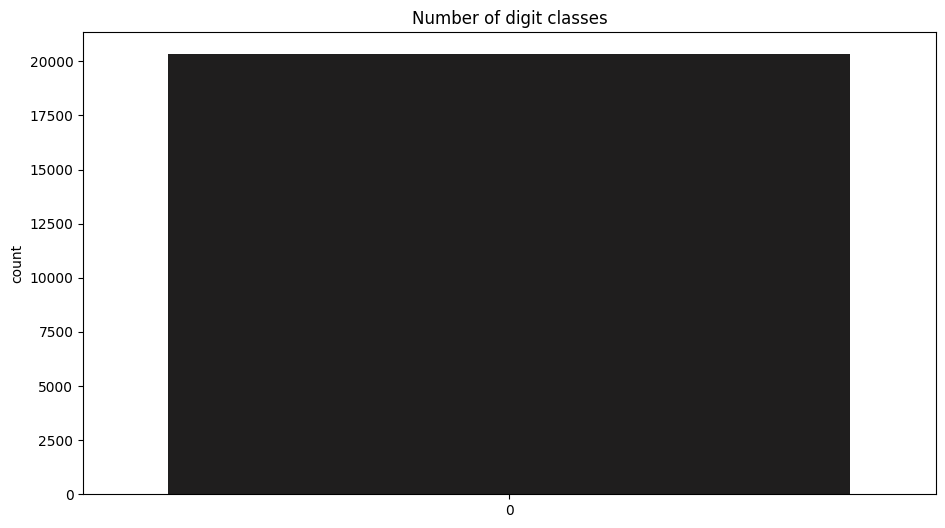

In [5]:
#@title ●  visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset_1['label'].value_counts()

## **4.2.Split Train/Val/Test**

In [7]:
#@title  ● Shuffled dataset
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset_1, random_state=8)

dataset_shuffle

ip_present  at_present  url_length  url_depth  redirection  \
10235           0           0           0          1            0   
10671           0           0           0          1            0   
19168           0           0           1          4            0   
17891           0           0           1          4            0   
11920           0           0           1          3            0   
...           ...         ...         ...        ...          ...   
6995            0           0           0          4            0   
10376           0           0           0          0            0   
2181            0           0           0          3            0   
18417           0           0           0          0            0   
4547            0           0           1          2            0   

       https_domain  short_url  prefix/suffix  dns_record  web_traffic  \
10235             0          0              0           0            1   
10671             0          0              0           0            0   
19168             0          0              0           0            0   
17891             0          0              0           0            1   
11920             0          0              0           0            0   
...             ...        ...            ...         ...          ...   
6995              0          0              0           0            1   
10376             0          0              0           0            1   
2181              0          0              0           0            1   
18417             0          1              0           1            1   
4547              0          1              0           0            1   

       domain_age  domain_end  dot_count  specialchar_count  subdom_count  \
10235           0           1          1                  5             1   
10671           0           1          0                  6             0   
19168           0           0          0                  8             0   
17891           1           0          1                  7             1   
11920           0           0          0                  7             1   
...           ...         ...        ...                ...           ...   
6995            1           1          0                  4             0   
10376           1           1          0                  3             1   
2181            1           1          0                  2             0   
18417           1           1          0                  4             1   
4547            1           1          1                 15             1   

       label  
10235      1  
10671      1  
19168      1  
17891      1  
11920      1  
...      ...  
6995       0  
10376      1  
2181       0  
18417      1  
4547       0  

[20328 rows x 16 columns]

In [8]:
#@title  ●  Separating & assigning features
#and target columns to X & y

y = dataset_1['label']
X = dataset_1.drop('label',axis=1)
X.shape, y.shape

((20328, 15), (20328,))

## **4.3.Split Train/Val/Test**

In [9]:
#@title  ●  Spliting the dataset
#into Training, Validation, and Test Set

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16262, 15), (4066, 15), (16262,), (4066,))

The np.ravel function is used to flatten the arrays y_train, y_test, and y_val from multi-dimensional arrays to one-dimensional arrays. This is typically necessary when using these arrays as targets for a machine learning model.

In [10]:
#@title ●  Converting target variables
#from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_train, y_test

(array([0, 1, 0, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 1, 0]))

In [11]:
#@title ●  Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:

#@title ● Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

#print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 16262 rows and 15 columns

Dimensions of the testing dataset : 4066 rows and 15 columns



## **4.4.Machine Learning Models & Training**

In [13]:
#@title  **4.4.1.Creating holders**
#to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))

### **4.4.2.Decision Tree**
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [14]:
#@title ●  Decision Tree model 
from sklearn.tree import DecisionTreeClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Decision Tree Model training.... \n')

##===================================##




# instantiate the model 
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
# fit the model 
tree.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_test_tree = (accuracy_score(y_test,y_test_tree)*100)

print("Decision Tree: Accuracy on training Data:" ,(acc_train_tree))
print("Decision Tree: Accuracy on test Data: " ,(acc_test_tree))



##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Decision Tree Model Training:  {elapsed}")


print("Runtime: Decision Tree Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Decision Tree Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)



Starting Decision Tree Model training.... 

Decision Tree: Accuracy on training Data: 87.7198376583446
Decision Tree: Accuracy on test Data:  87.70290211510084





Measure Execution Time Of Python Code --- 

Runtime: Decision Tree Model Training:  00:00:00
Runtime: Decision Tree Model Training: 0.01914501190185547 milliseconds
Runtime: Decision Tree Model Training: 19ms





***Completed


### **4.4.3.Random Forest**

In [ ]:
#@title ●  Random Forest model
from sklearn.ensemble import RandomForestClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Random Forest Model training.... \n')

##===================================##

# instantiate the model
forest = RandomForestClassifier(max_depth=4, min_samples_leaf=4)
# fit the model 
forest.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_test_forest = (accuracy_score(y_test,y_test_forest)*100)

print("Random forest: Accuracy on training Data: " ,(acc_train_forest))
print("Random forest: Accuracy on test Data: " ,(acc_test_forest))


##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Random Forest Model Training:  {elapsed}")


print("Runtime: Random Forest Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Random Forest Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)



Starting Random Forest Model training.... 

Random forest: Accuracy on training Data:  89.46009100971591
Random forest: Accuracy on test Data:  89.7688145597639





Measure Execution Time Of Python Code --- 

Runtime: Random Forest Model Training:  00:00:00
Runtime: Random Forest Model Training: 0.4891831874847412 milliseconds
Runtime: Random Forest Model Training: 503ms





***Completed


### **4.4.4.CNN Model**

In [ ]:
#@title ●  importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import time
from datetime import datetime

from keras.callbacks import TensorBoard


In [ ]:
#@title ●  Reshaping data
# Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_test:", X_test_reshape.shape)



3 dim array as expected by cnn model
X_train: (16262, 15, 1)
X_test: (4066, 15, 1)


In [ ]:
#@title  ●  CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
tf.random.set_random_seed(2)


#@title ●  Model configuration
batch_size = 128
no_epochs = 60
optimizer = Adam(learning_rate=0.01)
verbosity = 2
l1 = regularizers.l1(0.001)

input_dim = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(40, 3, activation='relu', input_shape=input_dim , 
                    kernel_regularizer=l1))
proposed.add(BatchNormalization())

#--Convo Layer 1
proposed.add(Conv1D(14, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPool1D(2, name="POOLING_1"))
#--Convo Layer 2
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(26, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(32, 3, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPool1D(2, name="POOLING_2"))
proposed.add(Dropout(0.5, name="DROPOUT_1"))
    
##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))
##--First Fully Connected Layer 5
proposed.add(Dense(64, activation='relu', name='DENSE_1', kernel_regularizer=l1))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])



In [ ]:
#@title  ●  Train the Model

# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting CNN Model training.... \n')

##===================================##


print('Building model... \n')

history = proposed.fit (X_train_reshape, y_train, validation_data=(X_test_reshape, y_test),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test_reshape, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))

##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: CNN Model Training:  {elapsed}")


print("Runtime: CNN Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: CNN Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")




Starting CNN Model training.... 

Building model... 

Train on 16262 samples, validate on 4066 samples
Epoch 1/80
16262/16262 - 1s - loss: 0.5297 - acc: 0.8644 - val_loss: 0.6661 - val_acc: 0.8539 - 1s/epoch - 81us/sample
Epoch 2/80


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


16262/16262 - 1s - loss: 0.3431 - acc: 0.9003 - val_loss: 0.3675 - val_acc: 0.8965 - 1s/epoch - 62us/sample
Epoch 3/80
16262/16262 - 1s - loss: 0.3042 - acc: 0.9028 - val_loss: 0.2701 - val_acc: 0.9100 - 972ms/epoch - 60us/sample
Epoch 4/80
16262/16262 - 1s - loss: 0.2877 - acc: 0.9062 - val_loss: 0.2712 - val_acc: 0.9100 - 998ms/epoch - 61us/sample
Epoch 5/80
16262/16262 - 1s - loss: 0.3066 - acc: 0.9044 - val_loss: 0.2580 - val_acc: 0.9127 - 985ms/epoch - 61us/sample
Epoch 6/80
16262/16262 - 1s - loss: 0.2796 - acc: 0.9113 - val_loss: 0.2854 - val_acc: 0.9063 - 985ms/epoch - 61us/sample
Epoch 7/80
16262/16262 - 1s - loss: 0.2785 - acc: 0.9092 - val_loss: 0.2766 - val_acc: 0.9110 - 999ms/epoch - 61us/sample
Epoch 8/80
16262/16262 - 1s - loss: 0.3256 - acc: 0.8981 - val_loss: 0.2611 - val_acc: 0.9132 - 982ms/epoch - 60us/sample
Epoch 9/80
16262/16262 - 1s - loss: 0.2845 - acc: 0.9084 - val_loss: 0.2673 - val_acc: 0.9149 - 967ms/epoch - 59us/sample
Epoch 10/80
16262/16262 - 1s - loss: 0

Epoch 70/80
16262/16262 - 1s - loss: 0.2430 - acc: 0.9184 - val_loss: 0.2262 - val_acc: 0.9289 - 983ms/epoch - 60us/sample
Epoch 71/80
16262/16262 - 1s - loss: 0.2239 - acc: 0.9228 - val_loss: 0.2037 - val_acc: 0.9279 - 969ms/epoch - 60us/sample
Epoch 72/80
16262/16262 - 1s - loss: 0.2211 - acc: 0.9211 - val_loss: 0.2144 - val_acc: 0.9223 - 980ms/epoch - 60us/sample
Epoch 73/80
16262/16262 - 1s - loss: 0.2659 - acc: 0.9063 - val_loss: 0.2193 - val_acc: 0.9240 - 985ms/epoch - 61us/sample
Epoch 74/80
16262/16262 - 1s - loss: 0.2266 - acc: 0.9185 - val_loss: 0.2251 - val_acc: 0.9198 - 983ms/epoch - 60us/sample
Epoch 75/80
16262/16262 - 1s - loss: 0.2272 - acc: 0.9239 - val_loss: 0.2155 - val_acc: 0.9179 - 982ms/epoch - 60us/sample
Epoch 76/80
16262/16262 - 1s - loss: 0.2194 - acc: 0.9261 - val_loss: 0.2262 - val_acc: 0.9235 - 984ms/epoch - 61us/sample
Epoch 77/80
16262/16262 - 1s - loss: 0.2398 - acc: 0.9194 - val_loss: 0.2404 - val_acc: 0.9085 - 968ms/epoch - 60us/sample
Epoch 78/80
1626

In [ ]:
proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 40)            160       
                                                                 
 batch_normalization (BatchN  (None, 13, 40)           160       
 ormalization)                                                   
                                                                 
 CONV_1 (Conv1D)             (None, 13, 14)            1694      
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 6, 14)             0         
                                                                 
 CONV_2 (Conv1D)             (None, 6, 20)             860       
                                                                 
 CONV_3 (Conv1D)             (None, 6, 26)             1586      
                                                    

In [ ]:

#@title  ● Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_reshape, y_test)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 93.17%
CNN: Accuracy on TEST Data: 92.94%


In [ ]:
#@title ●  storing the results.
#The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

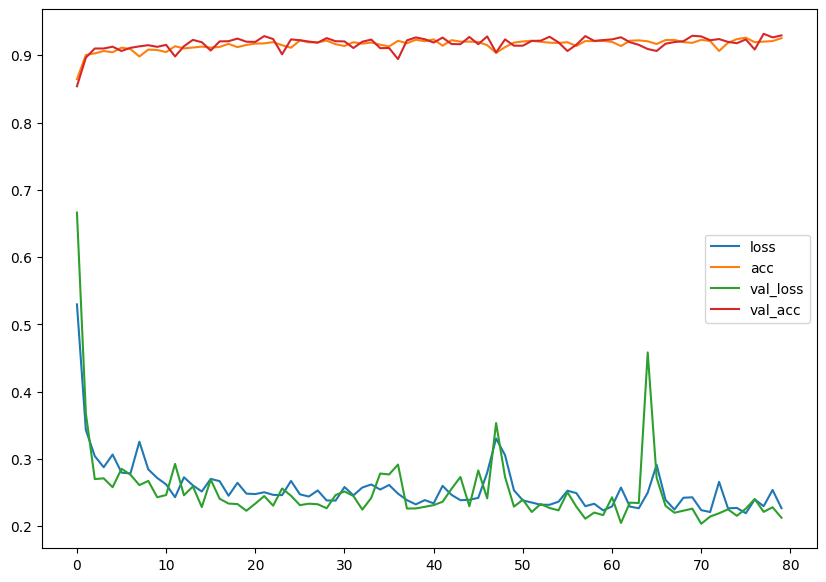

In [ ]:
#@title ●  plotting Model
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

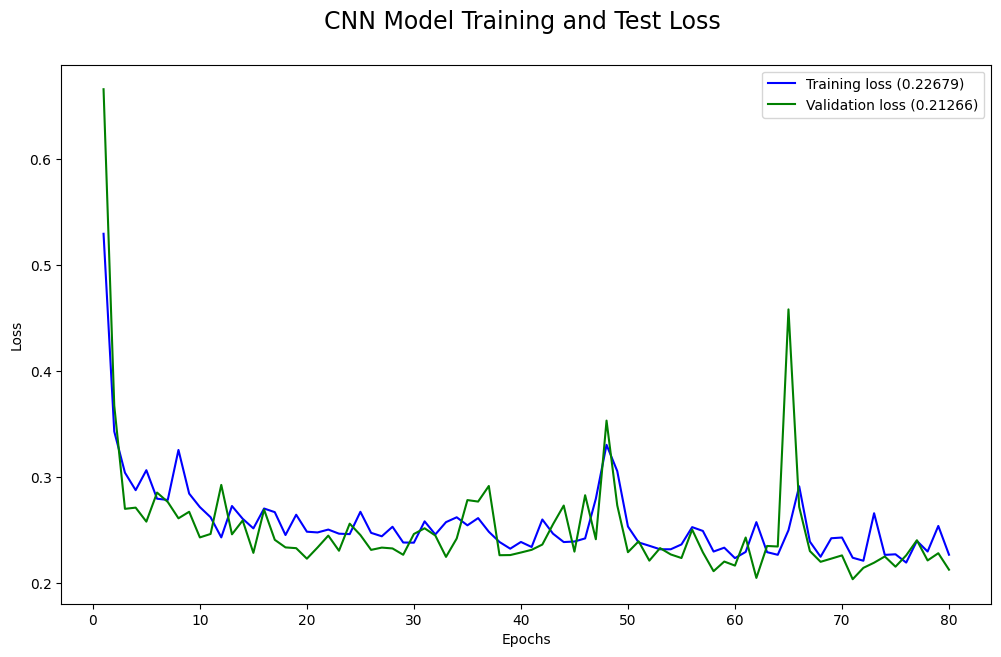

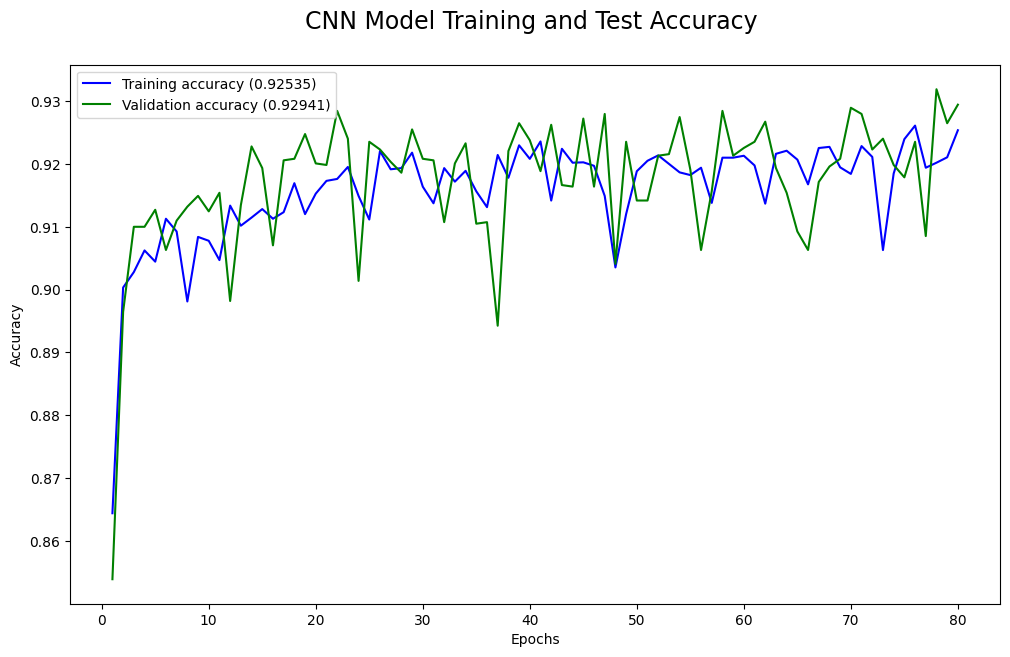

In [ ]:
#@title ●  Plot model accuracy/loss.

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Test Loss \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-loss-DOCU.png')

    
    print('\n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

## **4.5.Comparison of Models**

In [ ]:
#@title  ●  create DataFrame table.
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results - 50:50 dataset")
align_df

Dataset 3 Results - 50:50 dataset


In [ ]:
#@title  ● Sorting the dataframe based on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model Train Accuracy Test Accuracy
3            CNN         93.17%        92.94%
2  Random Forest         89.46%        89.77%
1  Decision Tree         87.72%        87.70%

## **4.6.CNN Prediction**

In [ ]:
#@title ●  Evaluating The Test Set
##To get predictions from the model for the test set, we call model.predict().


X_test = np.array(X_test_reshape)

predictions = proposed.predict(X_test_reshape, batch_size=10, verbose=0)  

# Predicting results for test dataset
pred_cnn = proposed.predict(X_test_reshape)

# Predicting results for tain dataset
train_cnn = proposed.predict(X_train_reshape)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row
predictions

c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[4.4765534e-07, 9.9999952e-01],
       [1.1919310e-02, 9.8808062e-01],
       [3.4472200e-01, 6.5527797e-01],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [4.3148220e-01, 5.6851780e-01],
       [1.0000000e+00, 1.8445817e-35]], dtype=float32)

In [ ]:
#@title ●  find the maximum prediction output
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

Transforming the input arrays into arrays of indices, where the index corresponds to the class label with the highest predicted probability value.

In [ ]:
#@title ●  Transforming
train_cnn = np.argmax(np.round(train_cnn),axis=1)

pred_cnn = np.argmax(np.round(pred_cnn),axis=1)


print((pred_cnn, train_cnn))

print('shapes:','\n',pred_cnn.shape, train_cnn.shape)

(array([1, 1, 1, ..., 0, 1, 0], dtype=int64), array([0, 1, 0, ..., 0, 0, 1], dtype=int64))
shapes: 
 (4066,) (16262,)


In [ ]:
#@title ●  summarize the first 5 cases

for i in range(5):
    print('%s => %d (expected %d)' % (X_test_reshape[i].tolist(), predictions[i], y_test[i]))

[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [-1.608315401170647], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [-0.8487051512302393]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [-0.33251281926837817], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.2968784062110249], [1.1782655007459908]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [1.1738113206656695], [-0.26682709203356153], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [1.1782655007459908]] => 1 (expected 1)
[[0.

In [ ]:
#@title ●   y_pred and y_test compare

print('Predictions: ', predictions[:10])

print( 'Actual:      ', y_test[:10])

Predictions:  [1 1 1 0 1 0 1 0 0 0]
Actual:       [1 1 1 1 1 0 1 0 0 0]


## **4.7.CNN Visualization**

In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ●  Performance Evaluation of CNN on Test Data
print('')

print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)


CNN: Accuracy on TEST Data: 92.94%

CNN Confusion Matrix:
[[1926  125]
 [ 162 1853]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2051
           1       0.94      0.92      0.93      2015

    accuracy                           0.93      4066
   macro avg       0.93      0.93      0.93      4066
weighted avg       0.93      0.93      0.93      4066


Score Results: Loss, Accuracy [0.21266307871270168, 0.92941463]


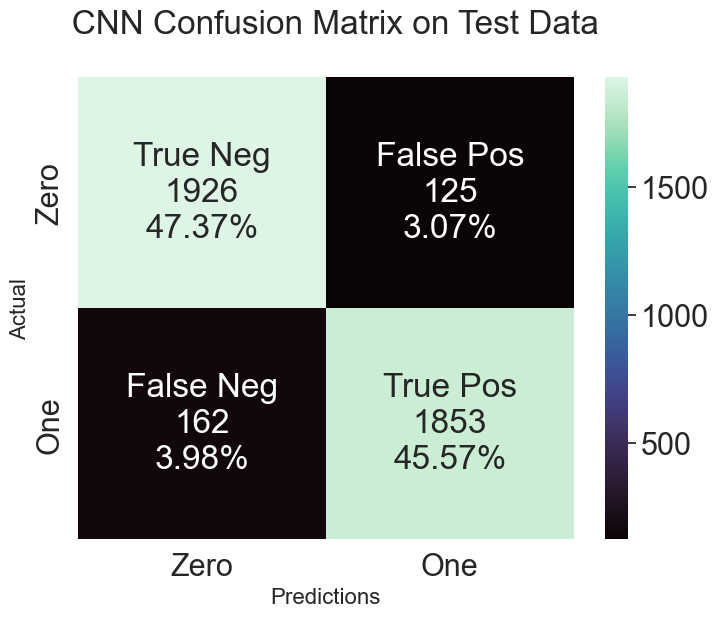

In [ ]:
## For Documentation

#@title ●  Visualizing CNN /Test data(mako map).
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako', figsize=(8,6))

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-test-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
#@title ●  Predict the values from the Training set

print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, train_cnn, verbose=1)
print('Score Results: Loss, Accuracy',score)



CNN: Accuracy on Training Data: 93.17%

CNN Confusion Matrix:
[[7623  490]
 [ 620 7529]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8113
           1       0.94      0.92      0.93      8149

    accuracy                           0.93     16262
   macro avg       0.93      0.93      0.93     16262
weighted avg       0.93      0.93      0.93     16262


Score Results: Loss, Accuracy [0.17043054203180175, 1.0]


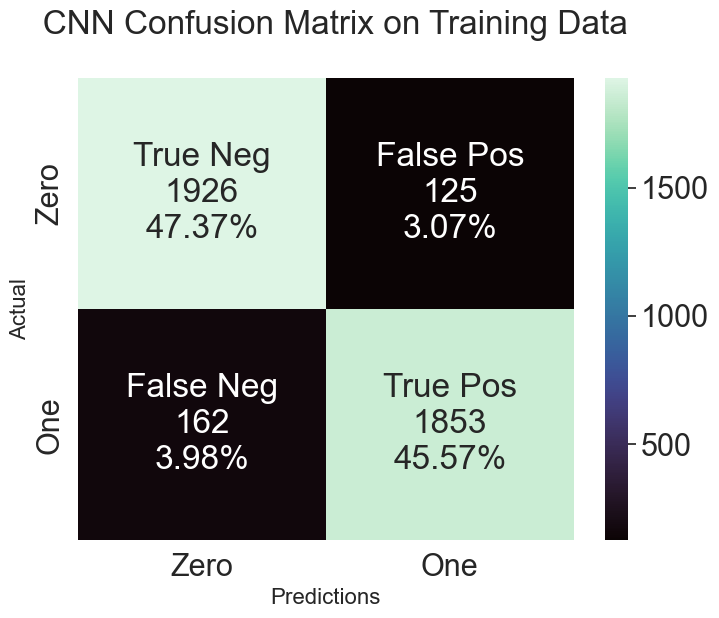

In [ ]:
## For Documentation
#@title ●   Visualizing CNN/Training Data (mako map).
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-train-DOCU.png", bbox_inches='tight', pad_inches=0)


## **4.8.CNN Predictions**

In [ ]:
#@title ●  Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

In [ ]:
#@title ●  Results
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


# <font color='blue'> **5.Dataset3-Model-Revision2**</font>

### 1st revision on model parameters

### 50:50 dataset

In [ ]:
#@title ● importing packages
# Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()
print(tf.__version__)

import time
from datetime import datetime


2.10.0


## **5.1.Importing the dataset**

In [ ]:
#@title ●   Reading & Exploring Data
dataset = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset2/FINAL-traindata.csv")
dataset

domain  ip_present  at_present  \
0                                              NaN           0           0   
1                                              NaN           0           0   
2                                              NaN           0           0   
3                                              NaN           0           0   
4                                              NaN           0           0   
...                                            ...         ...         ...   
20323                                  gkjx168.com           0           0   
20324             habbocreditosparati.blogspot.com           0           0   
20325  creditiperhabbogratissicuro100.blogspot.com           0           0   
20326               mundovirtualhabbo.blogspot.com           0           0   
20327                           aijcs.blogspot.com           0           0   

       url_length  url_depth  redirection  https_domain  short_url  \
0               1          3            0             0          0   
1               1          4            0             0          0   
2               0          2            0             0          0   
3               1          4            0             0          0   
4               0          2            0             0          0   
...           ...        ...          ...           ...        ...   
20323           0          1            0             0          0   
20324           0          0            0             0          1   
20325           1          3            0             0          1   
20326           1          1            0             0          1   
20327           1          3            0             0          1   

       prefix/suffix  dns_record  web_traffic  domain_age  domain_end  \
0                  0           0            0           1           1   
1                  0           0            0           1           1   
2                  0           0            1           1           1   
3                  0           0            1           1           1   
4                  0           0            1           1           1   
...              ...         ...          ...         ...         ...   
20323              0           0            1           0           1   
20324              0           1            1           1           1   
20325              0           1            1           1           1   
20326              0           1            1           1           1   
20327              0           1            1           1           1   

       dot_count  specialchar_count  subdom_count  label  
0              0                  2             0      0  
1              0                  4             0      0  
2              0                  7             0      0  
3              0                  3             0      0  
4              0                  3             0      0  
...          ...                ...           ...    ...  
20323          0                  4             0      1  
20324          1                  4             1      1  
20325          1                  6             1      1  
20326          1                  7             1      1  
20327          1                  6             1      1  

[20328 rows x 17 columns]

In [ ]:
#@title  ●  dropping domain column
dataset_1 = dataset.drop('domain', axis = 1)
dataset_1

ip_present  at_present  url_length  url_depth  redirection  \
0               0           0           1          3            0   
1               0           0           1          4            0   
2               0           0           0          2            0   
3               0           0           1          4            0   
4               0           0           0          2            0   
...           ...         ...         ...        ...          ...   
20323           0           0           0          1            0   
20324           0           0           0          0            0   
20325           0           0           1          3            0   
20326           0           0           1          1            0   
20327           0           0           1          3            0   

       https_domain  short_url  prefix/suffix  dns_record  web_traffic  \
0                 0          0              0           0            0   
1                 0          0              0           0            0   
2                 0          0              0           0            1   
3                 0          0              0           0            1   
4                 0          0              0           0            1   
...             ...        ...            ...         ...          ...   
20323             0          0              0           0            1   
20324             0          1              0           1            1   
20325             0          1              0           1            1   
20326             0          1              0           1            1   
20327             0          1              0           1            1   

       domain_age  domain_end  dot_count  specialchar_count  subdom_count  \
0               1           1          0                  2             0   
1               1           1          0                  4             0   
2               1           1          0                  7             0   
3               1           1          0                  3             0   
4               1           1          0                  3             0   
...           ...         ...        ...                ...           ...   
20323           0           1          0                  4             0   
20324           1           1          1                  4             1   
20325           1           1          1                  6             1   
20326           1           1          1                  7             1   
20327           1           1          1                  6             1   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
20323      1  
20324      1  
20325      1  
20326      1  
20327      1  

[20328 rows x 16 columns]

0    10164
1    10164
Name: label, dtype: int64

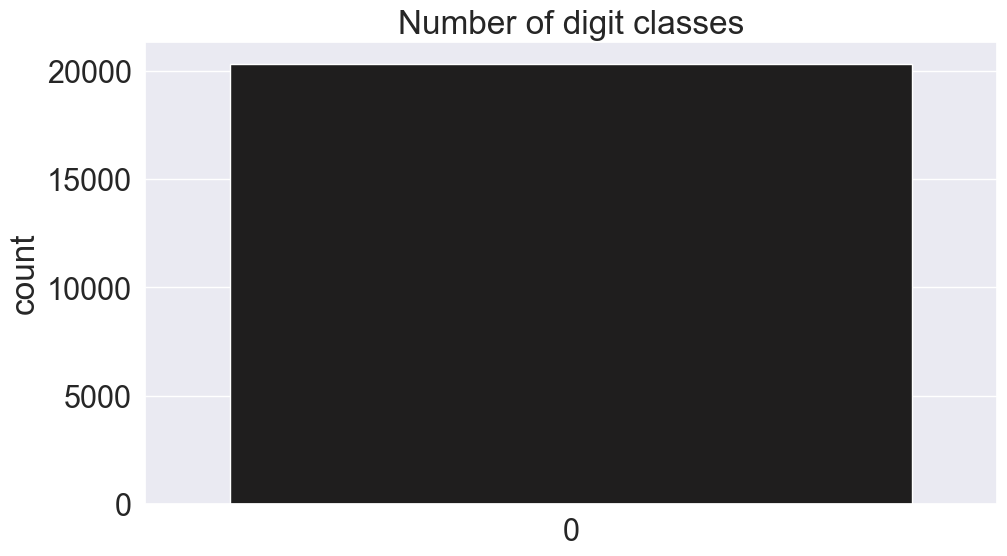

In [ ]:
#@title ●  visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset_1['label'].value_counts()

## **5.2.Split Train/Val/Test**

In [ ]:
#@title ●  Shuffle dataset
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset_1, random_state=8)

dataset_shuffle

ip_present  at_present  url_length  url_depth  redirection  \
10235           0           0           0          1            0   
10671           0           0           0          1            0   
19168           0           0           1          4            0   
17891           0           0           1          4            0   
11920           0           0           1          3            0   
...           ...         ...         ...        ...          ...   
6995            0           0           0          4            0   
10376           0           0           0          0            0   
2181            0           0           0          3            0   
18417           0           0           0          0            0   
4547            0           0           1          2            0   

       https_domain  short_url  prefix/suffix  dns_record  web_traffic  \
10235             0          0              0           0            1   
10671             0          0              0           0            0   
19168             0          0              0           0            0   
17891             0          0              0           0            1   
11920             0          0              0           0            0   
...             ...        ...            ...         ...          ...   
6995              0          0              0           0            1   
10376             0          0              0           0            1   
2181              0          0              0           0            1   
18417             0          1              0           1            1   
4547              0          1              0           0            1   

       domain_age  domain_end  dot_count  specialchar_count  subdom_count  \
10235           0           1          1                  5             1   
10671           0           1          0                  6             0   
19168           0           0          0                  8             0   
17891           1           0          1                  7             1   
11920           0           0          0                  7             1   
...           ...         ...        ...                ...           ...   
6995            1           1          0                  4             0   
10376           1           1          0                  3             1   
2181            1           1          0                  2             0   
18417           1           1          0                  4             1   
4547            1           1          1                 15             1   

       label  
10235      1  
10671      1  
19168      1  
17891      1  
11920      1  
...      ...  
6995       0  
10376      1  
2181       0  
18417      1  
4547       0  

[20328 rows x 16 columns]

In [ ]:
#@title ● Separating & assigning features
#and target columns to X & y

y = dataset_1['label']
X = dataset_1.drop('label',axis=1)
X.shape, y.shape

((20328, 15), (20328,))

In [ ]:

#@title ●  Spliting the dataset into Training, Validation, and Test Set

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16262, 15), (4066, 15), (16262,), (4066,))

In [ ]:
#@title ●  Converting target variables

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_train, y_test

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 0, 1, 0], dtype=int64))

In [ ]:
#@title ●  Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

#@title ●  Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

#print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 16262 rows and 15 columns

Dimensions of the testing dataset : 4066 rows and 15 columns



## **5.3.Machine Learning Models & Training**

In [ ]:
#@title ●  Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))

### **5.3.1.Decision Tree**



Starting Decision Tree Model training.... 

Decision Tree: Accuracy on training Data: 90.30869511745173
Decision Tree: Accuracy on test Data:  90.53123462862764





Measure Execution Time Of Python Code --- 

Runtime: Decision Tree Model Training:  00:00:00
Runtime: Decision Tree Model Training: 0.03562045097351074 milliseconds
Runtime: Decision Tree Model Training: 36ms





***Completed
Performance Evaluation of Decision Tree on Test Data

Decision Tree: Accuracy on TEST Data: 90.53%

Decision Tree Confusion Matrix:
[[1834  217]
 [ 168 1847]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2051
           1       0.89      0.92      0.91      2015

    accuracy                           0.91      4066
   macro avg       0.91      0.91      0.91      4066
weighted avg       0.91      0.91      0.91      4066

Decision Tree Test Data
Accuracy: 0.91%
Precision: 0.89%
Recall: 0.92%
F1 score

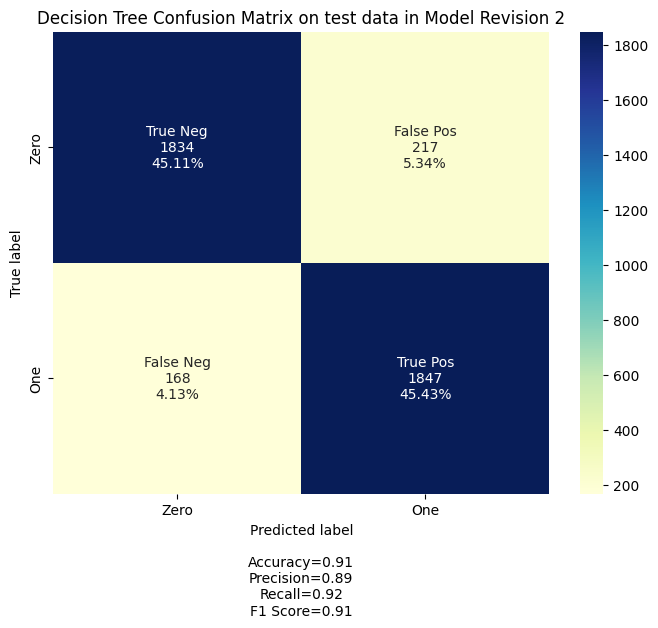

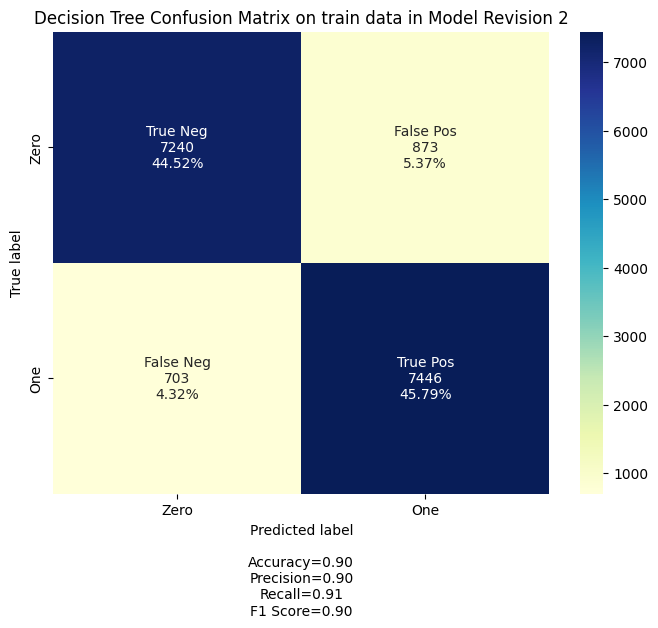

In [27]:
#@title ●  Decision Tree model 
from sklearn.tree import DecisionTreeClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Decision Tree Model training.... \n')

##===================================##




# instantiate the model 
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=9)
# fit the model 
tree.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_test_tree = (accuracy_score(y_test,y_test_tree)*100)

print("Decision Tree: Accuracy on training Data:" ,(acc_train_tree))
print("Decision Tree: Accuracy on test Data: " ,(acc_test_tree))



##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Decision Tree Model Training:  {elapsed}")


print("Runtime: Decision Tree Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Decision Tree Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)


## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Decision Tree on Test Data')
print('')

print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_test_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_test_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_test, y_test_tree))

print('Decision Tree Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_tree)
print('Accuracy: %.2f%%' % accuracy)

# accuracy: (tp + tn) / (p + n)
#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_tree)
print('F1 score: %.2f%%' % f1)



tree_matrix_test = confusion_matrix(y_test, y_test_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on test data in Model Revision 2'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


## Classification Report - complete
## Predict the values from the train set

print('Performance Evaluation of Decision Tree on train Data')
print('')

print("Decision Tree: Accuracy on train Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))

print('Decision Tree train Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_tree)
print('Accuracy: %.2f%%' % accuracy)

# accuracy: (tp + tn) / (p + n)
#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_tree)
print('F1 score: %.2f%%' % f1)



tree_matrix_test = confusion_matrix(y_train, y_train_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on train data in Model Revision 2'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


### **5.3.2.Random Forest**



Starting Random Forest Model training.... 

Random forest: Accuracy on training Data:  90.54851801746403
Random forest: Accuracy on test Data:  90.70339399901624





Measure Execution Time Of Python Code --- 

Runtime: Random Forest Model Training:  00:00:00
Runtime: Random Forest Model Training: 0.9454684257507324 milliseconds
Runtime: Random Forest Model Training: 945ms





***Completed
Performance Evaluation of Random Forest on Test Data

Random Forest: Accuracy on TEST Data: 90.70%

Random Forest Confusion Matrix:
[[1942  109]
 [ 269 1746]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2051
           1       0.94      0.87      0.90      2015

    accuracy                           0.91      4066
   macro avg       0.91      0.91      0.91      4066
weighted avg       0.91      0.91      0.91      4066

Random Forest Test Data
Accuracy: 0.91%
Precision: 0.94%
Recall: 0.87%
F1 scor

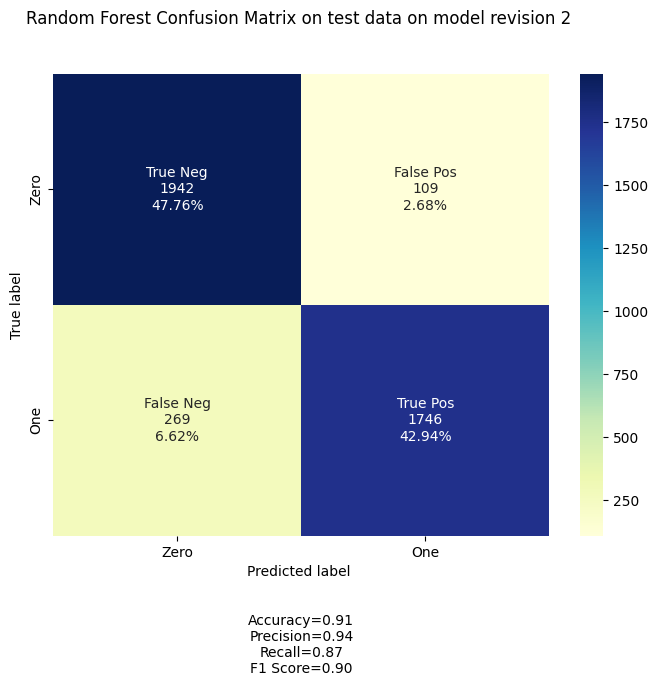

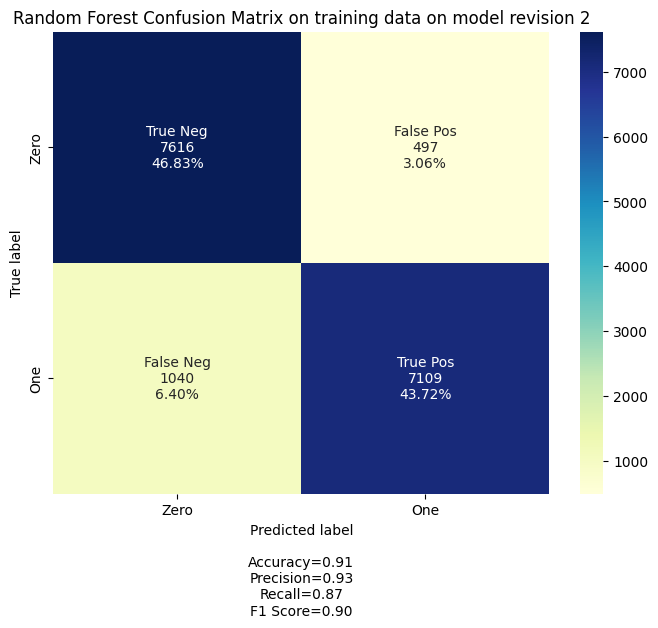

In [31]:
#@title ● Random Forest model
from sklearn.ensemble import RandomForestClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Random Forest Model training.... \n')

##===================================##

# instantiate the model
forest = RandomForestClassifier(max_depth=6, min_samples_leaf=4, random_state=11)
# fit the model 
forest.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_test_forest = (accuracy_score(y_test,y_test_forest)*100)

print("Random forest: Accuracy on training Data: " ,(acc_train_forest))
print("Random forest: Accuracy on test Data: " ,(acc_test_forest))


##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Random Forest Model Training:  {elapsed}")


print("Runtime: Random Forest Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Random Forest Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)


## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Test Data')
print('')

print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_test_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_test, y_test_forest))

print('Random Forest Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_forest)
print('F1 score: %.2f%%' % f1)
##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_test_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on test data on model revision 2 \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label \n' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


#########################################
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Training Data')
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))


print('Random Forest Training Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_forest)
print('F1 score: %.2f%%' % f1)

##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on training data on model revision 2'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))



### **5.3.3.CNN Model**

In [ ]:
#@title ●  importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import time
from datetime import datetime

from keras.callbacks import TensorBoard


In [ ]:
#@title ●  Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_test:", X_test_reshape.shape)



3 dim array as expected by cnn model
X_train: (16262, 15, 1)
X_test: (4066, 15, 1)


In [ ]:
#@title ●  CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
tf.random.set_random_seed(2)


#@title ●  Model configuration
optimizer = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

input_dim = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(40, 3, activation='relu', input_shape=input_dim , 
                    kernel_regularizer=l1))
proposed.add(BatchNormalization())

#--Convo Layer 1
proposed.add(Conv1D(14, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPool1D(2, name="POOLING_1"))
#--Convo Layer 2
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(26, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(32, 3, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPool1D(2, name="POOLING_2"))
proposed.add(Dropout(0.4, name="DROPOUT_1"))
    
##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))
##--First Fully Connected Layer 5
proposed.add(Dense(64, activation='relu', name='DENSE_1', kernel_regularizer=l1))
proposed.add(Dropout(0.4, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])



In [ ]:
#@title ●  Train the Model

# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting CNN Model training.... \n')

##===================================##


print('Building model... \n')

history = proposed.fit (X_train_reshape, y_train, validation_data=(X_test_reshape, y_test),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test_reshape, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))

##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: CNN Model Training:  {elapsed}")


print("Runtime: CNN Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: CNN Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")
proposed.summary()



Starting CNN Model training.... 

Building model... 

Train on 16262 samples, validate on 4066 samples
Epoch 1/80


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


16262/16262 - 1s - loss: 0.7291 - acc: 0.6014 - val_loss: 0.7190 - val_acc: 0.8094 - 1s/epoch - 84us/sample
Epoch 2/80
16262/16262 - 1s - loss: 0.5647 - acc: 0.7714 - val_loss: 0.5865 - val_acc: 0.8273 - 1s/epoch - 63us/sample
Epoch 3/80
16262/16262 - 1s - loss: 0.4627 - acc: 0.8313 - val_loss: 0.4384 - val_acc: 0.8701 - 1s/epoch - 62us/sample
Epoch 4/80
16262/16262 - 1s - loss: 0.4009 - acc: 0.8585 - val_loss: 0.3397 - val_acc: 0.8871 - 1000ms/epoch - 61us/sample
Epoch 5/80
16262/16262 - 1s - loss: 0.3508 - acc: 0.8794 - val_loss: 0.2861 - val_acc: 0.8898 - 1s/epoch - 62us/sample
Epoch 6/80
16262/16262 - 1s - loss: 0.3165 - acc: 0.8916 - val_loss: 0.2597 - val_acc: 0.9201 - 1s/epoch - 63us/sample
Epoch 7/80
16262/16262 - 1s - loss: 0.2907 - acc: 0.8988 - val_loss: 0.2478 - val_acc: 0.9198 - 1s/epoch - 63us/sample
Epoch 8/80
16262/16262 - 1s - loss: 0.2776 - acc: 0.9045 - val_loss: 0.2426 - val_acc: 0.9191 - 1s/epoch - 62us/sample
Epoch 9/80
16262/16262 - 1s - loss: 0.2721 - acc: 0.906

Epoch 69/80
16262/16262 - 1s - loss: 0.1702 - acc: 0.9386 - val_loss: 0.1697 - val_acc: 0.9351 - 1s/epoch - 63us/sample
Epoch 70/80
16262/16262 - 1s - loss: 0.1702 - acc: 0.9384 - val_loss: 0.1702 - val_acc: 0.9353 - 1s/epoch - 62us/sample
Epoch 71/80
16262/16262 - 1s - loss: 0.1695 - acc: 0.9388 - val_loss: 0.1700 - val_acc: 0.9368 - 1s/epoch - 65us/sample
Epoch 72/80
16262/16262 - 1s - loss: 0.1702 - acc: 0.9381 - val_loss: 0.1701 - val_acc: 0.9370 - 996ms/epoch - 61us/sample
Epoch 73/80
16262/16262 - 1s - loss: 0.1661 - acc: 0.9399 - val_loss: 0.1685 - val_acc: 0.9373 - 1s/epoch - 62us/sample
Epoch 74/80
16262/16262 - 1s - loss: 0.1681 - acc: 0.9386 - val_loss: 0.1690 - val_acc: 0.9378 - 1s/epoch - 62us/sample
Epoch 75/80
16262/16262 - 1s - loss: 0.1669 - acc: 0.9399 - val_loss: 0.1686 - val_acc: 0.9380 - 984ms/epoch - 61us/sample
Epoch 76/80
16262/16262 - 1s - loss: 0.1646 - acc: 0.9401 - val_loss: 0.1684 - val_acc: 0.9380 - 999ms/epoch - 61us/sample
Epoch 77/80
16262/16262 - 1s - 

In [ ]:
#@title ●  Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_reshape, y_test)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 94.51%
CNN: Accuracy on TEST Data: 93.80%


In [ ]:
#@title ●  storing the results.
#The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

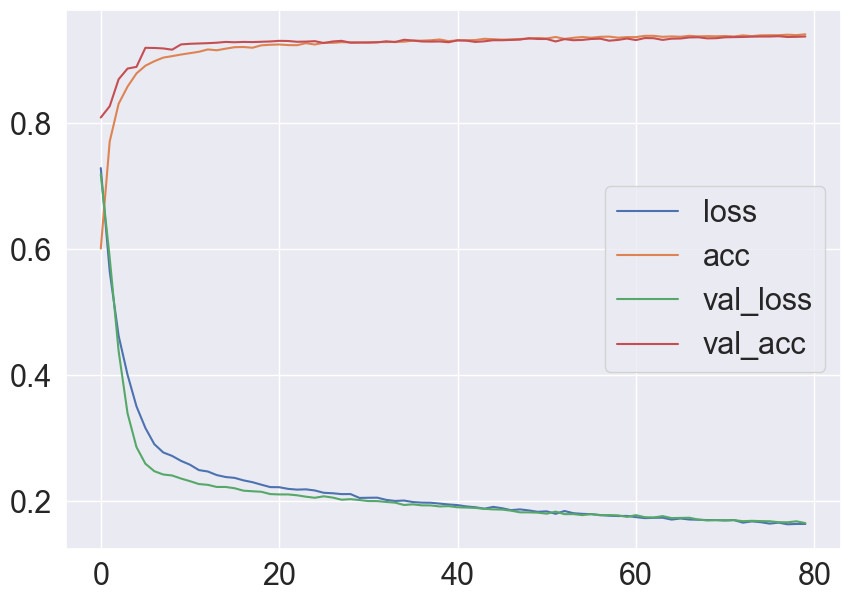

In [ ]:
#@title ● plot acc_train_cnn ,acc_test_cnn
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

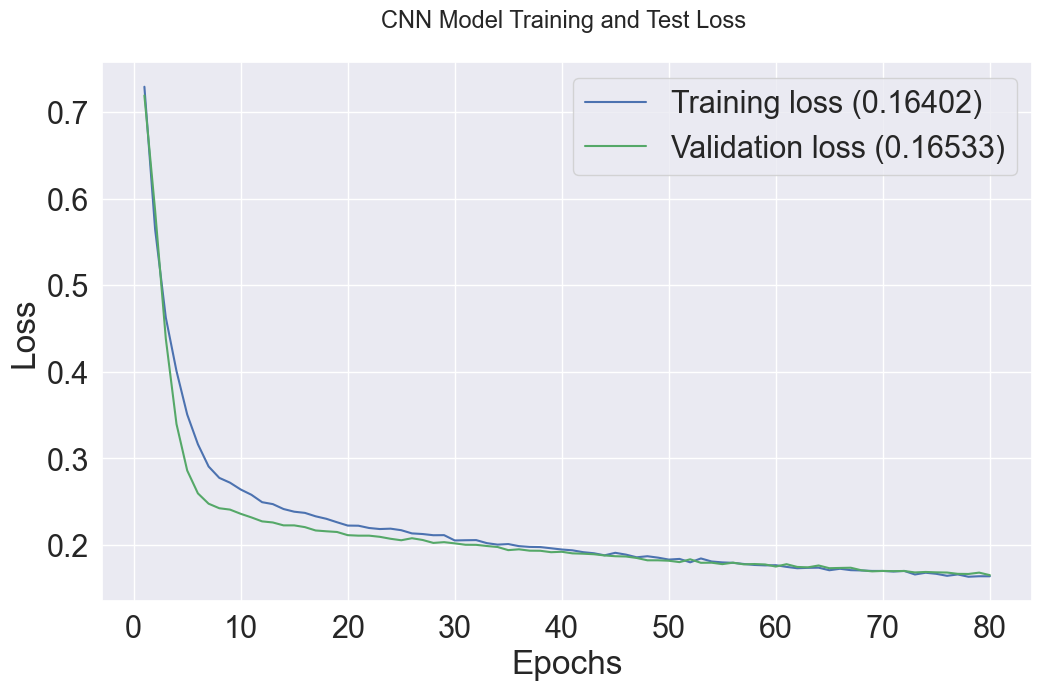

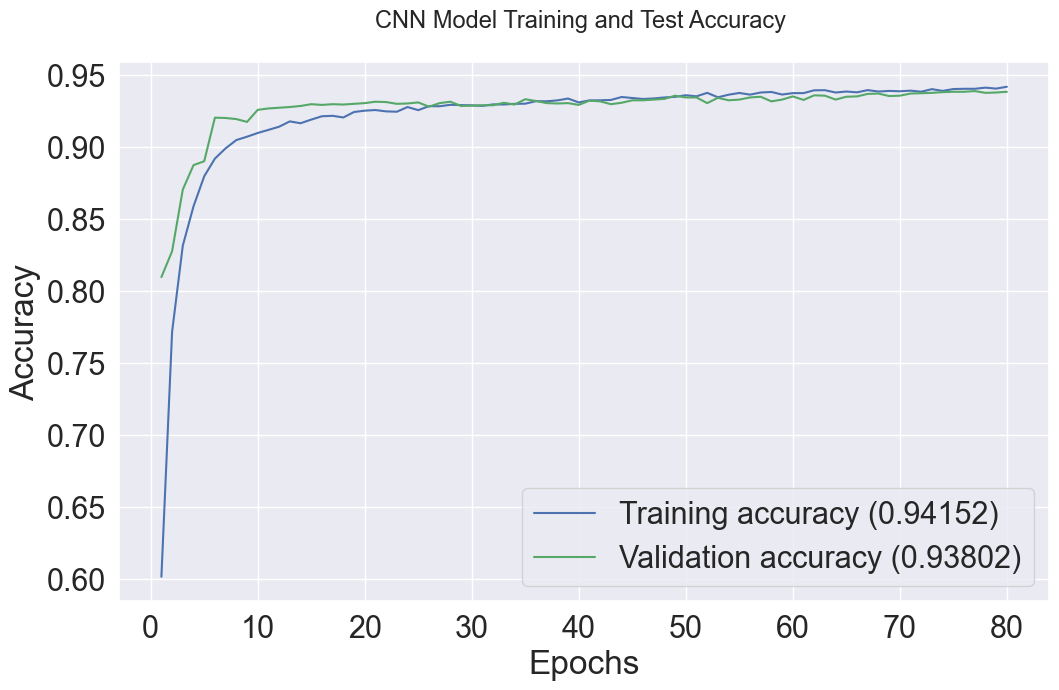

In [ ]:
## For Documentation
#@title ●  Plot loss and accuracy.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Test Loss \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-loss-DOCU.png')

    
    print('\n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

## ***5.4.Comparison of Models***

In [ ]:
#@title ●  Results
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results - 50:50 dataset")
align_df

Dataset 3 Results - 50:50 dataset


In [ ]:
#@title  ● Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model Train Accuracy Test Accuracy
3            CNN         94.51%        93.80%
2  Random Forest         90.55%        90.70%
1  Decision Tree         90.31%        90.53%

## **5.5.CNN Prediction**

In [ ]:
#@title ●  Evaluating The Test Set
##To get predictions from the model for the test set, we call model.predict().


X_test = np.array(X_test_reshape)

predictions = proposed.predict(X_test_reshape, batch_size=10, verbose=0)  

# Predicting results for test dataset
pred_cnn = proposed.predict(X_test_reshape)

# Predicting results for tain dataset
train_cnn = proposed.predict(X_train_reshape)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row
predictions

c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[3.2206535e-04, 9.9967790e-01],
       [2.6062537e-02, 9.7393745e-01],
       [4.0133750e-01, 5.9866244e-01],
       ...,
       [1.0000000e+00, 4.9349577e-11],
       [5.2240372e-01, 4.7759634e-01],
       [1.0000000e+00, 4.8279734e-11]], dtype=float32)

In [ ]:
#@title ●  find the maximum prediction output
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Transforming the input arrays into arrays of indices, where the index corresponds to the class label with the highest predicted probability value.

In [ ]:
#@title ●  Transforming

train_cnn = np.argmax(np.round(train_cnn),axis=1)

pred_cnn = np.argmax(np.round(pred_cnn),axis=1)


print((pred_cnn, train_cnn))

print('shapes:','\n',pred_cnn.shape, train_cnn.shape)

(array([1, 1, 1, ..., 0, 0, 0], dtype=int64), array([0, 1, 0, ..., 0, 0, 1], dtype=int64))
shapes: 
 (4066,) (16262,)


In [ ]:
#@title ●  summarize the first 5 cases

for i in range(5):
    print('%s => %d (expected %d)' % (X_test_reshape[i].tolist(), predictions[i], y_test[i]))

[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [-1.608315401170647], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [-0.8487051512302393]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [-0.33251281926837817], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.2968784062110249], [1.1782655007459908]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [1.1738113206656695], [-0.26682709203356153], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [1.1782655007459908]] => 1 (expected 1)
[[0.

In [ ]:
#@title ●   y_pred and y_test compare

print('Predictions: ', predictions[:10])

print( 'Actual:      ', y_test[:10])

Predictions:  [1 1 1 0 1 0 1 0 0 0]
Actual:       [1 1 1 1 1 0 1 0 0 0]


## **5.6.CNN Visualization**

In [ ]:
## Classification Report - complete
## Predict the values from the test set
#@title ●  Performance Evaluation of CNN on Test Data

print('')

print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)


CNN: Accuracy on TEST Data: 93.80%

CNN Confusion Matrix:
[[1938  113]
 [ 139 1876]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2051
           1       0.94      0.93      0.94      2015

    accuracy                           0.94      4066
   macro avg       0.94      0.94      0.94      4066
weighted avg       0.94      0.94      0.94      4066


Score Results: Loss, Accuracy [0.16533205750184404, 0.9380226]


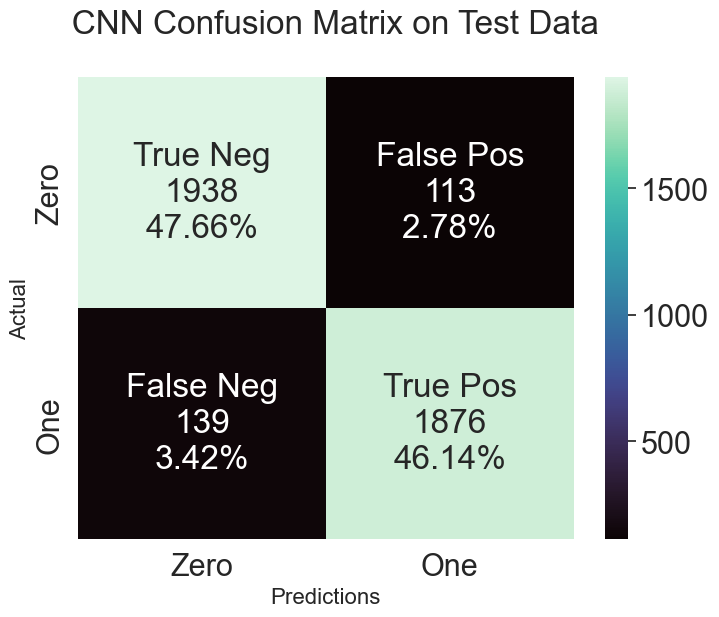

In [ ]:
## For Documentation
#@title ● Visualizing CNN/Test data(mako map).

##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako', figsize=(8,6))

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-test-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
#@title ●  Predict the values from the Training set

print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, train_cnn, verbose=1)
print('Score Results: Loss, Accuracy',score)


Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 94.51%

CNN Confusion Matrix:
[[7709  404]
 [ 488 7661]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8113
           1       0.95      0.94      0.94      8149

    accuracy                           0.95     16262
   macro avg       0.95      0.95      0.95     16262
weighted avg       0.95      0.95      0.95     16262


Score Results: Loss, Accuracy [0.10306418409781576, 1.0]


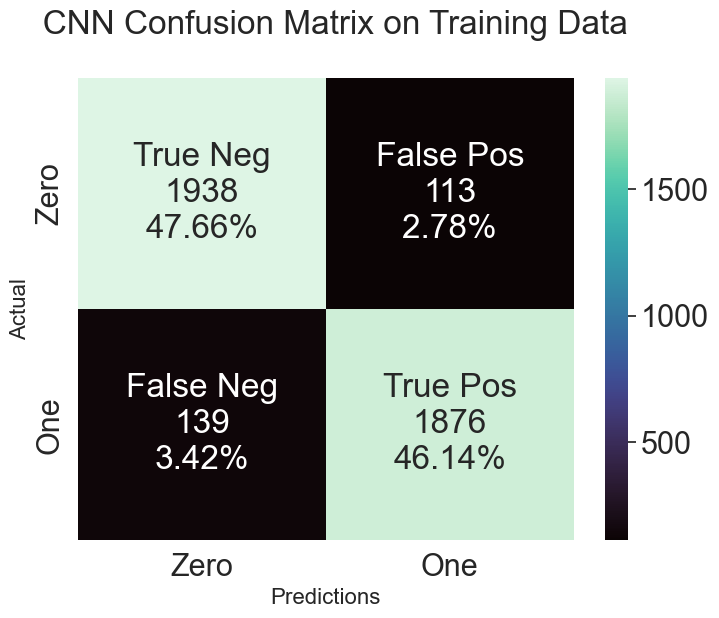

In [ ]:
## For Documentation
#@title ●  Visualizing CNN / Training Data (mako map).

##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-train-DOCU.png", bbox_inches='tight', pad_inches=0)


## **5.7.CNN Predictions**

In [ ]:
#@title ●  Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

In [ ]:
#@title ●  Results

results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


# <font color=blue>**6.Dataset3-Model-CV** </font>

### 50% phishing - 6,000 URLs | 50% benign - 6,000 URLs

### Chosen Dataset


## **6.1.Imporing packages & Exploring Data**

In [ ]:
#@title ●  reading&displaying dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Creating-data/finaldata_updated.csv")
dataset

domain  ip_present  at_present  \
0                                   graphicriver.net           0           0   
1                                          ecnavi.jp           0           0   
2                                       hubpages.com           0           0   
3                                    extratorrent.cc           0           0   
4                                      icicibank.com           0           0   
...                                              ...         ...         ...   
11995                                  polska-olx.pl           0           0   
11996  fb-updates-1000151020200412545154000588-mc.tk           0           0   
11997                        whattsapps.misecure.com           0           0   
11998                                     nfta.co.za           0           0   
11999                      site9423773.92.webydo.com           0           0   

       url_length  url_depth  redirection  https_domain  short_url  \
0               1          1            0             0          0   
1               1          1            1             0          0   
2               1          1            0             0          0   
3               1          3            0             0          0   
4               1          3            0             0          0   
...           ...        ...          ...           ...        ...   
11995           0          2            0             0          0   
11996           1          1            0             0          0   
11997           0          0            0             0          0   
11998           1          2            0             0          0   
11999           0          0            0             0          0   

       prefix/suffix  dns_record  web_traffic  domain_age  domain_end  \
0                  0           0            1           0           1   
1                  0           0            1           1           1   
2                  0           0            1           0           1   
3                  0           0            0           0           1   
4                  0           0            1           0           1   
...              ...         ...          ...         ...         ...   
11995              1           0            1           1           1   
11996              1           0            1           1           1   
11997              0           0            0           0           1   
11998              0           0            1           1           1   
11999              0           0            0           1           1   

       dot_count  specialchar_count  subdom_count  label  
0              0                 29             0      0  
1              1                 21             0      0  
2              0                  8             0      0  
3              1                  6             0      0  
4              0                  8             0      0  
...          ...                ...           ...    ...  
11995          0                  6             0      1  
11996          0                  4             0      1  
11997          0                  4             1      1  
11998          1                  5             1      1  
11999          1                  4             1      1  

[12000 rows x 17 columns]

In [ ]:
#@title ●  Look for missing values
dataset.isnull().sum()   

domain               0
ip_present           0
at_present           0
url_length           0
url_depth            0
redirection          0
https_domain         0
short_url            0
prefix/suffix        0
dns_record           0
web_traffic          0
domain_age           0
domain_end           0
dot_count            0
specialchar_count    0
subdom_count         0
label                0
dtype: int64

No missing values found, so no need to drop or replace any value

0    6000
1    6000
Name: label, dtype: int64

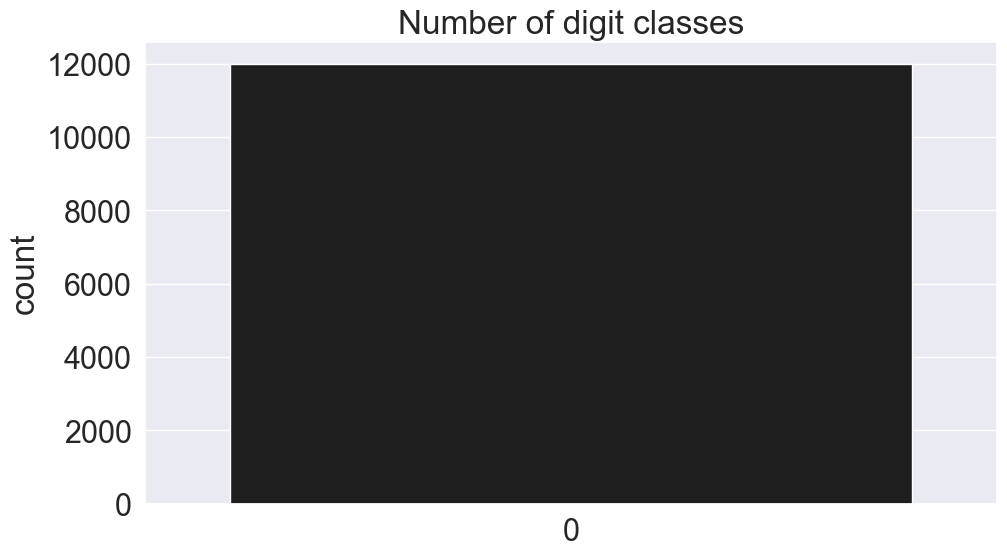

In [ ]:
#@title ●  visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset['label'].value_counts()

In [ ]:
#@title ●  Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset, random_state=42)

dataset_shuffle

domain  ip_present  at_present  url_length  \
1935               extratorrent.cc           0           0           1   
6494                  78.143.96.35           0           0           1   
1720                 superuser.com           0           0           1   
9120                    heylink.me           0           0           0   
360                  torrentdn.com           0           0           1   
...                            ...         ...         ...         ...   
11964  vmi330298.contaboserver.net           0           0           0   
5191                 censor.net.ua           0           0           1   
5390                       udn.com           0           0           1   
860               seekingalpha.com           0           0           1   
7270                    adnet8.com           0           0           1   

       url_depth  redirection  https_domain  short_url  prefix/suffix  \
1935           3            0             0          0              0   
6494           3            0             0          0              0   
1720           3            0             0          0              0   
9120           1            0             0          1              0   
360            2            0             0          0              0   
...          ...          ...           ...        ...            ...   
11964          3            0             0          0              0   
5191           3            0             0          0              0   
5390           4            0             0          0              0   
860            2            0             0          0              0   
7270           2            0             0          0              0   

       dns_record  web_traffic  domain_age  domain_end  dot_count  \
1935            0            0           0           1          0   
6494            0            1           0           1          1   
1720            0            1           1           1          0   
9120            0            1           0           1          0   
360             0            1           1           1          0   
...           ...          ...         ...         ...        ...   
11964           0            1           0           1          1   
5191            0            0           0           1          0   
5390            0            1           0           1          0   
860             0            1           0           1          0   
7270            0            1           1           1          1   

       specialchar_count  subdom_count  label  
1935                   6             0      0  
6494                  19             1      1  
1720                   6             0      0  
9120                   4             0      1  
360                   16             0      0  
...                  ...           ...    ...  
11964                  6             1      1  
5191                  17             1      0  
5390                   7             0      0  
860                    5             0      0  
7270                  14             0      1  

[12000 rows x 17 columns]

In [ ]:
#@title ●  Separating & assigning 
#features and target columns to X & y

y = dataset_shuffle['label']
X = dataset_shuffle.drop(['domain', 'label'], axis=1)


X.shape, y.shape

((12000, 15), (12000,))

## **6.2.Split Train/Val/Test**

In [ ]:
#@title ●  Spliting the dataset 
# into Training, Validation, and Test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


X_train.shape, X_test.shape, X_val.shape

((7200, 15), (2400, 15), (2400, 15))

In [ ]:
#@title ●  Converting target variables
#from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_val = np.ravel(y_val)

In [ ]:
#@title ●  Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
print(X_train)
print('')
print(type(X_train))

print(X_train.shape)

print(X_test.shape)

print(X_val.shape)

[[ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
  -0.63285523]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501  2.9243725
  -0.63285523]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.1883005
   1.58014022]
 ...
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
  -0.63285523]
 [ 0.         -0.15875423 -1.63852044 ...  1.8028575  -0.77192669
   1.58014022]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
   1.58014022]]

<class 'numpy.ndarray'>
(7200, 15)
(2400, 15)
(2400, 15)


In [ ]:

#@title ●  Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12000 rows and 15 columns

Dimensions of the training dataset : 7200 rows and 15 columns

Dimensions of the testing dataset : 2400 rows and 15 columns

Dimensions of the validation dataset : 2400 rows and 15 columns



## **6.3.Machine Learning Models & Training**

In [ ]:
#@title ●  Creating holders
#to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
acc_val = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))
    acc_val.append("{:.2f}%" .format (c, 2))
    
   

### 6.3.1.Decision Tree**

In [ ]:
#@title ●  Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
y_val_tree = tree.predict(X_val)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_pred_tree = (accuracy_score(y_test,y_pred_tree)*100)
acc_val_tree = (accuracy_score(y_val,y_val_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_pred_tree))
print("Decision Tree: Accuracy on validation Data: %.2f%%" % (acc_val_tree))

      
#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 86.76%
Decision Tree: Accuracy on TEST Data: 86.83%
Decision Tree: Accuracy on validation Data: 87.42%


In [ ]:
#@title ●  storing the results. 
#The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.

storeResults('Decision Tree', acc_train_tree, acc_pred_tree, acc_val_tree )


### **6.3.2.Decision Tree Report on Test Data**

In [ ]:
#@title ●  Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Decision Tree on Test Data')
print('')

print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_pred_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_test, y_pred_tree))



Performance Evaluation of Decision Tree on Test Data

Decision Tree: Accuracy on TEST Data: 86.83%

Decision Tree Confusion Matrix:
[[1117  114]
 [ 202  967]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1231
           1       0.89      0.83      0.86      1169

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



In [ ]:
#@title ●  Decision Tree Test Data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_tree)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.87%
Precision: 0.89%
Recall: 0.83%
F1 score: 0.86%


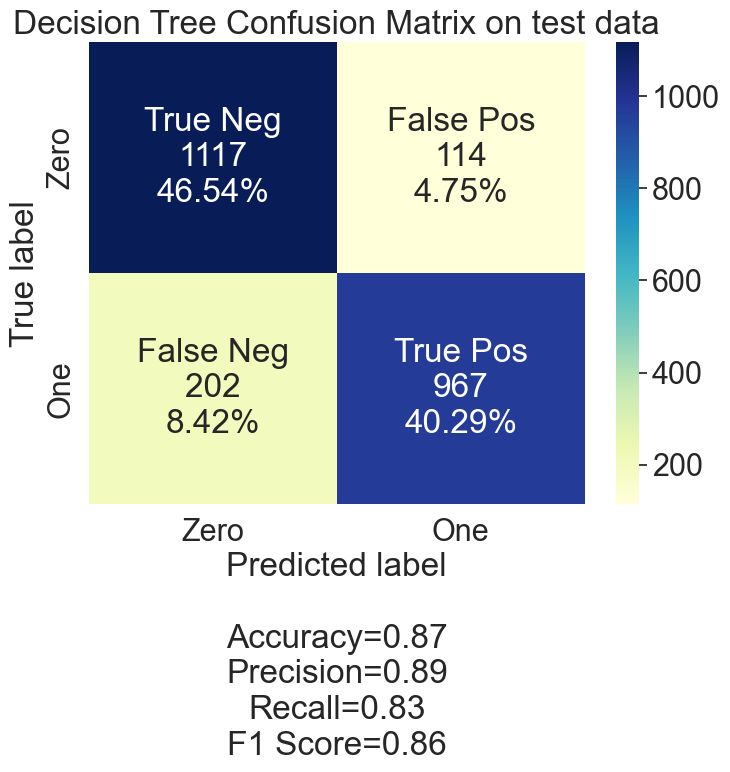

In [ ]:
#@title ● Visualizing Decision tree/Test Data(Blues map)
tree_matrix_test = confusion_matrix(y_test, y_pred_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on test data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))

### **6.3.3.Decision Tree Report on Training Data**

In [ ]:
#@title ●  Classification Report - complete
## Predict the values from the training set

print('Performance Evaluation of Decision Tree on Training Data')
print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))



Performance Evaluation of Decision Tree on Training Data

Decision Tree: Accuracy on Training Data: 86.76%

Decision Tree Confusion Matrix:
[[3247  353]
 [ 600 3000]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3600
           1       0.89      0.83      0.86      3600

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200



In [ ]:
#@title ●  Decision Tree Training Data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_tree)
print('F1 score: %.2f%%' % f1)


#Observation: Individual calculations per metric are different from the CM table since 
#these formula actually looks or compute at class 1 by default


Accuracy: 0.87%
Precision: 0.89%
Recall: 0.83%
F1 score: 0.86%


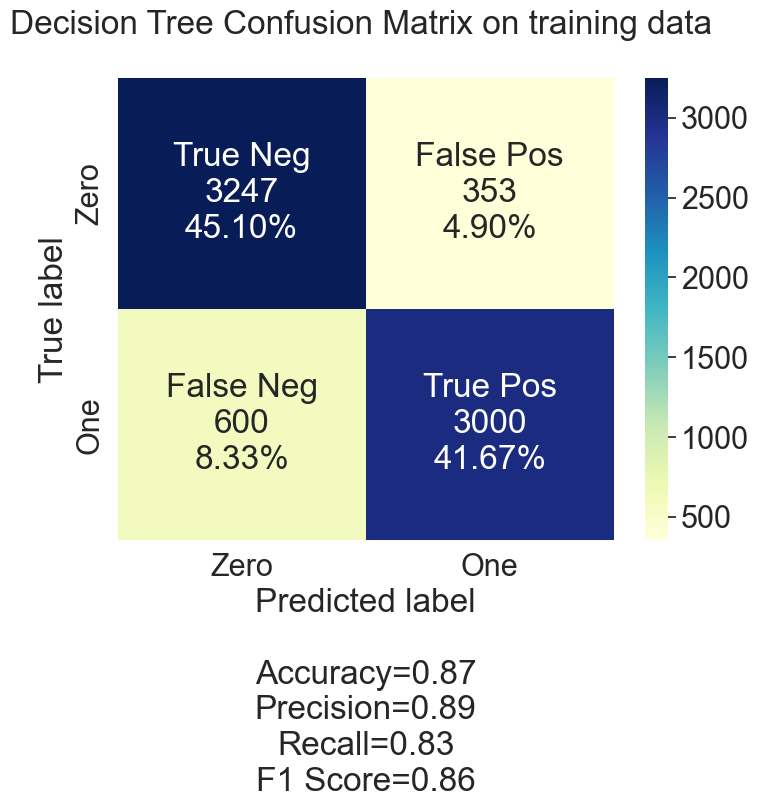

In [ ]:
#@title ●  Visualizing Decision Tree/ Training Data (Blues map)
tree_matrix_train = confusion_matrix(y_train, y_train_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on training data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


### **6.3.4.Random Forest**

In [ ]:
#@title ● Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(n_estimators=1, min_samples_leaf=6, random_state=42)

## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
y_val_forest = forest.predict(X_val)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_pred_forest = (accuracy_score(y_test,y_pred_forest)*100)
acc_val_forest = (accuracy_score(y_val,y_val_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_pred_forest))
print("Random Forest: Accuracy on validation Data: %.2f%%" % (acc_val_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 90.54%
Random Forest: Accuracy on TEST Data: 90.75%
Random Forest: Accuracy on validation Data: 90.42%


In [ ]:
#@title ●  storing the results. 
#The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_pred_forest, acc_val_forest)


### **6.3.5.Random Forest Report on Test Data**

In [ ]:
# Classification Report - complete
#@title ●  Predict the values from the test set

print('Performance Evaluation of Random Forest on Test Data')
print('')

print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_pred_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_test, y_pred_forest))



Performance Evaluation of Random Forest on Test Data

Random Forest: Accuracy on TEST Data: 90.75%

Random Forest Confusion Matrix:
[[1171   60]
 [ 162 1007]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1231
           1       0.94      0.86      0.90      1169

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



In [ ]:
#@title ●  Random Forest Test Data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_forest)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.91%
Precision: 0.94%
Recall: 0.86%
F1 score: 0.90%


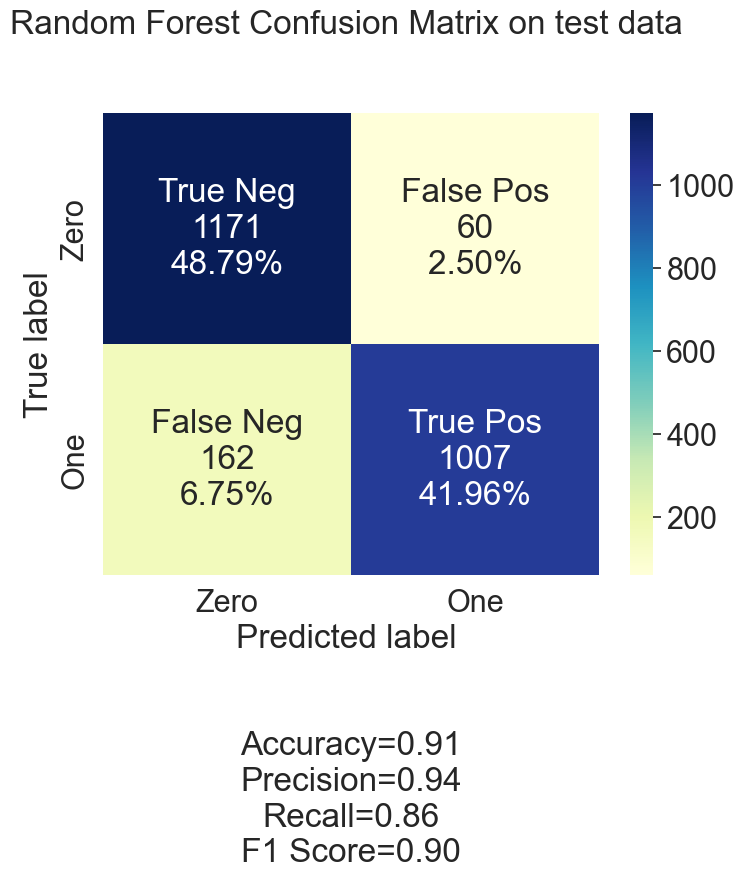

In [ ]:
#@title ● Visualizing Random Forest / test Data (Blues map)
forest_matrix_test = confusion_matrix(y_test, y_pred_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on test data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label \n' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


### **6.3.6.Random Forest Report on Training Data**

In [ ]:
#@title ●  Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Training Data')
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))



Performance Evaluation of Random Forest on Training Data

Random Forest: Accuracy on Training Data: 90.54%

Random Forest Confusion Matrix:
[[3436  164]
 [ 517 3083]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3600
           1       0.95      0.86      0.90      3600

    accuracy                           0.91      7200
   macro avg       0.91      0.91      0.91      7200
weighted avg       0.91      0.91      0.91      7200



In [ ]:
#@title ●  Random Forest Training Data 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_forest)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.91%
Precision: 0.95%
Recall: 0.86%
F1 score: 0.90%


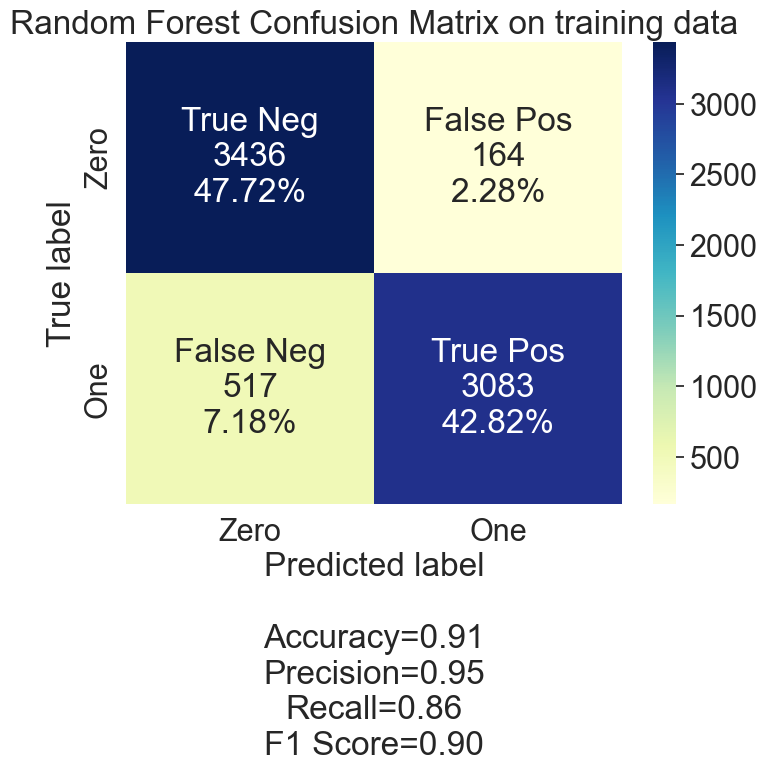

In [ ]:

#@title ● Visualizing Random Forest / Training Data (Blues map)
forest_matrix_train = confusion_matrix(y_train, y_train_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on training data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


### **6.3.7.CNN Model**

In [ ]:
#@title ●  importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

In [ ]:
#@title ●  Reshaping data
#as expected by Sequential model
#convert to 3 dim array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)


3 dim array as expected by cnn model
X_train: (7200, 15, 1)
X_test: (2400, 15, 1)
X_val: (2400, 15, 1)


### **6.3.8.Evaluating CNN Model Traditionally**

In [ ]:
#@title ●  importing required packages


import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
 

In [ ]:
#@title ●  Define Neural Network Architecture.
tf.random.set_random_seed(2)
#tf.random.set_seed(2)
#tf.random.set_seed(SEED)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train[0].shape
                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])


In [ ]:
proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 13, 20)            80        
                                                                 
 batch_normalization_2 (Batc  (None, 13, 20)           80        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 13, 20)            0         
                                                                 
 CONV_1 (Conv1D)             (None, 13, 20)            1220      
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 6, 20)             0         
                                                                 
 CONV_2 (Conv1D)             (None, 6, 40)             2440      
                                                    

In [ ]:

#@title ●  Train the Model

print('Building model... \n')

history = proposed.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    batch_size=128, epochs=80, verbose=2)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))



Building model... 

Train on 7200 samples, validate on 2400 samples
Epoch 1/80


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


7200/7200 - 1s - loss: 0.9618 - acc: 0.6301 - val_loss: 0.9520 - val_acc: 0.8037 - 1s/epoch - 174us/sample
Epoch 2/80
7200/7200 - 1s - loss: 0.7540 - acc: 0.8257 - val_loss: 0.7907 - val_acc: 0.8458 - 779ms/epoch - 108us/sample
Epoch 3/80
7200/7200 - 1s - loss: 0.6482 - acc: 0.8614 - val_loss: 0.7003 - val_acc: 0.8858 - 798ms/epoch - 111us/sample
Epoch 4/80
7200/7200 - 1s - loss: 0.6280 - acc: 0.8665 - val_loss: 0.6570 - val_acc: 0.8792 - 749ms/epoch - 104us/sample
Epoch 5/80
7200/7200 - 1s - loss: 0.5998 - acc: 0.8708 - val_loss: 0.6052 - val_acc: 0.8938 - 731ms/epoch - 102us/sample
Epoch 6/80
7200/7200 - 1s - loss: 0.5803 - acc: 0.8788 - val_loss: 0.5648 - val_acc: 0.8967 - 732ms/epoch - 102us/sample
Epoch 7/80
7200/7200 - 1s - loss: 0.5658 - acc: 0.8814 - val_loss: 0.5419 - val_acc: 0.9004 - 752ms/epoch - 104us/sample
Epoch 8/80
7200/7200 - 1s - loss: 0.5516 - acc: 0.8829 - val_loss: 0.5213 - val_acc: 0.9004 - 732ms/epoch - 102us/sample
Epoch 9/80
7200/7200 - 1s - loss: 0.5380 - acc

Epoch 69/80
7200/7200 - 1s - loss: 0.3258 - acc: 0.9160 - val_loss: 0.3464 - val_acc: 0.9208 - 702ms/epoch - 97us/sample
Epoch 70/80
7200/7200 - 1s - loss: 0.3256 - acc: 0.9161 - val_loss: 0.3446 - val_acc: 0.9133 - 700ms/epoch - 97us/sample
Epoch 71/80
7200/7200 - 1s - loss: 0.3271 - acc: 0.9151 - val_loss: 0.3454 - val_acc: 0.9067 - 700ms/epoch - 97us/sample
Epoch 72/80
7200/7200 - 1s - loss: 0.3252 - acc: 0.9171 - val_loss: 0.3413 - val_acc: 0.9237 - 714ms/epoch - 99us/sample
Epoch 73/80
7200/7200 - 1s - loss: 0.3224 - acc: 0.9160 - val_loss: 0.3402 - val_acc: 0.9158 - 702ms/epoch - 97us/sample
Epoch 74/80
7200/7200 - 1s - loss: 0.3181 - acc: 0.9164 - val_loss: 0.3372 - val_acc: 0.9179 - 699ms/epoch - 97us/sample
Epoch 75/80
7200/7200 - 1s - loss: 0.3194 - acc: 0.9196 - val_loss: 0.3383 - val_acc: 0.9175 - 701ms/epoch - 97us/sample
Epoch 76/80
7200/7200 - 1s - loss: 0.3202 - acc: 0.9167 - val_loss: 0.3382 - val_acc: 0.9192 - 700ms/epoch - 97us/sample
Epoch 77/80
7200/7200 - 1s - los

In [ ]:

#@title ●  Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train, y_train)[1]*100)
acc_pred_cnn = (proposed.evaluate(X_test, y_test)[1]*100)
acc_val_cnn = (proposed.evaluate(X_val, y_val)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_pred_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))



batch_size=128, epochs=80

CNN: Accuracy on training Data: 91.99%
CNN: Accuracy on TEST Data: 91.58%
CNN: Accuracy on validation Data: 90.83%


In [ ]:

#@title ●  storing the results.
#The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_pred_cnn, acc_val_cnn)


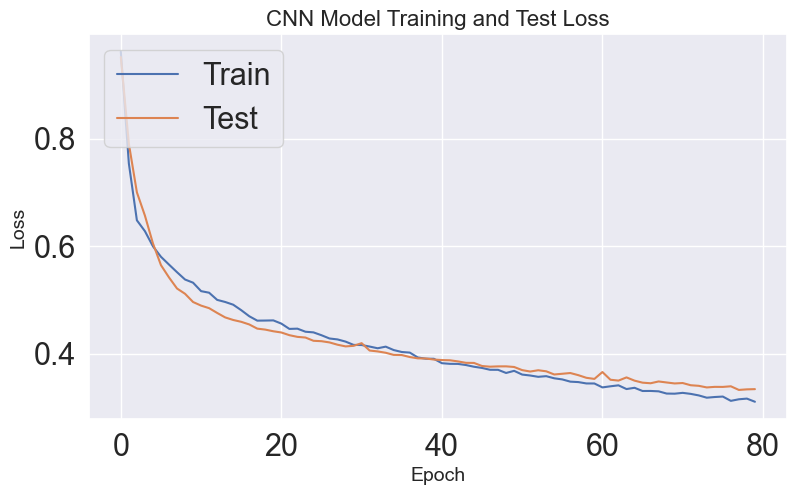

In [ ]:
#@title ●  Plot training & test loss values
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/Datasets/Dataset3/Graph-Visuals/val-loss.png')
plt.show()

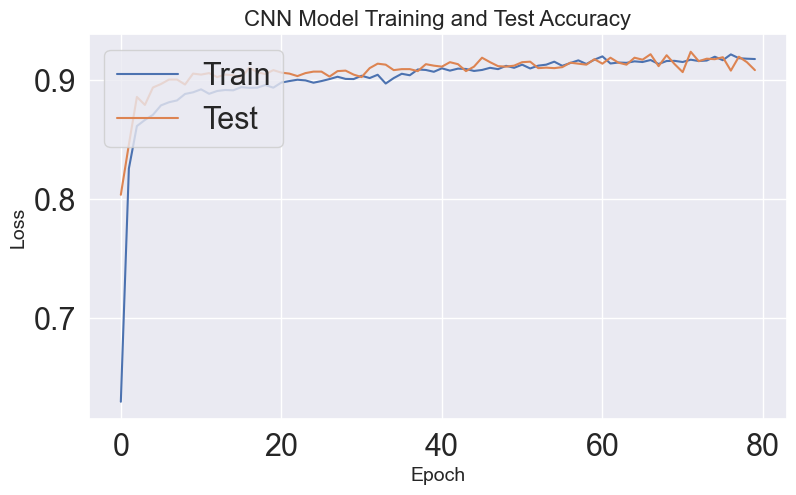

In [ ]:
#@title ●  Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/Datasets/Dataset3/Graph-Visuals/test-acc-docu.png')
plt.show()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


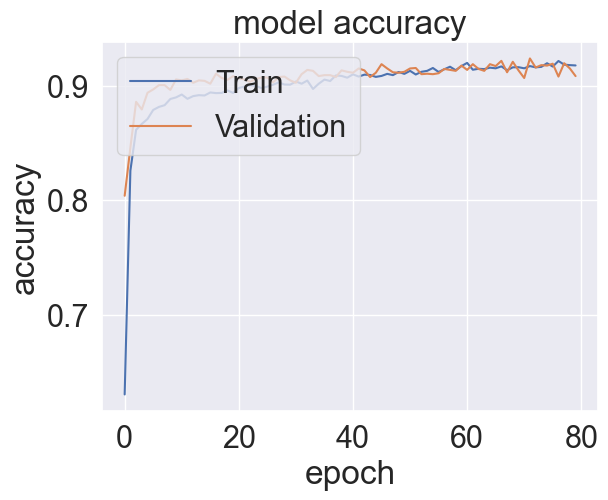

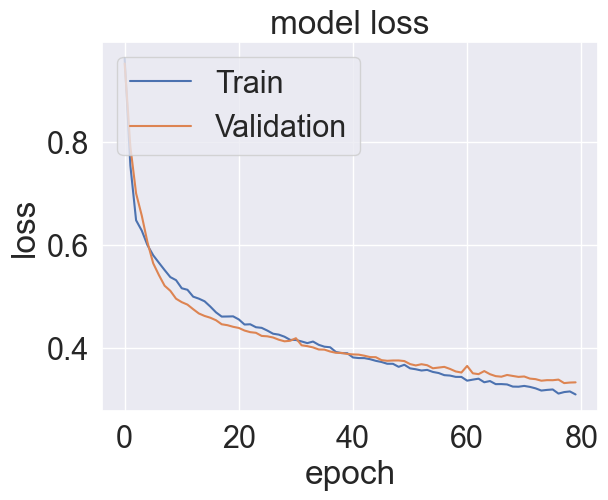

In [ ]:
#@title ●  Plotting CNN Model Accuracy
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **6.3.9.Test CNN Model** **bold text**

In [ ]:
#@title ● Predicting results for test & train dataset
# Predicting results for test dataset
y_pred_cnn = proposed.predict(X_test)

# Predicting results for train dataset
y_train_cnn = proposed.predict(X_train)


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels

Solution, round off the output which will convert the float values into an integer

use np.argmax() to select the index number which has a higher value in a row

In [ ]:
#@title ●  Process Class Labels
y_train_cnn = np.argmax(np.round(y_train_cnn),axis=1)
y_pred_cnn = np.argmax(np.round(y_pred_cnn),axis=1)


y_pred_cnn, y_train_cnn

(array([1, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 1, 0], dtype=int64))

In [ ]:
#@title ●  shapes
y_pred_cnn.shape, y_test.shape


((2400,), (2400,))

In [ ]:
## Predict the values from the test set

#@title ● Evaluate CNN Test Data
print('')

print("CNN: Accuracy on Test Data: %.2f%%" % (acc_pred_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, y_pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)


CNN: Accuracy on Test Data: 91.58%

CNN Confusion Matrix:
[[1217   14]
 [ 188  981]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1231
           1       0.99      0.84      0.91      1169

    accuracy                           0.92      2400
   macro avg       0.93      0.91      0.92      2400
weighted avg       0.92      0.92      0.92      2400


Score Results: Loss, Accuracy [0.309245411157608, 0.91583335]


In [ ]:
#title Predict the values from the test set

#@title ●  Evaluate CNN Accuracy.


print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))


Accuracy: 0.92%
Precision: 0.99%
Recall: 0.84%
F1 score: 0.91%


F1 score: 90.67%
Recall: 83.92%
Precision: 98.59%
Accuracy: 91.58%


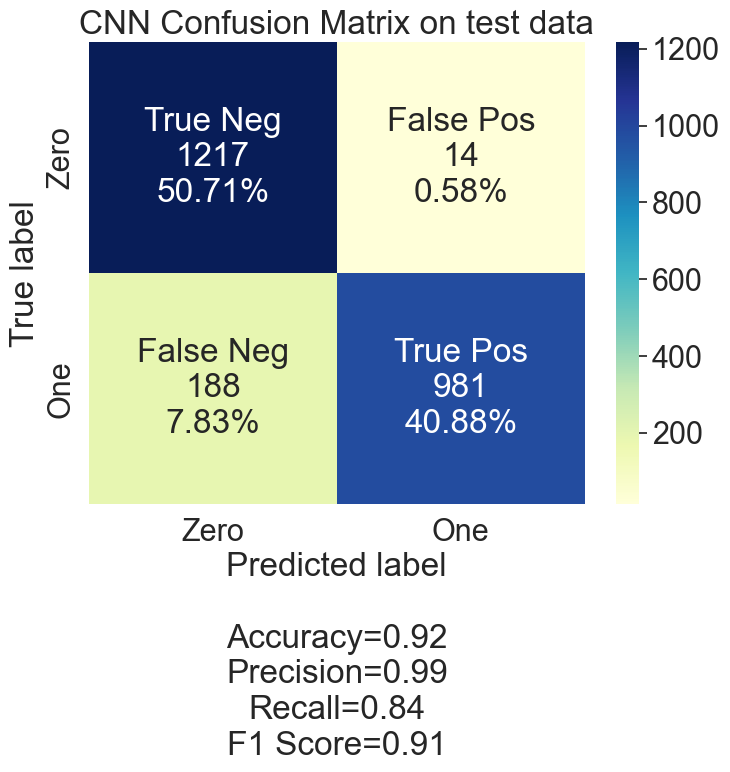

In [ ]:

#@title ● Visualizing CNN model / Training Data (Blues map)
cnn_matrix_test = confusion_matrix(y_test, y_pred_cnn)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='CNN Confusion Matrix on test data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


In [ ]:
## Classification Report - complete
## Predict the values from the test set
#@title ●  CNN performance evaluation.
print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, y_train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, y_train_cnn))

print('')
score = proposed.evaluate(X_train, y_train, verbose=1)
print('Score Results: Loss, Accuracy',score)

Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 91.99%

CNN Confusion Matrix:
[[3564   36]
 [ 541 3059]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3600
           1       0.99      0.85      0.91      3600

    accuracy                           0.92      7200
   macro avg       0.93      0.92      0.92      7200
weighted avg       0.93      0.92      0.92      7200


Score Results: Loss, Accuracy [0.296550011171235, 0.91986114]


In [ ]:
#@title ● Performance Evaluation of CNN on Training Data

## Classification Report - complete
## Predict the values from the test set


print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))


Accuracy: 0.92%
Precision: 0.99%
Recall: 0.85%
F1 score: 0.91%


F1 score: 91.38%
Recall: 84.97%
Precision: 98.84%
Accuracy: 91.99%


##**6.4.Predicted vs Actual Results**

In [ ]:
#@title ●  Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test)):
    if y_pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (y_pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

In [ ]:
y_pred_cnn 

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
#@title ● Comparison of Models
acc_train, acc_test, acc_val

(['86.76%', '90.54%', '91.99%'],
 ['86.83%', '90.75%', '91.58%'],
 ['87.42%', '90.42%', '90.83%'])

In [ ]:
#@title ●  results
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test,
    'Val Accuracy':   acc_val})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


In [ ]:
#@title ●  Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model Train Accuracy Test Accuracy Val Accuracy
3            CNN         91.99%        91.58%       90.83%
2  Random Forest         90.54%        90.75%       90.42%
1  Decision Tree         86.76%        86.83%       87.42%

In [ ]:

#@title ●  reference

# """"def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           cmap=plt.cm.Blues):
#     """
#     #This function prints and plots the confusion matrix.
#     #Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         title='Normalized confusion matrix'
#     else:
#         title='Confusion matrix'

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()
    
# ## multiclass or binary report
# ## If binary (sigmoid output), set binary parameter to True
# def full_multiclass_report(model,
#                            x,
#                            y_true,
#                            classes,
#                            batch_size=32,
#                            binary=False):

#     # 1. Transform one-hot encoded y_true into their class number
#     if not binary:
#         y_true = np.argmax(y_true,axis=1)
    
    
#     # 3. Print accuracy score
#     print("Accuracy : "+ str(accuracy_score(y_test,pred_cnn)))
    
#     print("")
    
#     # 4. Print classification report
#     print("Classification Report")
#     print(classification_report(y_test,pred_cnn,digits=5))    
    
#     # 5. Plot confusion matrix
#     cnf_matrix = confusion_matrix(y_test,pred_cnn)
#     print(cnf_matrix)
#     plot_confusion_matrix(cnf_matrix,classes=classes)

Completed - End

# <font color=blue>**7.Final Revised CNN Model**</font>


## <font color=blue>DATASET 3 MODEL TRAINING Process</font>

## <font color=blue>50% phishing - 10,164 URLs | 50% benign - 10,164 URLs</font>

## <font color=blue>Chosen Dataset</font>

## Result: 
- batch_size=128, epochs=80
- CNN: Accuracy on training Data: 94.56%
- CNN: Accuracy on TEST Data: 94.36%


In [ ]:
#@title ● importing packages
# data
#Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
 

print(tf.__version__)

import datetime


2.10.0


In [ ]:
load_ext tensorboard

## **7.1.Importing the dataset**

In [ ]:
#@title ●  load FINAL-traindata 
dataset = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset2/FINAL-traindata.csv")
dataset.head()


domain  ip_present  at_present  url_length  url_depth  redirection  \
0    NaN           0           0           1          3            0   
1    NaN           0           0           1          4            0   
2    NaN           0           0           0          2            0   
3    NaN           0           0           1          4            0   
4    NaN           0           0           0          2            0   

   https_domain  short_url  prefix/suffix  dns_record  web_traffic  \
0             0          0              0           0            0   
1             0          0              0           0            0   
2             0          0              0           0            1   
3             0          0              0           0            1   
4             0          0              0           0            1   

   domain_age  domain_end  dot_count  specialchar_count  subdom_count  label  
0           1           1          0                  2             0      0  
1           1           1          0                  4             0      0  
2           1           1          0                  7             0      0  
3           1           1          0                  3             0      0  
4           1           1          0                  3             0      0

In [ ]:
#@title ●  Look for missing values
dataset.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               9280
ip_present              0
at_present              0
url_length              0
url_depth               0
redirection             0
https_domain            0
short_url               0
prefix/suffix           0
dns_record              0
web_traffic             0
domain_age              0
domain_end              0
dot_count               0
specialchar_count       0
subdom_count            0
label                   0
dtype: int64

0    10164
1    10164
Name: label, dtype: int64

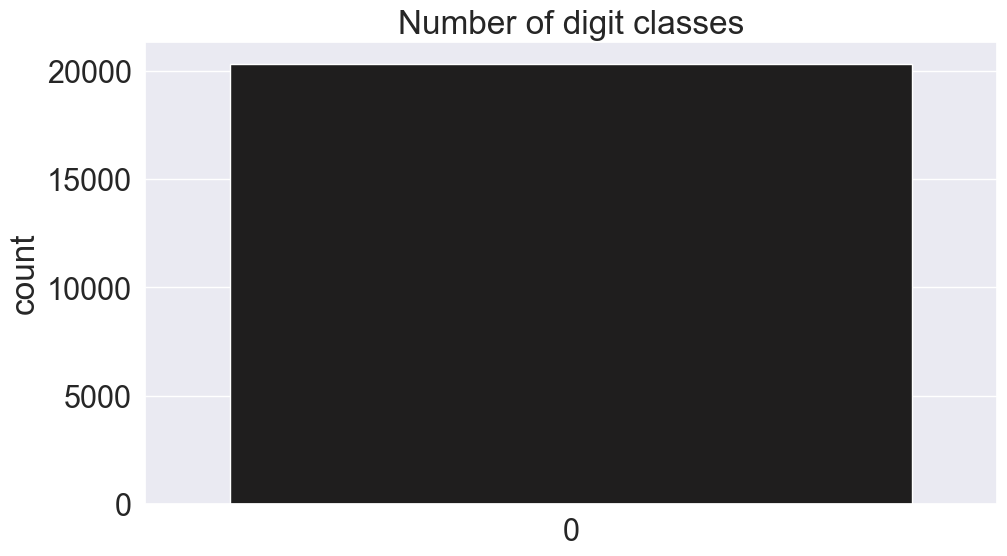

In [ ]:
#@title ●  visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset['label'].value_counts()

In [ ]:
#@title ●  columns names 
dataset.columns.to_list()

['domain',
 'ip_present',
 'at_present',
 'url_length',
 'url_depth',
 'redirection',
 'https_domain',
 'short_url',
 'prefix/suffix',
 'dns_record',
 'web_traffic',
 'domain_age',
 'domain_end',
 'dot_count',
 'specialchar_count',
 'subdom_count',
 'label']

In [ ]:
#@title ●  descriptive statistics for data
dataset.describe() 

ip_present    at_present    url_length     url_depth   redirection  \
count     20328.0  20328.000000  20328.000000  20328.000000  20328.000000   
mean          0.0      0.022383      0.420307      2.496311      0.007723   
std           0.0      0.147929      0.493620      1.851416      0.087545   
min           0.0      0.000000      0.000000      0.000000      0.000000   
25%           0.0      0.000000      0.000000      1.000000      0.000000   
50%           0.0      0.000000      0.000000      2.000000      0.000000   
75%           0.0      0.000000      1.000000      4.000000      0.000000   
max           0.0      1.000000      1.000000     22.000000      1.000000   

       https_domain     short_url  prefix/suffix    dns_record   web_traffic  \
count       20328.0  20328.000000   20328.000000  20328.000000  20328.000000   
mean            0.0      0.098386       0.128247      0.037584      0.772924   
std             0.0      0.297844       0.334373      0.190192      0.418952   
min             0.0      0.000000       0.000000      0.000000      0.000000   
25%             0.0      0.000000       0.000000      0.000000      1.000000   
50%             0.0      0.000000       0.000000      0.000000      1.000000   
75%             0.0      0.000000       0.000000      0.000000      1.000000   
max             0.0      1.000000       1.000000      1.000000      1.000000   

         domain_age    domain_end     dot_count  specialchar_count  \
count  20328.000000  20328.000000  20328.000000       20328.000000   
mean       0.724223      0.888135      0.255264           5.476928   
std        0.446916      0.315209      0.436020           4.951982   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      1.000000      0.000000           3.000000   
50%        1.000000      1.000000      0.000000           4.000000   
75%        1.000000      1.000000      1.000000           6.000000   
max        1.000000      1.000000      1.000000         127.000000   

       subdom_count         label  
count  20328.000000  20328.000000  
mean       0.418388      0.500000  
std        0.493307      0.500012  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.500000  
75%        1.000000      1.000000  
max        1.000000      1.000000

## **7.2.Split Train/Val/Test**

In [ ]:
#@title ● Shuffle dataset
# shuffle dataset **once**, but reliably so that each run yields the same results

data = shuffle(dataset, random_state=32)

data

domain  ip_present  at_present  url_length  \
19582               forms.office.com           0           0           1   
1004                             NaN           0           0           0   
4867                             NaN           0           0           0   
12777               573805.selcdn.ru           0           0           1   
17732                   xj3pr.mjt.lu           0           0           1   
...                              ...         ...         ...         ...   
6745                        nesn.com           0           0           1   
19527              kurortnoye.com.ua           0           1           1   
9526                             NaN           0           0           0   
9771                             NaN           0           0           0   
10967  gegeeggehhh.000webhostapp.com           0           0           1   

       url_depth  redirection  https_domain  short_url  prefix/suffix  \
19582          2            0             0          0              0   
1004           3            0             0          0              0   
4867           6            0             0          0              0   
12777          3            0             0          0              0   
17732          5            0             0          0              0   
...          ...          ...           ...        ...            ...   
6745           3            0             0          0              0   
19527          3            0             0          0              0   
9526           1            0             0          0              0   
9771           3            0             0          0              0   
10967          1            0             0          0              0   

       dns_record  web_traffic  domain_age  domain_end  dot_count  \
19582           0            1           1           1          1   
1004            0            1           1           1          0   
4867            0            1           1           1          0   
12777           0            1           0           1          1   
17732           0            1           1           1          0   
...           ...          ...         ...         ...        ...   
6745            0            1           0           1          0   
19527           0            0           1           0          1   
9526            0            1           1           1          0   
9771            0            1           1           1          0   
10967           0            1           0           1          1   

       specialchar_count  subdom_count  label  
19582                  9             1      1  
1004                   2             1      0  
4867                   5             0      0  
12777                  6             1      1  
17732                  9             1      1  
...                  ...           ...    ...  
6745                   7             0      0  
19527                  8             1      1  
9526                   1             0      0  
9771                   2             0      0  
10967                  4             1      1  

[20328 rows x 17 columns]

In [ ]:
#@title ●  set feature_col & target_col
feature_col = ['ip_present', 'at_present', 'url_length', 'url_depth', 'redirection', 'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count', 'specialchar_count', 'subdom_count']
target_col = ['label']

#feature_col = data.iloc[:, 1:16]
#target_col = data.iloc[:, [16]]


In [ ]:
#@title ●  Separating & assigning features and target columns to X & y

y = pd.DataFrame(data[target_col]) #y target
X = data[feature_col] #X feature


print('shapes:',X.shape, y.shape,'\n','_'*45,'\n')
print('feature columns:',X.columns.values)

shapes: (20328, 15) (20328, 1) 
 _____________________________________________ 

feature columns: ['ip_present' 'at_present' 'url_length' 'url_depth' 'redirection'
 'https_domain' 'short_url' 'prefix/suffix' 'dns_record' 'web_traffic'
 'domain_age' 'domain_end' 'dot_count' 'specialchar_count' 'subdom_count']


In [ ]:
#@title ● Spliting the dataset into Training and Test Set


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.3, random_state=12)


X_train.shape, X_test.shape

#70% training
#30% test



((14229, 15), (6099, 15))

In [ ]:
#@title ● Training & Testing Data
# Original dataset
y_legw = y.label.value_counts()[0]/(y.label.count())
y_phishw = y.label.value_counts()[1]/(y.label.count())

print("********************** Proportion on the give dataset before the split ********************** \n")
print("Percentage of Legitimate websites :", y_legw)
print("Percentage of Phishing websites   :", y_phishw, "\n")


## Training dataset
y_train_legw = y_train.label.value_counts()[0]/(y_train.label.count())
y_train_phishw = y_train.label.value_counts()[1]/(y_train.label.count())

print("********************** Proportion on the Training datase t**********************\n")
print("Percentage of Legitimate websites :", y_train_legw)
print("Percentage of Phishing websites   :", y_train_phishw, "\n")


## Testing dataset
y_test_legw = y_test.label.value_counts()[0]/(y_test.label.count())
y_test_phishw = y_test.label.value_counts()[1]/(y_test.label.count())

print("********************** Proportion on the Testing dataset **********************\n")
print("Percentage of Legitimate websites :", y_test_legw)
print("Percentage of Phishing websites   :", y_test_phishw, "\n")



********************** Proportion on the give dataset before the split ********************** 

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Training datase t**********************

Percentage of Legitimate websites : 0.5000351395038302
Percentage of Phishing websites   : 0.4999648604961698 

********************** Proportion on the Testing dataset **********************

Percentage of Legitimate websites : 0.499918019347434
Percentage of Phishing websites   : 0.500081980652566 



In [ ]:

#@title ● Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 14229 rows and 15 columns

Dimensions of the testing dataset : 6099 rows and 15 columns



In [ ]:
#@title ●  Converting target variables

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

y_train, y_test

(array([1, 0, 1, ..., 0, 0, 1], dtype=int64),
 array([1, 0, 0, ..., 1, 0, 1], dtype=int64))

In [ ]:
#@title ● Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print('')
print(type(X_train))

[[ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.51478804
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ... -0.58749495  0.31870202
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ...  1.7021423   0.94381956
  -0.85167756]
 ...
 [ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.93153307
   1.17415327]
 [ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.51478804
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ...  1.7021423   1.36056459
   1.17415327]]

<class 'numpy.ndarray'>


In [ ]:
#@title ●  train & test shapes
print(X_train.shape)

print(X_test.shape)

(14229, 15)
(6099, 15)


In [ ]:

#@title ● Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

#print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 14229 rows and 15 columns

Dimensions of the testing dataset : 6099 rows and 15 columns




## <font color=red>○ Machine Learning Models & Training</font>


In [ ]:
#@title ○ Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))
    
    
   

## **7.3.Decision Tree**

### **7.3.1.Model**

In [ ]:
#@title ● Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=9)
## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_test_tree = (accuracy_score(y_test,y_test_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_test_tree))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set

#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 88.85%
Decision Tree: Accuracy on TEST Data: 89.13%


In [ ]:
#@title ● storing the results.
#The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.3.2.Decision Tree Report on Test Data**

In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ● Performance Evaluation of Decision Tree on Test Data
print('')

print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_test_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_test_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_test, y_test_tree))




Decision Tree: Accuracy on TEST Data: 89.13%

Decision Tree Confusion Matrix:
[[2881  168]
 [ 495 2555]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3049
           1       0.94      0.84      0.89      3050

    accuracy                           0.89      6099
   macro avg       0.90      0.89      0.89      6099
weighted avg       0.90      0.89      0.89      6099



In [ ]:
#@title ● Decision Tree Test Data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_tree)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.89%
Precision: 0.94%
Recall: 0.84%
F1 score: 0.89%


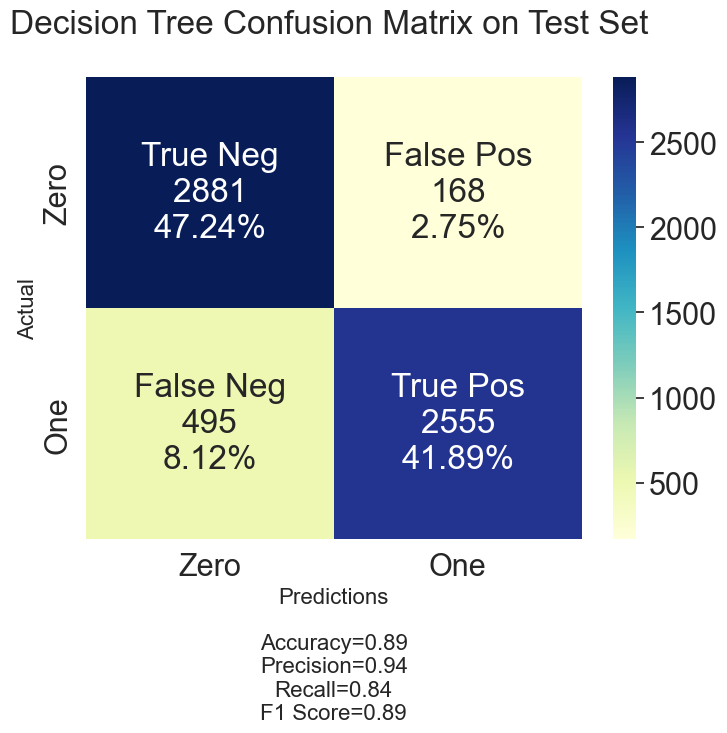

In [ ]:
tree_matrix_test = confusion_matrix(y_test, y_test_tree)
sns.set(font_scale=2)
#Decision Tree Confusion Matrix Plotting Function
#@title  ● Visualizing Decision Tree/Test Data (YlGnBu map).
#Generating confusion matrix  
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6), 
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Test Set \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories)

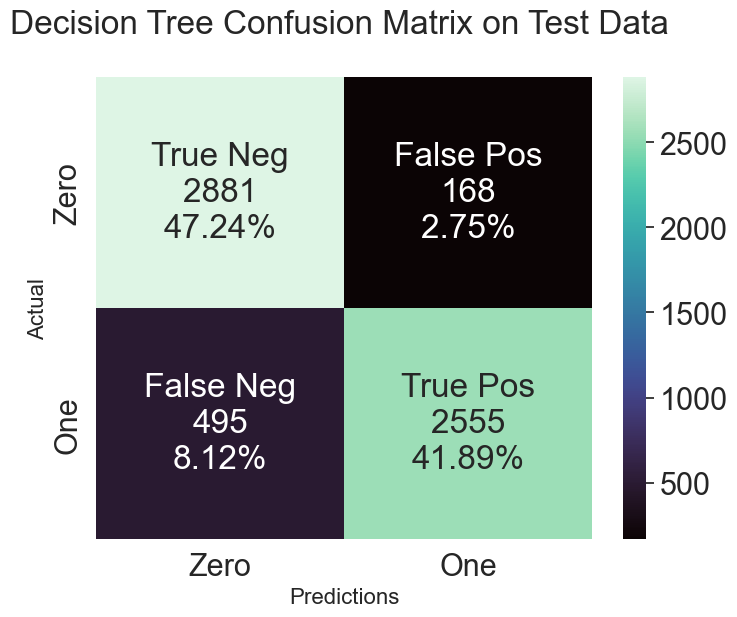

In [ ]:
#@title ● Visualizing Decision Tree/Test Data (mako map).

## For Documentation
##Get the confusion matrix

tree_matrix_test = confusion_matrix(y_test, y_test_tree)
sns.set(font_scale=2)

print('')
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Test Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories)


#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-test-tree-DOCU.png", bbox_inches='tight', pad_inches=0)


### **7.3.3.Decision Tree Report on Training Data**

In [ ]:
#@title ● Performance Evaluation of Decision Tree on Training Data')

## Classification Report - complete
## Predict the values from the training set

print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))




Decision Tree: Accuracy on Training Data: 88.85%

Decision Tree Confusion Matrix:
[[6702  413]
 [1174 5940]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7115
           1       0.93      0.83      0.88      7114

    accuracy                           0.89     14229
   macro avg       0.89      0.89      0.89     14229
weighted avg       0.89      0.89      0.89     14229



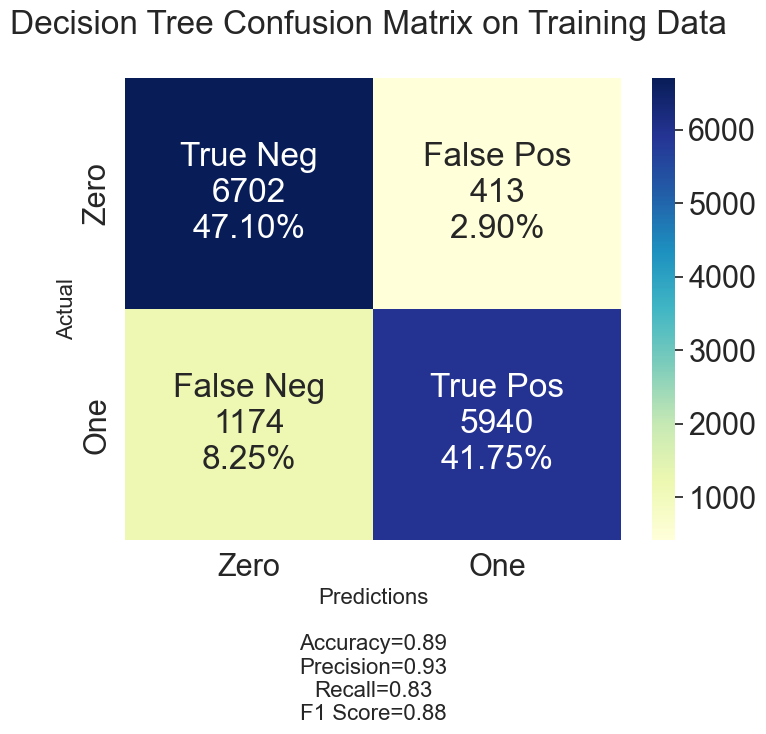

In [ ]:
#@title ● Visualizing Decision Tree/Training Data (YlGnBu map) .
tree_matrix_train = confusion_matrix(y_train, y_train_tree)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Training Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories)

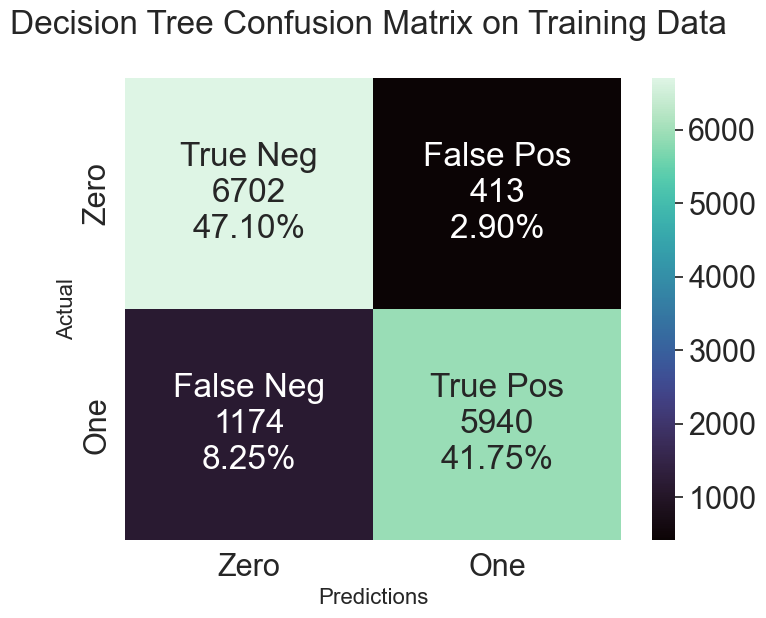

In [ ]:
## For Documentation
#@title ● Visualizing Decision Tree/Training Data (mako map)
##Get the confusion matrix
tree_matrix_train = confusion_matrix(y_train, y_train_tree)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-train-tree-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
#@title ● Decision Tree Training Data results.
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_tree)
print('F1 score: %.2f%%' % f1)


#Observation: Individual calculations per metric are different from the CM table since 
#these formula actually looks or compute at class 1 by default


Accuracy: 0.89%
Precision: 0.93%
Recall: 0.83%
F1 score: 0.88%


## **7.4.Random Forest**

### **7.4.1.Model**

In [ ]:
#@title ● Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(criterion='gini', max_depth=6, random_state=11)

## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_test_forest = (accuracy_score(y_test,y_test_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_test_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 90.41%
Random Forest: Accuracy on TEST Data: 90.77%


In [ ]:
#@title ● storing the results.
#The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.4.2.Random Forest Report on Test Data**

In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ●  Performance Evaluation of Random Forest on Test Data
print('')

print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_test_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_test, y_test_forest))




Random Forest: Accuracy on TEST Data: 90.77%

Random Forest Confusion Matrix:
[[2889  160]
 [ 403 2647]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3049
           1       0.94      0.87      0.90      3050

    accuracy                           0.91      6099
   macro avg       0.91      0.91      0.91      6099
weighted avg       0.91      0.91      0.91      6099



In [ ]:
#@title ● Random Forest Test Data results.
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_forest)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.91%
Precision: 0.94%
Recall: 0.87%
F1 score: 0.90%


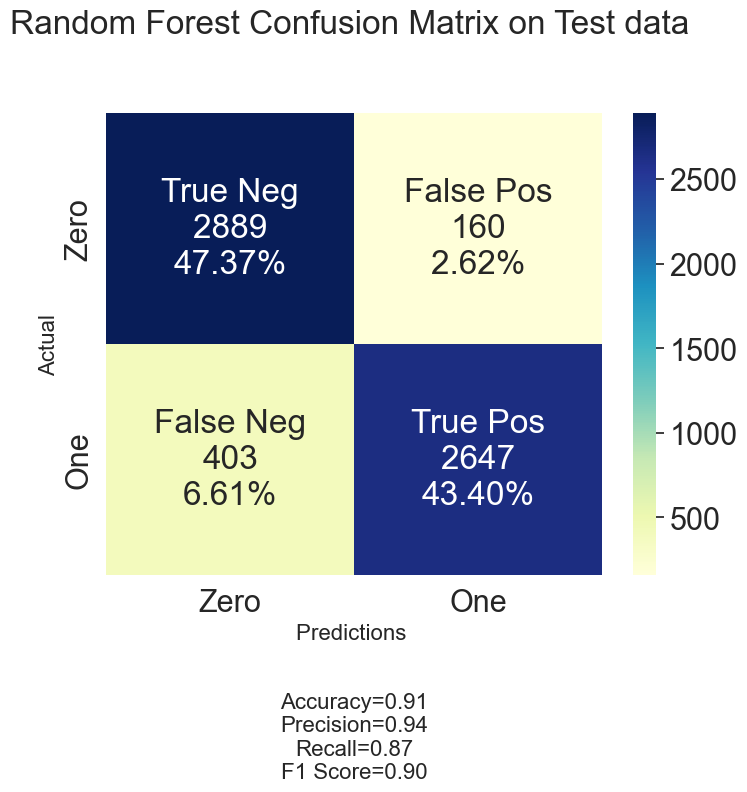

In [ ]:

##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_test_forest)
sns.set(font_scale=2)

#@title ● Visualizing Random Forest/Test Data (Blues map).
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on Test data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions \n' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


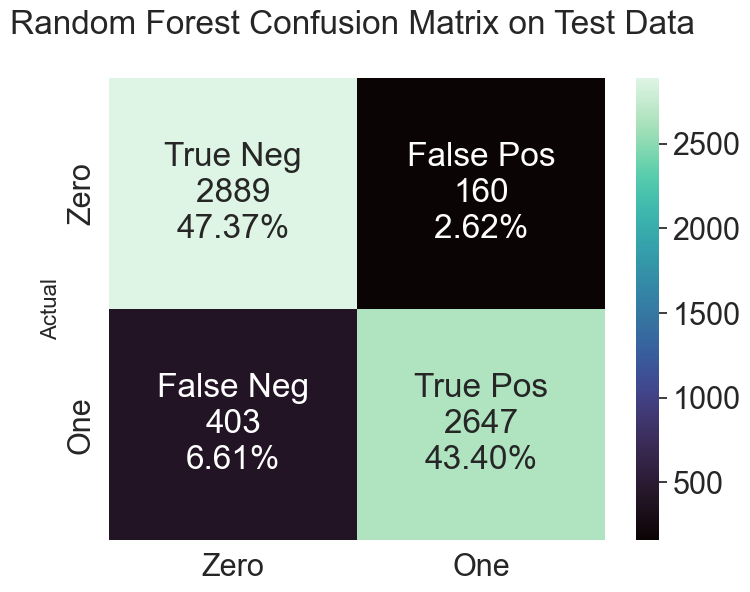

In [ ]:
## For Documentation
#@title ●   Visualizing Random Forest/Test Data (mako map).
##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_test_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-test-forest-DOCU.png", bbox_inches='tight', pad_inches=0)


### **7.4.3.Random Forest Report on Training Data**

In [ ]:
## Classification Report - complete
## Predict the values from the training set

#@title ●  Performance Evaluation of Random Forest on Training Data
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))




Random Forest: Accuracy on Training Data: 90.41%

Random Forest Confusion Matrix:
[[6707  408]
 [ 957 6157]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7115
           1       0.94      0.87      0.90      7114

    accuracy                           0.90     14229
   macro avg       0.91      0.90      0.90     14229
weighted avg       0.91      0.90      0.90     14229



In [ ]:
#@title ●  Random Forest Training Data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_forest)
print('F1 score: %.2f%%' % f1)



Accuracy: 0.90%
Precision: 0.94%
Recall: 0.87%
F1 score: 0.90%


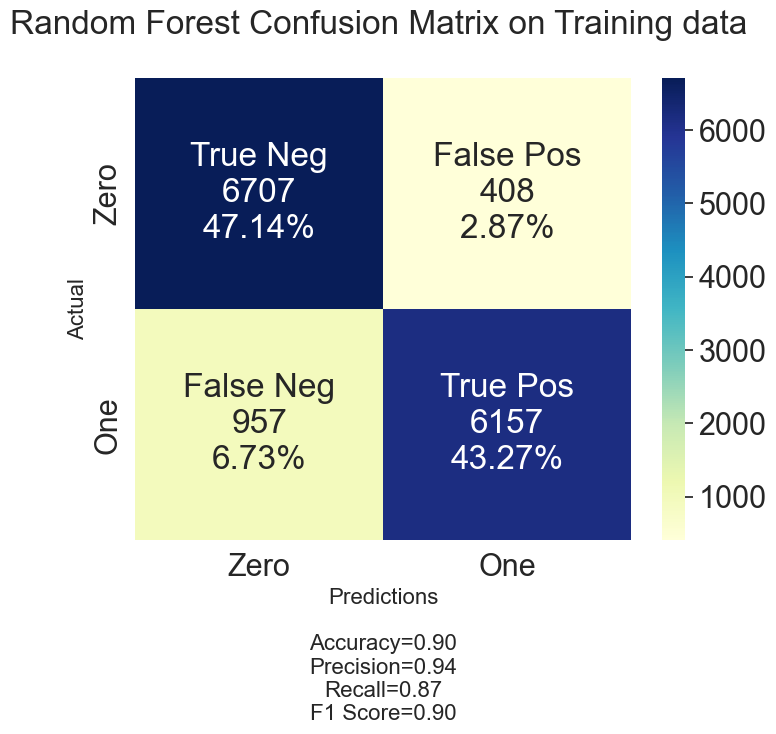

In [ ]:
#@title ●  Visualizing Random Forest/Trainig Data (YlGnBu map).
##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Random Forest Confusion Matrix on Training data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories)


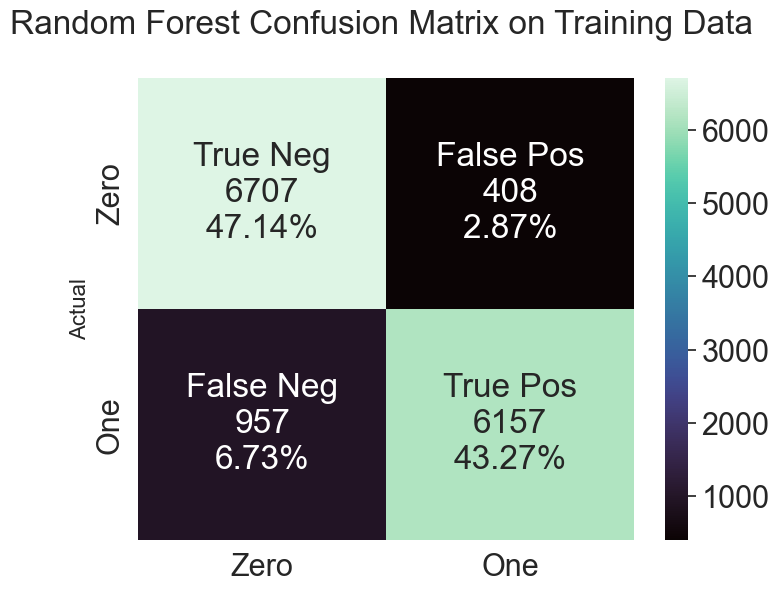

In [ ]:
## For Documentation
#@title ● Visualizing Random Forest/Trainig Data (mako map).
##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-train-forest-DOCU.png", bbox_inches='tight', pad_inches=0)




## **7.5.CNN Model**

In [ ]:
#@title ● importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import time
from datetime import datetime

from keras.callbacks import TensorBoard


In [ ]:
#@title ● Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_test:", X_test_reshape.shape)



3 dim array as expected by cnn model
X_train: (14229, 15, 1)
X_test: (6099, 15, 1)


### **7.5.1.Evaluating CNN Model Traditionally (No KFold or Cross Validation)**

In [ ]:
#@title ● CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
 
    
tf.random.set_random_seed(2)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.4, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])
print('\n','_'*50,'Summary:','\n')
proposed.summary()



 __________________________________________________ Summary: 

Model: "Proposed_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 13, 20)            80        
                                                                 
 batch_normalization_3 (Batc  (None, 13, 20)           80        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 13, 20)            0         
                                                                 
 CONV_1 (Conv1D)             (None, 13, 20)            1220      
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 6, 20)             0         
                                                                 
 CONV_2 (Conv1D)             (None, 6, 40)            

In [ ]:
# Extracting the features & storing them in a list
#@title ● CNN Model Training and Metrics

# starting time
start_time = time.time()
print('\n')
print('Starting CNN Model training.... \n')

##===================================##

## Train the Model

history = proposed.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)




# Score metrics from the model
print('')
score = proposed.evaluate(X_test_reshape, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))

##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: CNN Model Training:  {elapsed}")


print('\n\n\n\n')
print("***Completed")




Starting CNN Model training.... 

Train on 14229 samples, validate on 6099 samples
Epoch 1/80


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


14229/14229 - 2s - loss: 0.8845 - acc: 0.6613 - val_loss: 0.7989 - val_acc: 0.8444 - 2s/epoch - 144us/sample
Epoch 2/80
14229/14229 - 1s - loss: 0.6642 - acc: 0.8452 - val_loss: 0.6748 - val_acc: 0.8705 - 1s/epoch - 103us/sample
Epoch 3/80
14229/14229 - 1s - loss: 0.6006 - acc: 0.8644 - val_loss: 0.5599 - val_acc: 0.8852 - 1s/epoch - 102us/sample
Epoch 4/80
14229/14229 - 1s - loss: 0.5324 - acc: 0.8812 - val_loss: 0.4701 - val_acc: 0.9026 - 1s/epoch - 102us/sample
Epoch 5/80
14229/14229 - 1s - loss: 0.4919 - acc: 0.8906 - val_loss: 0.4251 - val_acc: 0.9192 - 1s/epoch - 103us/sample
Epoch 6/80
14229/14229 - 1s - loss: 0.4536 - acc: 0.8971 - val_loss: 0.4013 - val_acc: 0.9249 - 1s/epoch - 105us/sample
Epoch 7/80
14229/14229 - 1s - loss: 0.4377 - acc: 0.8994 - val_loss: 0.3866 - val_acc: 0.9197 - 1s/epoch - 104us/sample
Epoch 8/80
14229/14229 - 1s - loss: 0.4132 - acc: 0.9025 - val_loss: 0.3716 - val_acc: 0.9233 - 1s/epoch - 102us/sample
Epoch 9/80
14229/14229 - 1s - loss: 0.3995 - acc: 0

Epoch 69/80
14229/14229 - 1s - loss: 0.2063 - acc: 0.9334 - val_loss: 0.1948 - val_acc: 0.9387 - 1s/epoch - 102us/sample
Epoch 70/80
14229/14229 - 1s - loss: 0.2046 - acc: 0.9339 - val_loss: 0.1941 - val_acc: 0.9382 - 1s/epoch - 101us/sample
Epoch 71/80
14229/14229 - 1s - loss: 0.2052 - acc: 0.9307 - val_loss: 0.1919 - val_acc: 0.9379 - 1s/epoch - 102us/sample
Epoch 72/80
14229/14229 - 1s - loss: 0.2033 - acc: 0.9329 - val_loss: 0.1919 - val_acc: 0.9392 - 1s/epoch - 103us/sample
Epoch 73/80
14229/14229 - 1s - loss: 0.2030 - acc: 0.9341 - val_loss: 0.1936 - val_acc: 0.9367 - 1s/epoch - 101us/sample
Epoch 74/80
14229/14229 - 1s - loss: 0.2009 - acc: 0.9321 - val_loss: 0.1911 - val_acc: 0.9397 - 1s/epoch - 104us/sample
Epoch 75/80
14229/14229 - 1s - loss: 0.2011 - acc: 0.9332 - val_loss: 0.1888 - val_acc: 0.9410 - 1s/epoch - 101us/sample
Epoch 76/80
14229/14229 - 1s - loss: 0.2004 - acc: 0.9339 - val_loss: 0.1907 - val_acc: 0.9384 - 1s/epoch - 101us/sample
Epoch 77/80
14229/14229 - 1s - l

In [ ]:

#@title ● Evaluate Model Scores: CNN Accuracy

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_reshape, y_test)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 94.12%
CNN: Accuracy on TEST Data: 93.85%


In [ ]:

#@title ● storing the results.
#The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)


In [ ]:
history.history

{'loss': [0.8844701194764859,
  0.6642439086067424,
  0.6005941092888397,
  0.5323628589193604,
  0.4918880305393103,
  0.45358700613268765,
  0.4377417300655465,
  0.41319861515683093,
  0.39947721730951463,
  0.3903644910133667,
  0.3825320431182285,
  0.3660600846181039,
  0.36094043306418333,
  0.35021947787050806,
  0.3437910954253857,
  0.33852596030029863,
  0.3330598705177172,
  0.32450933883778116,
  0.32296271091230855,
  0.31634191989320604,
  0.3115552634145297,
  0.3061912704191872,
  0.3014850016031172,
  0.29668457310452245,
  0.2890674324341103,
  0.28890071677863366,
  0.2820722195376448,
  0.2790329302552797,
  0.2746771449859751,
  0.2748640152782891,
  0.2711460175509362,
  0.2621660339446084,
  0.26535447526526,
  0.2593891169276054,
  0.2573961924497891,
  0.2555818283425521,
  0.25136708354521003,
  0.24917157868473047,
  0.24573292514161757,
  0.24305733031956459,
  0.2425857161099933,
  0.24091575109947758,
  0.2383023757770028,
  0.23688979679898609,
  0.23364

dict_keys(['loss', 'acc', 'val_loss', 'val_acc']) 



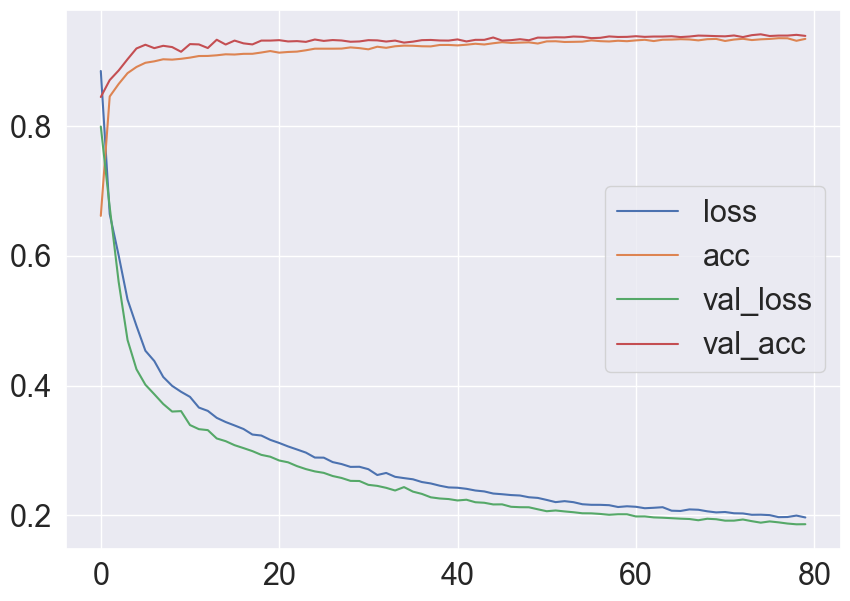

In [ ]:
#@title ● Plotting CNN Model Accuracy
print(history.history.keys(),'\n')
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

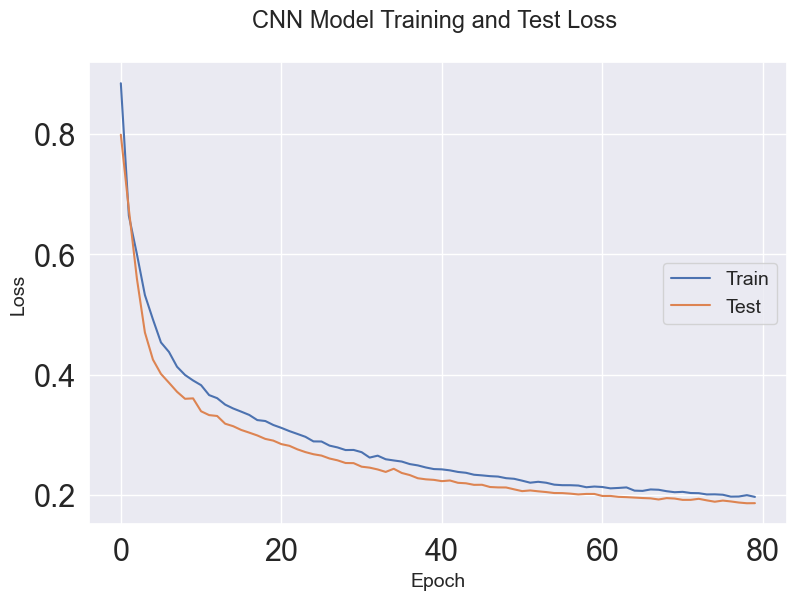

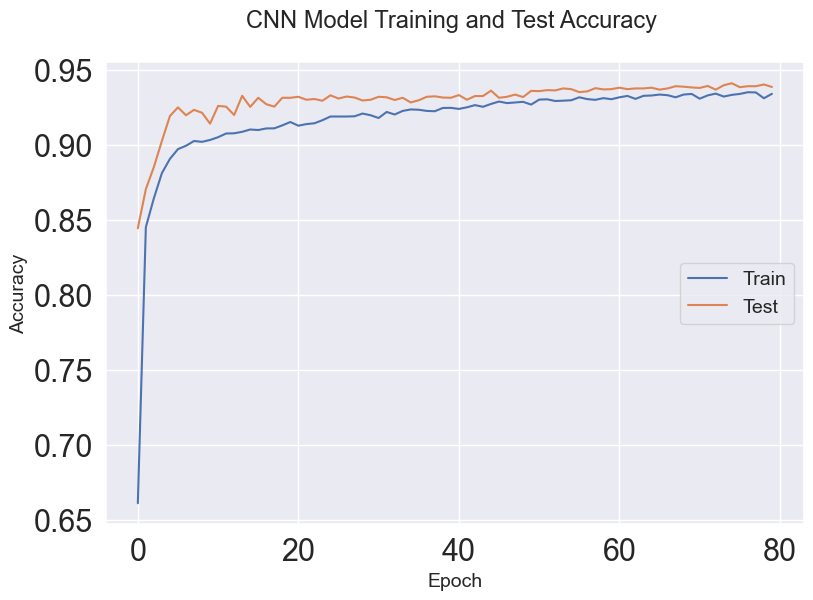

In [ ]:
## As shown in document

#@title ● Plotting Loss & Accuracy of CNN Model
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test Loss \n', fontsize=17)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='center right', fontsize=14)
#plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/val-loss.png')
plt.show()

print('\n')

## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='center right', fontsize=14)
#plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/test-acc-docu.png')
plt.show()


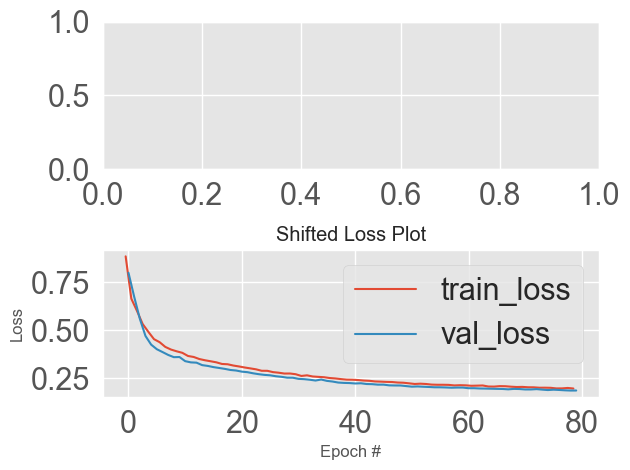

In [ ]:
#@title ● Loss Plot for Training & Validation Data"
#determine the total number of epochs used for training, then
# initialize the figure
epochs = np.arange(0, len(history.history["loss"]))
plt.style.use("ggplot")
(fig, axs) = plt.subplots(2, 1)

# plot the *shifted* training and validation loss
axs[1].plot(epochs - 0.5, history.history["loss"], label="train_loss")
axs[1].plot(epochs, history.history["val_loss"], label="val_loss")
axs[1].set_title("Shifted Loss Plot")
axs[1].set_xlabel("Epoch #")
axs[1].set_ylabel("Loss")
axs[1].legend()
# show the plots
plt.tight_layout()
plt.show()

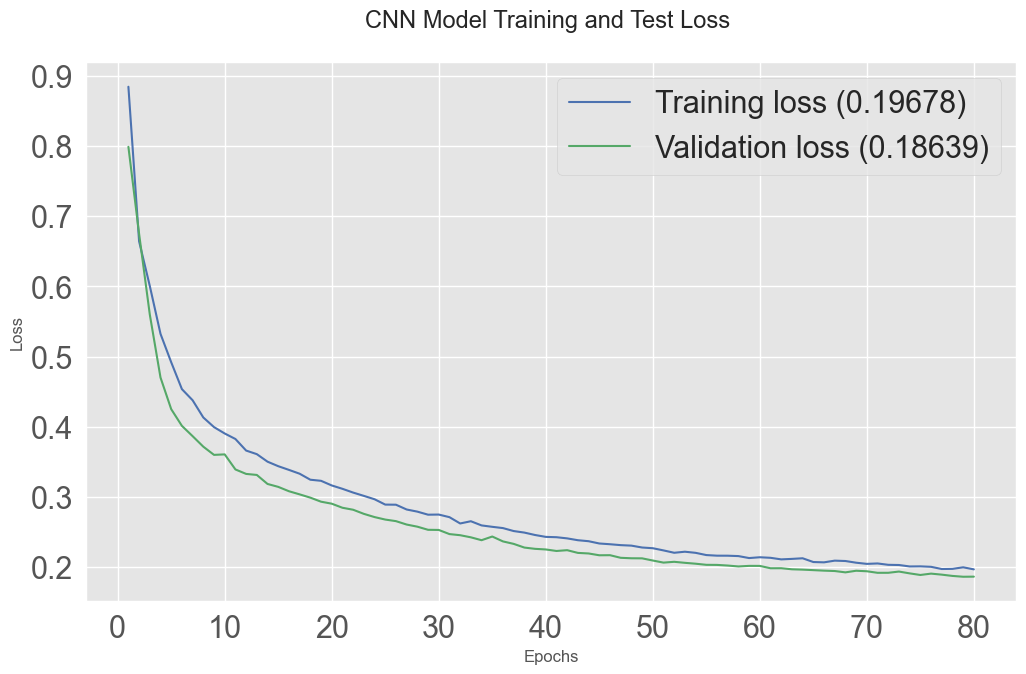

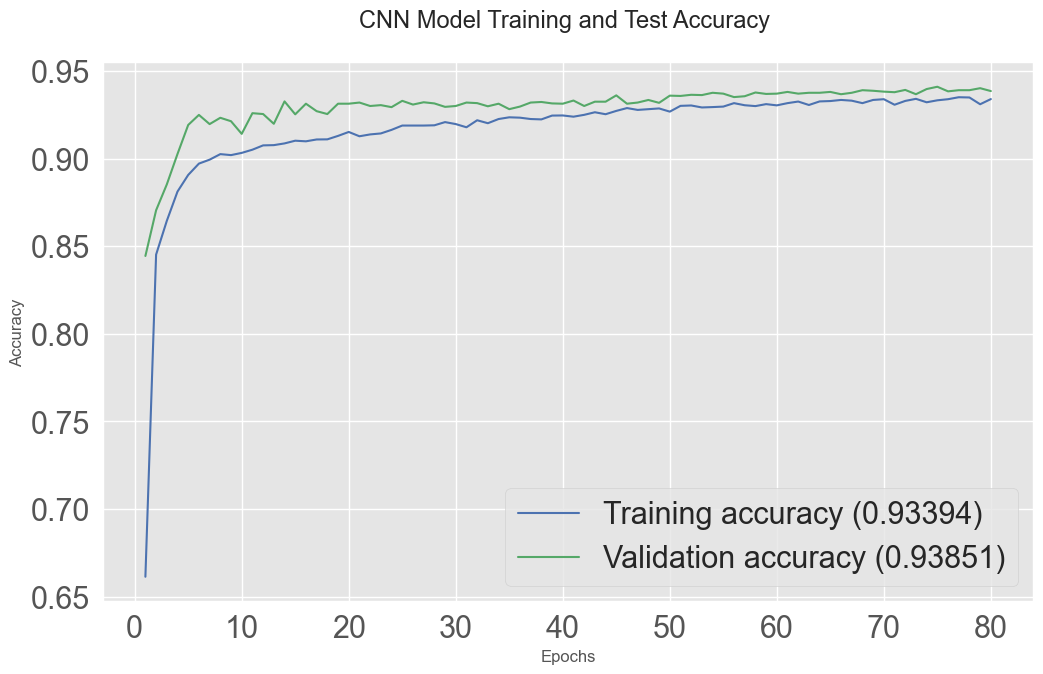

In [ ]:
## For Documentation
#@title ● Visualizing the Training and Validation Loss and Accuracy of a CNN Model.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Test Loss \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('/Datasets/Dataset3/Graph-Visuals/train-loss-DOCU.png')

    
    print('\n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.savefig('/Datasets/Dataset3/Graph-Visuals/train-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

In [ ]:
#@title ● Save Model h5

tf.keras.models.save_model(proposed, '/Datasets/Dataset3/Proposed-Final-CNN.h5')


In [ ]:
#@title ● Saved model to disk
from keras.models import model_from_json

#@title ● serialize model to JSON
model_json = proposed.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
proposed.save_weights("proposed.h5")


### **7.5.2.CNN Report on Test Data**

In [ ]:
#@title ● Evaluating the Test Set Performance of the CNN Model
##To get predictions from the model for the test set, we call model.predict().


X_test = np.array(X_test_reshape)

predictions = proposed.predict(X_test_reshape, batch_size=10, verbose=0)  

# Predicting results for test dataset
pred_cnn = proposed.predict(X_test_reshape)

# Predicting results for tain dataset
train_cnn = proposed.predict(X_train_reshape)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row
predictions

c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[5.7901740e-08, 1.0000000e+00],
       [9.9974459e-01, 2.5543349e-04],
       [9.9999416e-01, 5.7876732e-06],
       ...,
       [9.0262397e-08, 9.9999988e-01],
       [9.9999654e-01, 3.4440948e-06],
       [1.2243486e-07, 9.9999988e-01]], dtype=float32)

In [ ]:
#@title ● Get the position of the highest value in  predictions.
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
#@title ● Get the position of the highest value in  train_cnn & pred_cnn.

train_cnn = np.argmax(np.round(train_cnn),axis=1)

pred_cnn = np.argmax(np.round(pred_cnn),axis=1)


pred_cnn, train_cnn

(array([1, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 0, 1, ..., 0, 0, 1], dtype=int64))

In [ ]:
#@title ● shapes of train_cnn& pred_cnn  
pred_cnn.shape, train_cnn.shape


((6099,), (14229,))

In [ ]:
#@title ● summarize the first 5 cases

for i in range(5):
    print('%s => %d (expected %d)' % (X_test_reshape[i].tolist(), predictions[i], y_test[i]))

[[0.0], [-0.14800211183536424], [-0.8588217483606949], [-1.3529062918199035], [-0.08745389388932522], [0.0], [-0.327589949628001], [2.589984041413749], [-0.19241502165441335], [0.5395189192109512], [-1.6305769462618553], [0.3519160098258165], [-0.5874949463342097], [-0.3064155243859807], [1.1741532726706378]] => 1 (expected 1)
[[0.0], [-0.14800211183536424], [-0.8588217483606949], [0.2740343194688313], [-0.08745389388932522], [0.0], [-0.327589949628001], [-0.38610276511748215], [-0.19241502165441335], [-1.8535031198952283], [0.6132798591888158], [0.3519160098258165], [-0.5874949463342097], [-0.3064155243859807], [-0.8516775648254828]] => 0 (expected 0)
[[0.0], [-0.14800211183536424], [-0.8588217483606949], [-0.8105927547236585], [-0.08745389388932522], [0.0], [3.052596702479922], [-0.38610276511748215], [-0.19241502165441335], [0.5395189192109512], [0.6132798591888158], [0.3519160098258165], [-0.5874949463342097], [-0.9315330683290297], [1.1741532726706378]] => 0 (expected 0)
[[0.0], [

In [ ]:
#@title ● y_pred and y_test compare

print('Predictions: ', predictions[:10])

print( 'Actual:      ', y_test[:10])

Predictions:  [1 0 0 1 0 1 0 0 0 1]
Actual:       [1 0 0 1 0 1 0 1 0 1]


In [ ]:
## Classification Report - complete
# Predict the values from the test set

#@title ● Performance Evaluation of CNN on Test Data
print('')

print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)


CNN: Accuracy on TEST Data: 93.85%

CNN Confusion Matrix:
[[2866  183]
 [ 192 2858]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3049
           1       0.94      0.94      0.94      3050

    accuracy                           0.94      6099
   macro avg       0.94      0.94      0.94      6099
weighted avg       0.94      0.94      0.94      6099


Score Results: Loss, Accuracy [0.18639469596524183, 0.93851453]


In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ● Performance Evaluation of CNN on Testing Data

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, pred_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))


Accuracy: 0.94%
Precision: 0.94%
Recall: 0.94%
F1 score: 0.94%


F1 score: 93.84%
Recall: 93.70%
Precision: 93.98%
Accuracy: 93.85%


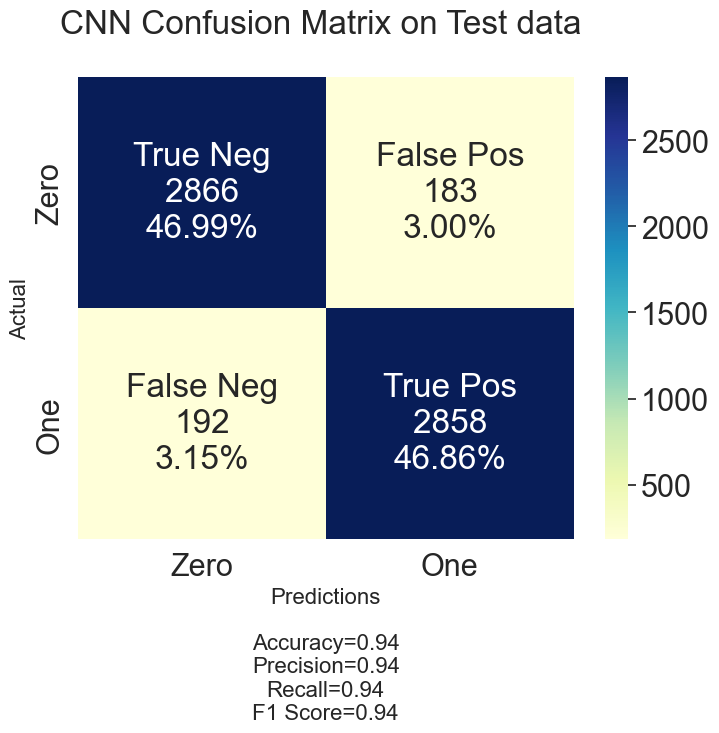

In [ ]:
#@title ● Visualizing CNN model/Test Data (YlGnBu map) .
##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6), 
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Test data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)


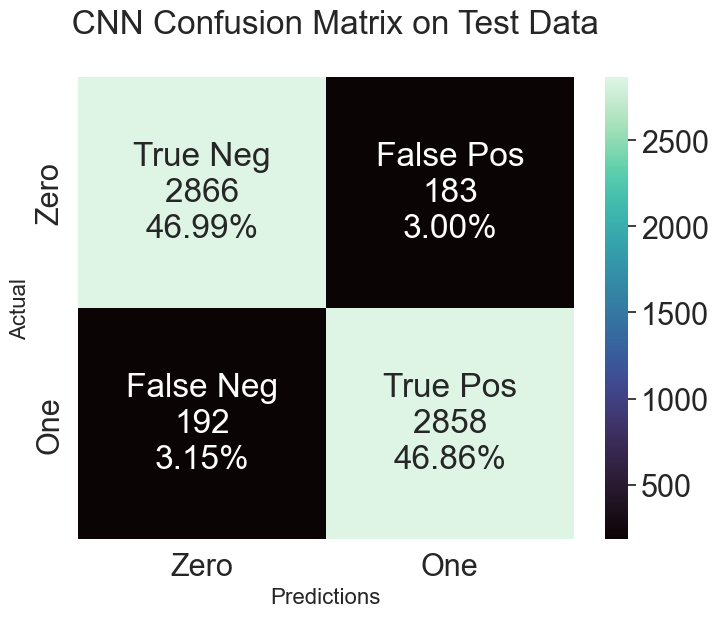

In [ ]:
## For Documentation
#@title ● Visualizing CNN model/Test Data (mako map).
##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako', figsize=(8,6))

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-cnn-test-DOCU.png", bbox_inches='tight', pad_inches=0)


<AxesSubplot: >

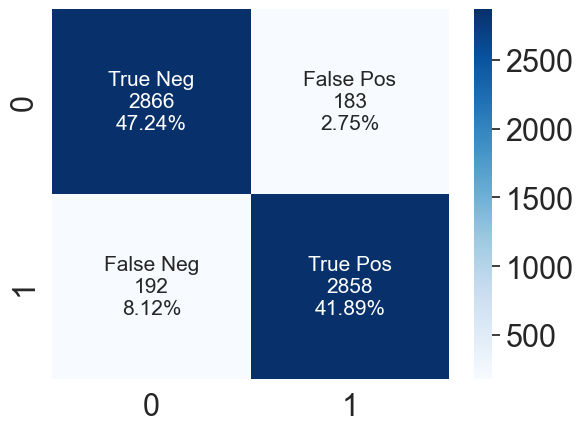

In [ ]:
#@title ● Confusion Matrix Plot of CNN Model Performance.
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnn_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tree_matrix_test.flatten()/np.sum(cnn_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnn_matrix_test, annot=labels, fmt='', cmap='Blues', annot_kws={'size': 15})


### **7.5.3.CNN Report on Training Data**

In [ ]:
## Classification Report - complete
#@title ● Evaluation of CNN on Training Data

print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, train_cnn, verbose=1)
print('Score Results: Loss, Accuracy',score)


Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 94.12%

CNN Confusion Matrix:
[[6687  428]
 [ 408 6706]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7115
           1       0.94      0.94      0.94      7114

    accuracy                           0.94     14229
   macro avg       0.94      0.94      0.94     14229
weighted avg       0.94      0.94      0.94     14229


Score Results: Loss, Accuracy [0.1385025963605066, 1.0]


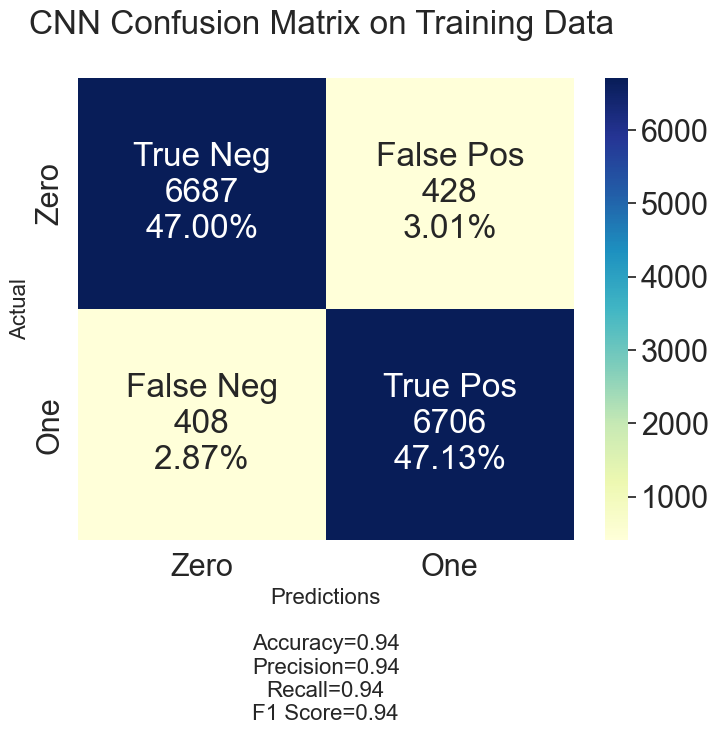

In [ ]:
#@title ● Visualizing CNN model/Training Data (YlGnBu map).
##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_train, 
                      group_names=labels,
                      categories=categories)


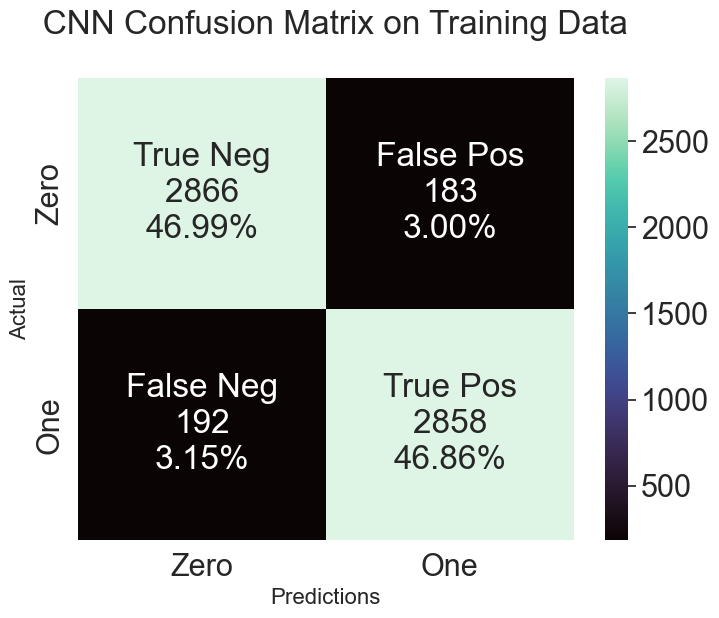

In [ ]:
## For Documentation
#@title ● Visualizing CNN model/Training Data (mako map).
##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-cnn-train-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ● Performance Evaluation of CNN on Training Data

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, train_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, train_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, train_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, train_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))


Accuracy: 0.94%
Precision: 0.94%
Recall: 0.94%
F1 score: 0.94%


F1 score: 94.13%
Recall: 94.26%
Precision: 94.00%
Accuracy: 94.12%


#### <font color=green> Predicted vs Actual Results </font>

In [ ]:
#@title ● Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

##*7.6.Comparison of Models**

In [ ]:
acc_train, acc_test

(['88.85%', '90.41%', '94.12%'], ['89.13%', '90.77%', '93.85%'])

In [ ]:
#@title ● Results
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


In [ ]:
#@title ● Sorting the dataframe based on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model Train Accuracy Test Accuracy
3            CNN         94.12%        93.85%
2  Random Forest         90.41%        90.77%
1  Decision Tree         88.85%        89.13%

### Complete - End - Model Training

# <font color=blue>**8.Validation Revised CNN Model**</font>

## Model built with Training & Validation dataset



## 12000 data; 50% phishing - 50% benign

#### Result: 
- batch_size=128, epochs=80
- CNN: Accuracy on training Data: 93.64%
- CNN: Accuracy on TEST Data: 93.42%
- CNN: Accuracy on validation Data: 92.50%

#### Validation Process


In [ ]:
#@title ● import packages

from numpy.random import seed
seed(1)

import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

import tensorflow as tf
tf.random.set_seed(2)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
 
print(tf.__version__)

import datetime


2.10.0


### **8.1.Exploratory Data Analysis (EDA)**


In [ ]:
#@title ● Reading finaldata updated
val_data = pd.read_csv("https://raw.githubusercontent.com/nooot77/CNN-colab/main/Datasets/Dataset1/Creating-data/finaldata_updated.csv")
val_data

domain  ip_present  at_present  \
0                                   graphicriver.net           0           0   
1                                          ecnavi.jp           0           0   
2                                       hubpages.com           0           0   
3                                    extratorrent.cc           0           0   
4                                      icicibank.com           0           0   
...                                              ...         ...         ...   
11995                                  polska-olx.pl           0           0   
11996  fb-updates-1000151020200412545154000588-mc.tk           0           0   
11997                        whattsapps.misecure.com           0           0   
11998                                     nfta.co.za           0           0   
11999                      site9423773.92.webydo.com           0           0   

       url_length  url_depth  redirection  https_domain  short_url  \
0               1          1            0             0          0   
1               1          1            1             0          0   
2               1          1            0             0          0   
3               1          3            0             0          0   
4               1          3            0             0          0   
...           ...        ...          ...           ...        ...   
11995           0          2            0             0          0   
11996           1          1            0             0          0   
11997           0          0            0             0          0   
11998           1          2            0             0          0   
11999           0          0            0             0          0   

       prefix/suffix  dns_record  web_traffic  domain_age  domain_end  \
0                  0           0            1           0           1   
1                  0           0            1           1           1   
2                  0           0            1           0           1   
3                  0           0            0           0           1   
4                  0           0            1           0           1   
...              ...         ...          ...         ...         ...   
11995              1           0            1           1           1   
11996              1           0            1           1           1   
11997              0           0            0           0           1   
11998              0           0            1           1           1   
11999              0           0            0           1           1   

       dot_count  specialchar_count  subdom_count  label  
0              0                 29             0      0  
1              1                 21             0      0  
2              0                  8             0      0  
3              1                  6             0      0  
4              0                  8             0      0  
...          ...                ...           ...    ...  
11995          0                  6             0      1  
11996          0                  4             0      1  
11997          0                  4             1      1  
11998          1                  5             1      1  
11999          1                  4             1      1  

[12000 rows x 17 columns]

In [ ]:
#@title ● Look for missing values
val_data.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               0
ip_present           0
at_present           0
url_length           0
url_depth            0
redirection          0
https_domain         0
short_url            0
prefix/suffix        0
dns_record           0
web_traffic          0
domain_age           0
domain_end           0
dot_count            0
specialchar_count    0
subdom_count         0
label                0
dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

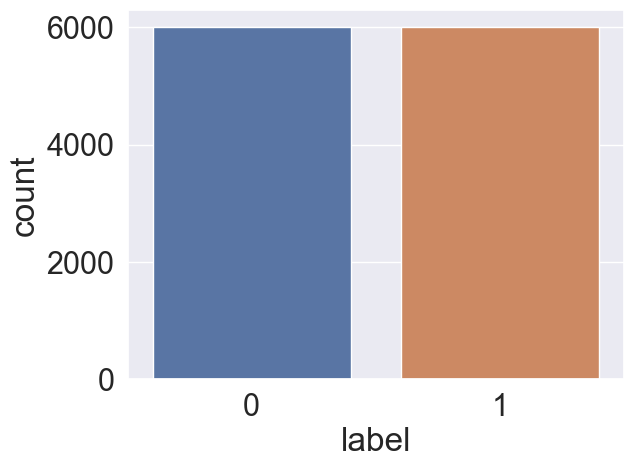

In [ ]:
#@title ● Count class label

val_data['label'].value_counts()

# 0 Legitimate
# 1 Phishing
sns.countplot(x= 'label' , data = val_data)

In [ ]:
#@title ● columns names
val_data.columns

Index(['domain', 'ip_present', 'at_present', 'url_length', 'url_depth',
       'redirection', 'https_domain', 'short_url', 'prefix/suffix',
       'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count',
       'specialchar_count', 'subdom_count', 'label'],
      dtype='object')

In [ ]:
#@title ● descriptive statistics for data
val_data.describe()

ip_present    at_present    url_length     url_depth   redirection  \
count     12000.0  12000.000000  12000.000000  12000.000000  12000.000000   
mean          0.0      0.024333      0.731083      2.657000      0.012667   
std           0.0      0.154088      0.443415      2.126004      0.111836   
min           0.0      0.000000      0.000000      0.000000      0.000000   
25%           0.0      0.000000      0.000000      1.000000      0.000000   
50%           0.0      0.000000      1.000000      2.000000      0.000000   
75%           0.0      0.000000      1.000000      4.000000      0.000000   
max           0.0      1.000000      1.000000     20.000000      1.000000   

       https_domain     short_url  prefix/suffix    dns_record   web_traffic  \
count       12000.0  12000.000000   12000.000000  12000.000000  12000.000000   
mean            0.0      0.095833       0.155917      0.053333      0.825833   
std             0.0      0.294375       0.362791      0.224707      0.379269   
min             0.0      0.000000       0.000000      0.000000      0.000000   
25%             0.0      0.000000       0.000000      0.000000      1.000000   
50%             0.0      0.000000       0.000000      0.000000      1.000000   
75%             0.0      0.000000       0.000000      0.000000      1.000000   
max             0.0      1.000000       1.000000      1.000000      1.000000   

         domain_age    domain_end     dot_count  specialchar_count  \
count  12000.000000  12000.000000  12000.000000        12000.00000   
mean       0.512917      0.824583      0.239083            7.95650   
std        0.499854      0.380339      0.426542            5.19601   
min        0.000000      0.000000      0.000000            3.00000   
25%        0.000000      1.000000      0.000000            5.00000   
50%        1.000000      1.000000      0.000000            7.00000   
75%        1.000000      1.000000      0.000000            9.00000   
max        1.000000      1.000000      1.000000          169.00000   

       subdom_count         label  
count  12000.000000  12000.000000  
mean       0.287917      0.500000  
std        0.452811      0.500021  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.500000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [ ]:
#@title ● displaying information
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   domain             12000 non-null  object
 1   ip_present         12000 non-null  int64 
 2   at_present         12000 non-null  int64 
 3   url_length         12000 non-null  int64 
 4   url_depth          12000 non-null  int64 
 5   redirection        12000 non-null  int64 
 6   https_domain       12000 non-null  int64 
 7   short_url          12000 non-null  int64 
 8   prefix/suffix      12000 non-null  int64 
 9   dns_record         12000 non-null  int64 
 10  web_traffic        12000 non-null  int64 
 11  domain_age         12000 non-null  int64 
 12  domain_end         12000 non-null  int64 
 13  dot_count          12000 non-null  int64 
 14  specialchar_count  12000 non-null  int64 
 15  subdom_count       12000 non-null  int64 
 16  label              12000 non-null  int64

In [ ]:
#@title ● Shuffle dataset
# shuffle dataset **once**, but reliably so that each run yields the same results

data = shuffle(val_data, random_state=42)

data

domain  ip_present  at_present  url_length  \
1935               extratorrent.cc           0           0           1   
6494                  78.143.96.35           0           0           1   
1720                 superuser.com           0           0           1   
9120                    heylink.me           0           0           0   
360                  torrentdn.com           0           0           1   
...                            ...         ...         ...         ...   
11964  vmi330298.contaboserver.net           0           0           0   
5191                 censor.net.ua           0           0           1   
5390                       udn.com           0           0           1   
860               seekingalpha.com           0           0           1   
7270                    adnet8.com           0           0           1   

       url_depth  redirection  https_domain  short_url  prefix/suffix  \
1935           3            0             0          0              0   
6494           3            0             0          0              0   
1720           3            0             0          0              0   
9120           1            0             0          1              0   
360            2            0             0          0              0   
...          ...          ...           ...        ...            ...   
11964          3            0             0          0              0   
5191           3            0             0          0              0   
5390           4            0             0          0              0   
860            2            0             0          0              0   
7270           2            0             0          0              0   

       dns_record  web_traffic  domain_age  domain_end  dot_count  \
1935            0            0           0           1          0   
6494            0            1           0           1          1   
1720            0            1           1           1          0   
9120            0            1           0           1          0   
360             0            1           1           1          0   
...           ...          ...         ...         ...        ...   
11964           0            1           0           1          1   
5191            0            0           0           1          0   
5390            0            1           0           1          0   
860             0            1           0           1          0   
7270            0            1           1           1          1   

       specialchar_count  subdom_count  label  
1935                   6             0      0  
6494                  19             1      1  
1720                   6             0      0  
9120                   4             0      1  
360                   16             0      0  
...                  ...           ...    ...  
11964                  6             1      1  
5191                  17             1      0  
5390                   7             0      0  
860                    5             0      0  
7270                  14             0      1  

[12000 rows x 17 columns]

## **8.2.Train Test Val Split**


In [ ]:
#@title ● set feature_col & target_col
feature_col = ['ip_present', 'at_present', 'url_length', 'url_depth', 'redirection', 'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count', 'specialchar_count', 'subdom_count']
target_col = ['label']

#feature_col = data.iloc[:, 1:16]
#target_col = data.iloc[:, [16]]


In [ ]:
#@title ● Separating & assigning features and target columns to X & y

y = pd.DataFrame(data[target_col]) #y target
X = data[feature_col] #X feature


X.shape, y.shape

((12000, 15), (12000, 1))

In [ ]:
#@title ● Spliting the dataset into Training and Test Set


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=12)


X_train.shape, X_val.shape

#60% training
#40% validation



((7200, 15), (4800, 15))

In [ ]:
#@title ● Proportion of Legitimate and Phishing Websites in Original, Training, and Validation Datasets.

## Original dataset
y_legw = y.label.value_counts()[0]/(y.label.count())
y_phishw = y.label.value_counts()[1]/(y.label.count())

print("********************** Proportion on the give dataset before the split ********************** \n")
print("Percentage of Legitimate websites :", y_legw)
print("Percentage of Phishing websites   :", y_phishw, "\n")


## Training dataset
y_train_legw = y_train.label.value_counts()[0]/(y_train.label.count())
y_train_phishw = y_train.label.value_counts()[1]/(y_train.label.count())

print("********************** Proportion on the Training dataset **********************\n")
print("Percentage of Legitimate websites :", y_train_legw)
print("Percentage of Phishing websites   :", y_train_phishw, "\n")


## Validation dataset
y_val_legw = y_val.label.value_counts()[0]/(y_val.label.count())
y_val_phishw = y_val.label.value_counts()[1]/(y_val.label.count())

print("********************** Proportion on the Validation dataset **********************\n")
print("Percentage of Legitimate websites :", y_val_legw)
print("Percentage of Phishing websites   :", y_val_phishw, "\n")



********************** Proportion on the give dataset before the split ********************** 

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Training dataset **********************

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Validation dataset **********************

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 



In [ ]:
## 60-40 split

#@title ● Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12000 rows and 15 columns

Dimensions of the training dataset : 7200 rows and 15 columns

Dimensions of the validation dataset : 4800 rows and 15 columns



In [ ]:
#@title ● Converting target variables


y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_train, y_val

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 0], dtype=int64))

In [ ]:
#train_data - X_train
#test_data - X_test
#train_target - y_train
#test_target - y_test

#@title ● Normalize data using StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)  

print(X_train)
print('')
print(type(X_train))

[[ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.18188966
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 ...
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.18188966
  -0.6386704 ]]

<class 'numpy.ndarray'>


In [ ]:
#@title ● X_val & it's type

print(X_val)
print('')
print(type(X_val))


[[ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.36621135
  -0.6386704 ]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.55539708
   1.56575285]
 [ 0.         -0.15409478 -1.64603406 ...  1.78699763 -0.73485473
   1.56575285]
 ...
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
  -0.6386704 ]
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.73485473
  -0.6386704 ]]

<class 'numpy.ndarray'>


In [ ]:
#@title ● train & test shapes

print(X_train.shape)

print(X_val.shape)


(7200, 15)
(4800, 15)


## **8.3.Machine Learning Models & Training**


In [ ]:
#@title ● Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_val = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_val.append("{:.2f}%" .format (b, 2))

### **8.3.1. Decision Tree model**

In [ ]:
#@title ● Model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=9)

## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_val_tree = tree.predict(X_val)
y_train_tree = tree.predict(X_train)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_val_tree = (accuracy_score(y_val,y_val_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_val_tree))

      
#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set

#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 89.54%
Decision Tree: Accuracy on TEST Data: 89.17%


In [ ]:
#@title ● storing the results.
#The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_val_tree)

In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ● Performance Evaluation of Decision Tree on Test Data
print('')

print("Decision Tree: Accuracy on VAL Data: %.2f%%" % (acc_val_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_val, y_val_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_val, y_val_tree))




Decision Tree: Accuracy on VAL Data: 89.17%

Decision Tree Confusion Matrix:
[[2173  227]
 [ 293 2107]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2400
           1       0.90      0.88      0.89      2400

    accuracy                           0.89      4800
   macro avg       0.89      0.89      0.89      4800
weighted avg       0.89      0.89      0.89      4800



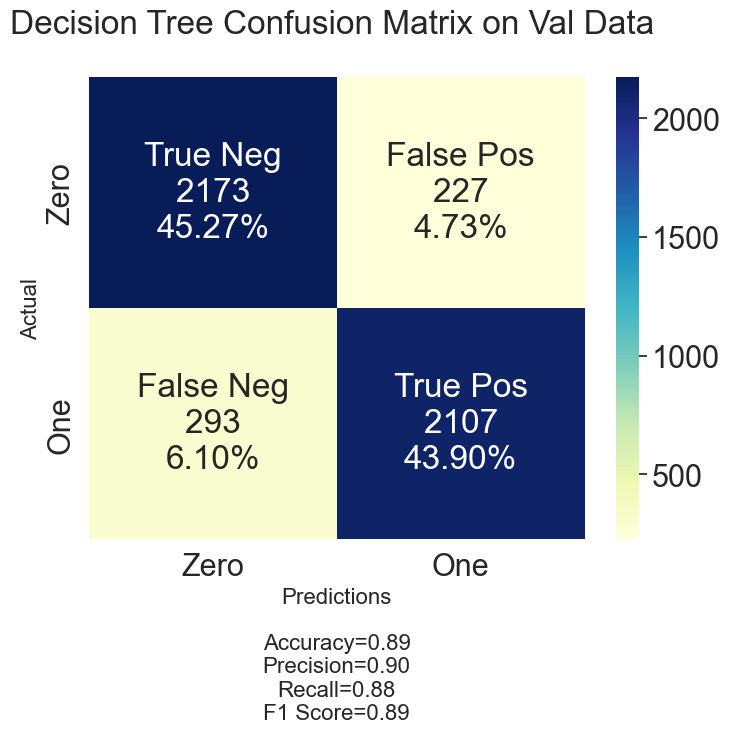

In [ ]:
# Decision Tree Test Data
tree_matrix_val = confusion_matrix(y_val, y_val_tree)
sns.set(font_scale=2)

#@title ● Visualizing Decision Tree/Val Data (YlGnBu map).

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6) ,
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Val Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_val, 
                      group_names=labels,
                      categories=categories)

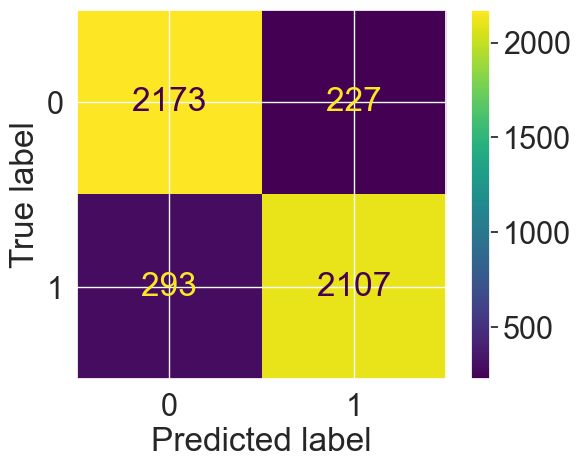

In [ ]:
#@title ● Evaluate machine learning model performance.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

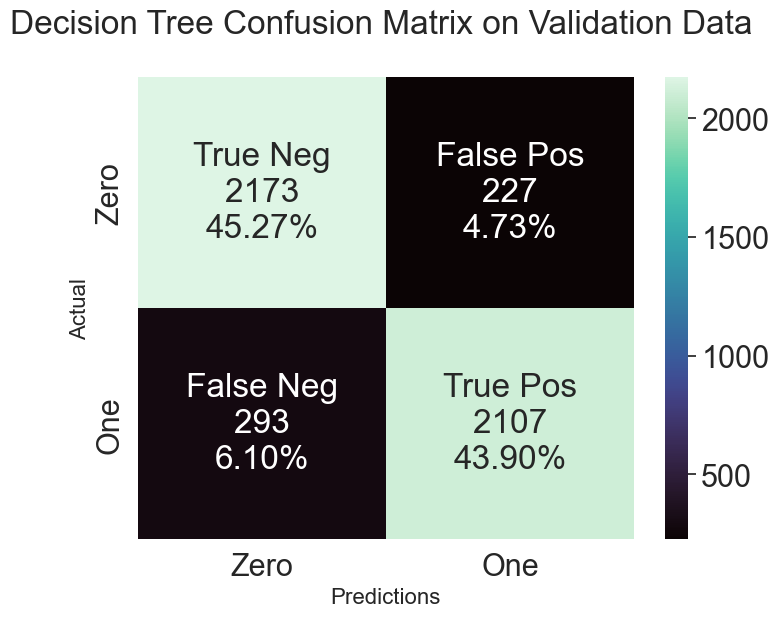

In [ ]:
## For Documentation
#@title ●Visualizing Decision Tree/Val Data (mako map)..

##Get the confusion matrix
tree_matrix_val = confusion_matrix(y_val, y_val_tree)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-tree-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
## Predict the values from the training set

#@title ● Performance Evaluation of Decision Tree on Training Data
print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))




Decision Tree: Accuracy on Training Data: 89.54%

Decision Tree Confusion Matrix:
[[3273  327]
 [ 426 3174]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3600
           1       0.91      0.88      0.89      3600

    accuracy                           0.90      7200
   macro avg       0.90      0.90      0.90      7200
weighted avg       0.90      0.90      0.90      7200



### **8.3.2.Random Forest**

In [ ]:
#@title ● Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(criterion='gini', max_depth=6, random_state=11)


## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_val_forest = forest.predict(X_val)
y_train_forest = forest.predict(X_train)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_val_forest = (accuracy_score(y_val,y_val_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on Val Data: %.2f%%" % (acc_val_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 90.31%
Random Forest: Accuracy on Val Data: 90.21%


In [ ]:
#@title ● storing the results. 
#The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_val_forest)

In [ ]:
## Classification Report - complete
## Predict the values from the val data

#@title ● Performance Evaluation of Random Forest on Val Data 
print('')

print("Random Forest: Accuracy on Val Data: %.2f%%" % (acc_val_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_val, y_val_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_val, y_val_forest))




Random Forest: Accuracy on Val Data: 90.21%

Random Forest Confusion Matrix:
[[2265  135]
 [ 335 2065]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2400
           1       0.94      0.86      0.90      2400

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800



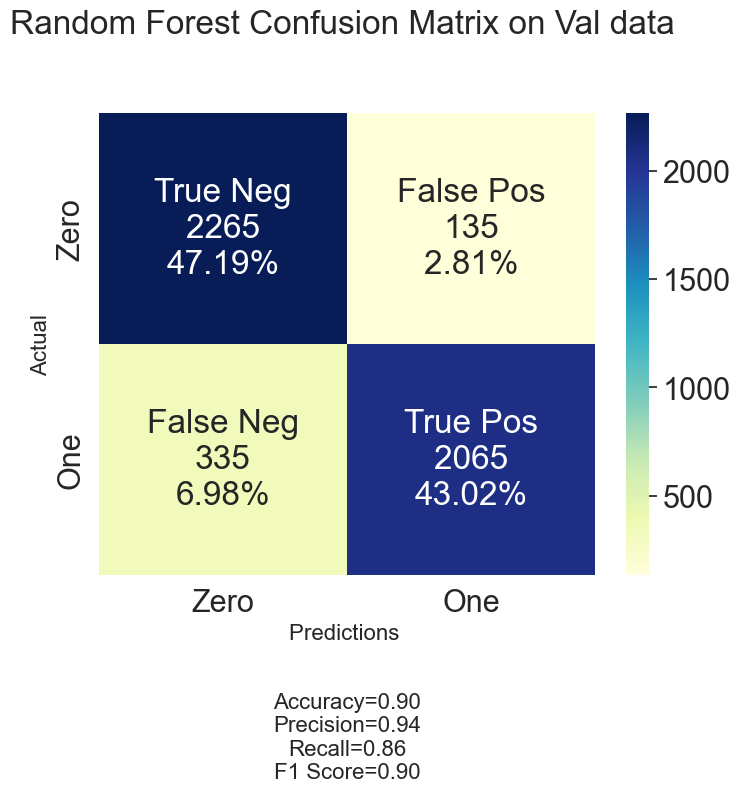

In [ ]:

##Get the confusion matrix
forest_matrix_val = confusion_matrix(y_val, y_val_forest)
sns.set(font_scale=2)

#@title ● Visualizing Random Forest/Val Data (YlGnBu map).
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Random Forest Confusion Matrix on Val data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions \n' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_val, 
                      group_names=labels,
                      categories=categories)


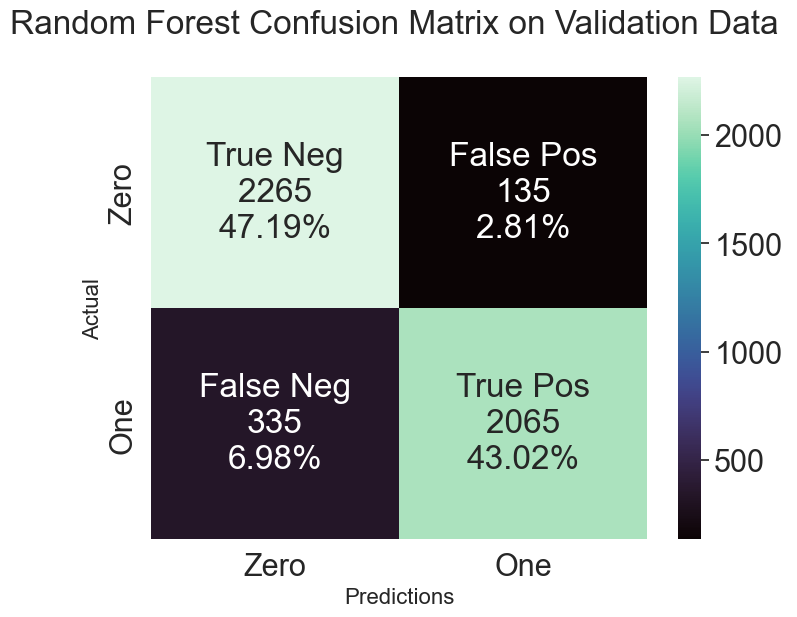

In [ ]:
## For Documentation
#@title ●  Visualizing Random Forest/Val Data (mako map).
##Get the confusion matrix
forest_matrix_val = confusion_matrix(y_val, y_val_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-forest-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
## Predict the values from the test set

#@title ● Performance Evaluation of Random Forest on Training Data
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))




Random Forest: Accuracy on Training Data: 90.31%

Random Forest Confusion Matrix:
[[3423  177]
 [ 521 3079]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3600
           1       0.95      0.86      0.90      3600

    accuracy                           0.90      7200
   macro avg       0.91      0.90      0.90      7200
weighted avg       0.91      0.90      0.90      7200





### **8.3.3.CNN Model**

In [ ]:
#@title ● Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_val_reshape = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_val:", X_val_reshape.shape)


3 dim array as expected by cnn model
X_train: (7200, 15, 1)
X_val: (4800, 15, 1)


In [ ]:
#@title ● CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
INPUT_DIM = X_train_reshape[0].shape
tf.random.set_random_seed(2)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.4, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])


In [ ]:
# Extracting the features & storing them in a list
#@title ● CNN Model Training and Metrics

# starting time
start_time = time.time()
print('\n')
print('Starting CNN Model training.... \n')

##===================================##

## Train the Model

history = proposed.fit(X_train_reshape, y_train, validation_data=(X_val_reshape, y_val),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)




# Score metrics from the model
print('')
score = proposed.evaluate(X_val_reshape, y_val, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Val loss: %.2f%%" % score[0])
print("Val accuracy: %.2f%%" % (score[1]*100))

##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: CNN Model Training:  {elapsed}")


print('\n\n\n\n')
print("***Completed")




Starting CNN Model training.... 

Train on 7200 samples, validate on 4800 samples
Epoch 1/80


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


7200/7200 - 1s - loss: 0.9670 - acc: 0.5794 - val_loss: 0.9632 - val_acc: 0.7694 - 1s/epoch - 191us/sample
Epoch 2/80
7200/7200 - 1s - loss: 0.7505 - acc: 0.8260 - val_loss: 0.7806 - val_acc: 0.8606 - 786ms/epoch - 109us/sample
Epoch 3/80
7200/7200 - 1s - loss: 0.6469 - acc: 0.8525 - val_loss: 0.6994 - val_acc: 0.8615 - 797ms/epoch - 111us/sample
Epoch 4/80
7200/7200 - 1s - loss: 0.6126 - acc: 0.8636 - val_loss: 0.6415 - val_acc: 0.8704 - 783ms/epoch - 109us/sample
Epoch 5/80
7200/7200 - 1s - loss: 0.5903 - acc: 0.8658 - val_loss: 0.5951 - val_acc: 0.8769 - 784ms/epoch - 109us/sample
Epoch 6/80
7200/7200 - 1s - loss: 0.5661 - acc: 0.8781 - val_loss: 0.5581 - val_acc: 0.8833 - 782ms/epoch - 109us/sample
Epoch 7/80
7200/7200 - 1s - loss: 0.5539 - acc: 0.8797 - val_loss: 0.5322 - val_acc: 0.8854 - 764ms/epoch - 106us/sample
Epoch 8/80
7200/7200 - 1s - loss: 0.5414 - acc: 0.8821 - val_loss: 0.5123 - val_acc: 0.8933 - 767ms/epoch - 106us/sample
Epoch 9/80
7200/7200 - 1s - loss: 0.5293 - acc

Epoch 69/80
7200/7200 - 1s - loss: 0.3169 - acc: 0.9100 - val_loss: 0.2977 - val_acc: 0.9240 - 784ms/epoch - 109us/sample
Epoch 70/80
7200/7200 - 1s - loss: 0.3095 - acc: 0.9117 - val_loss: 0.2940 - val_acc: 0.9179 - 752ms/epoch - 104us/sample
Epoch 71/80
7200/7200 - 1s - loss: 0.3103 - acc: 0.9114 - val_loss: 0.2940 - val_acc: 0.9194 - 768ms/epoch - 107us/sample
Epoch 72/80
7200/7200 - 1s - loss: 0.3084 - acc: 0.9135 - val_loss: 0.2946 - val_acc: 0.9210 - 766ms/epoch - 106us/sample
Epoch 73/80
7200/7200 - 1s - loss: 0.3056 - acc: 0.9132 - val_loss: 0.2916 - val_acc: 0.9185 - 799ms/epoch - 111us/sample
Epoch 74/80
7200/7200 - 1s - loss: 0.3054 - acc: 0.9124 - val_loss: 0.2886 - val_acc: 0.9183 - 768ms/epoch - 107us/sample
Epoch 75/80
7200/7200 - 1s - loss: 0.3049 - acc: 0.9126 - val_loss: 0.2862 - val_acc: 0.9215 - 783ms/epoch - 109us/sample
Epoch 76/80
7200/7200 - 1s - loss: 0.3054 - acc: 0.9122 - val_loss: 0.2853 - val_acc: 0.9204 - 829ms/epoch - 115us/sample
Epoch 77/80
7200/7200 - 

In [ ]:

#@title ● Evaluate model scores
acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)

acc_val_cnn = (proposed.evaluate(X_val_reshape, y_val)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 92.08%
CNN: Accuracy on validation Data: 92.00%


In [ ]:
#@title ● model summary

proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 13, 20)            80        
                                                                 
 batch_normalization_4 (Batc  (None, 13, 20)           80        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 13, 20)            0         
                                                                 
 CONV_1 (Conv1D)             (None, 13, 20)            1220      
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 6, 20)             0         
                                                                 
 CONV_2 (Conv1D)             (None, 6, 40)             2440      
                                                    

In [ ]:
#@title ● save plot model

from keras.utils import plot_model
import pydot

#plot_model(proposed,to_file='/Datasets/Dataset3/Graph-Visuals/Final-Proposed-CNN-val.png',show_shapes=True,show_layer_names=True)




<font color=green>Learning Curves to Diagnose CNN Model Performance </font>


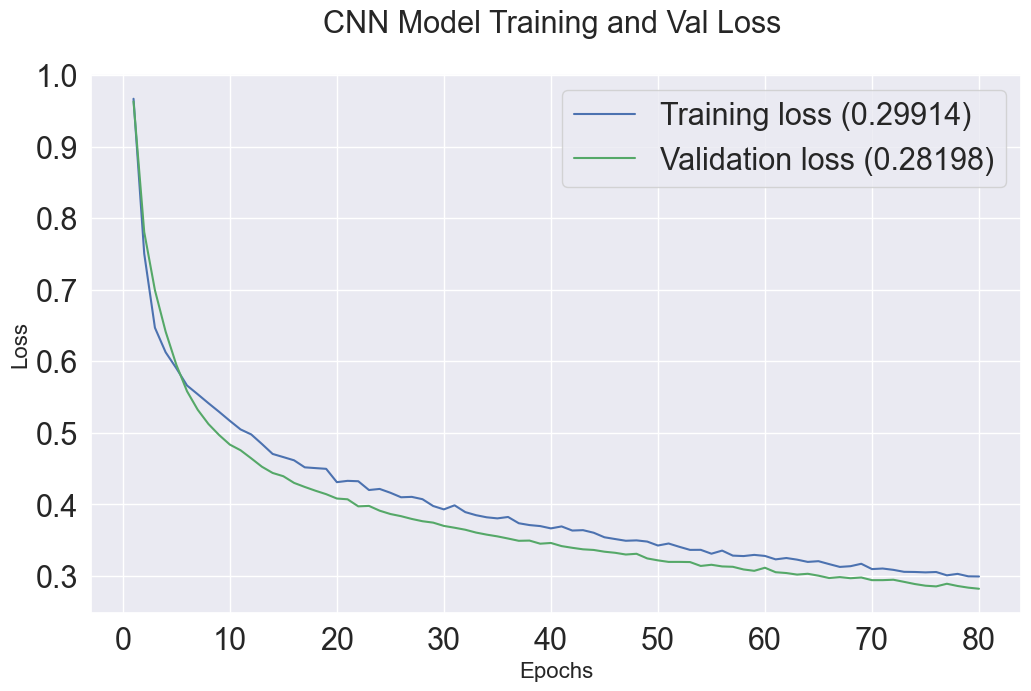

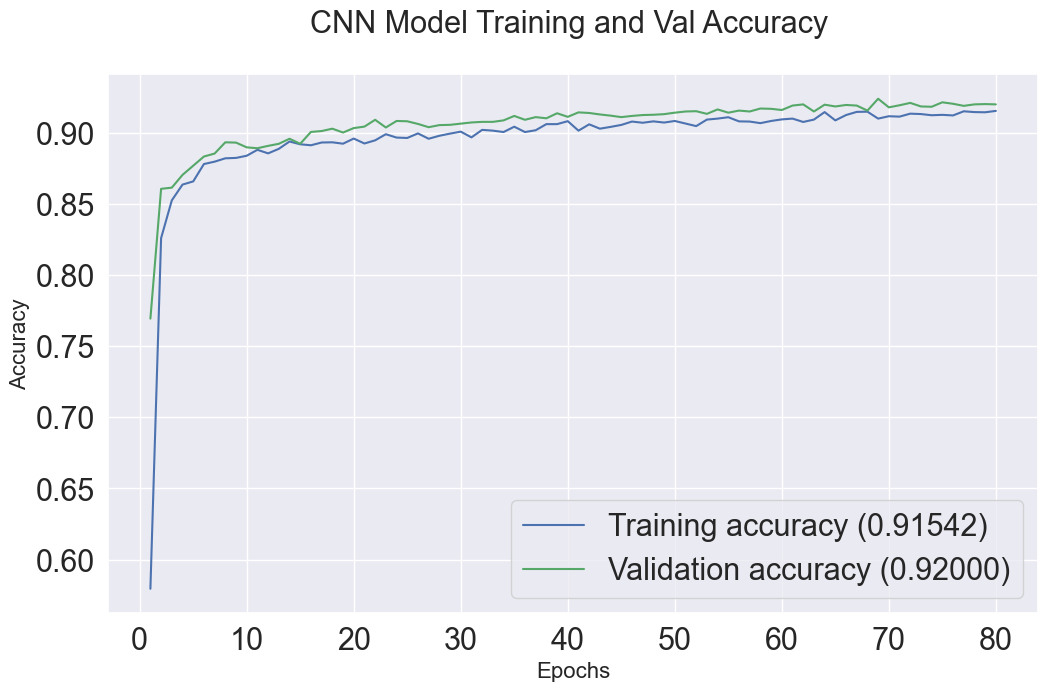

In [ ]:
## For Documentation
#@title ● Plots training and validation loss/accuracy.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Val Loss \n', fontsize=22)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend()
    #plt.savefig('/Datasets/Dataset3/Graph-Visuals/val-loss-DOCU.png')

    
    print('\n \n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Val Accuracy \n', fontsize=22)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.legend()
    #plt.savefig('/Datasets/Dataset3/Graph-Visuals/val-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

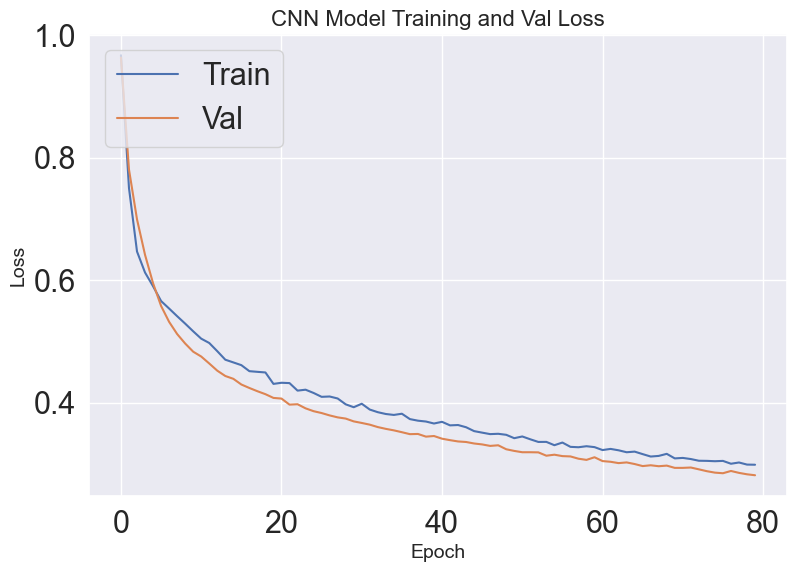

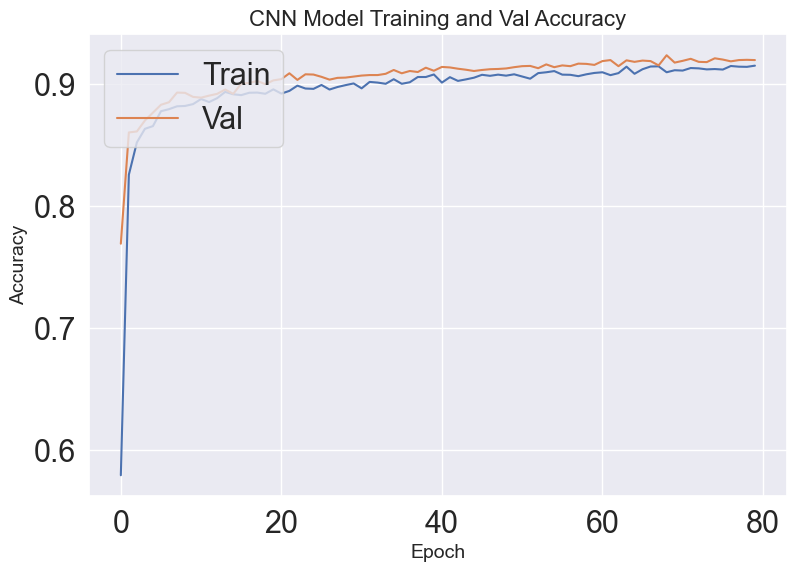

In [ ]:
## As shown in docu

#@title ● multi-figure loss/acc graph .
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Val Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Val Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


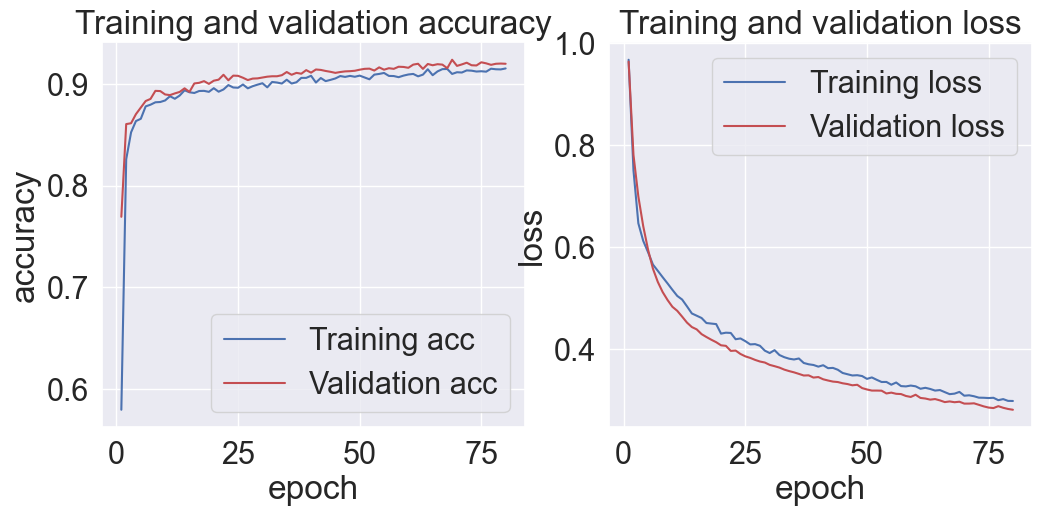

In [ ]:
#@title ● single-figure accuracy/loss graph.
def plot_history(history):
    # summarize history for accuracy
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    # summarize history for loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    # visualize accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    # visualize loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Training and validation loss')
    plt.legend()

# Show plot
plot_history(history)

In [ ]:

#@title ● storing the results
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN (80 epochs)', acc_train_cnn, acc_val_cnn)


### **8.3.4.Evaluate and Test CNN Model**

In [ ]:
#@title ● Test Results 
score = proposed.evaluate(X_val_reshape, y_val, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.2819797459741433
Test accuracy: 0.92


In [ ]:
#@title ● Predicting results for val dataset

## Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
## Solution, round off the output which will convert the float values into an integer
## use np.argmax() to select the index number which has a higher value in a row


pred_cnn = proposed.predict(X_val_reshape) #predict function using validation data
pred_cnn = np.argmax(np.round(pred_cnn), axis = 1)


pred_cnn_sample = pred_cnn[:10]  #first 10 predictions
label = y_val[:10] #gets the first 10 labels of the test data


print('predictions:', pred_cnn_sample)  #prints prediction
print('actual:     ', label) #prints actual label

c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


predictions: [0 1 1 0 1 1 0 0 0 0]
actual:      [0 1 1 0 1 1 0 0 0 0]


 The above output of both array is identical and it indicate that our model predicts correctly the first 10 values


In [ ]:
#@title ● Predict and Compare Results for X_val Data

#using pred_cnn = proposed.predict(X_test_reshape)

## The complete example below makes predictions for each example in the dataset, 
## then prints the input data, predicted class and expected class for the first 5 examples in the dataset.

# summarize the first 10 cases

m=0
for i in range(len(X_val_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_val[i]))

Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

In [ ]:
#@title ● shapes
pred_cnn.shape, y_train.shape


((4800,), (7200,))

### **8.3.5.CNN Confusion Matrix & Classification Report** 

### With confusion matrix, we'll be able to visually observe how well the model predicts on val data

In [ ]:
#@title ● CNN classification_report on val data

print(classification_report(y_val, pred_cnn))
print('')
score = proposed.evaluate(X_val_reshape, y_val, verbose=1)
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])


# Observation: Correctly predicted 2,242 data out of 2,400 data in validation set

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2400
           1       0.97      0.87      0.92      2400

    accuracy                           0.92      4800
   macro avg       0.92      0.92      0.92      4800
weighted avg       0.92      0.92      0.92      4800


Val Loss: 0.2819797459741433
Val Accuracy: 0.92


In [ ]:
## Classification Report - complete
#@title ● Predict the values from the test set

print('CNN Confusion Matrix on Val Dataset')
print(confusion_matrix(y_val, pred_cnn))

print('')
print('CNN Classification Report on Val Dataset: \n')
print(classification_report(y_val, pred_cnn))

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_val, pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_val, pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_val, pred_cnn)
print('F1 score: %.2f%%' % f1)




CNN Confusion Matrix on Val Dataset
[[2329   71]
 [ 313 2087]]

CNN Classification Report on Val Dataset: 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2400
           1       0.97      0.87      0.92      2400

    accuracy                           0.92      4800
   macro avg       0.92      0.92      0.92      4800
weighted avg       0.92      0.92      0.92      4800


Accuracy: 0.92%
Precision: 0.97%
Recall: 0.87%
F1 score: 0.92%


In [ ]:
#@title ● Evaluate model performance
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_val,pred_cnn)))

from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_val,pred_cnn)))

from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_val,pred_cnn)))


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))



Precision score: 0.9670991658943466
Recall score: 0.8695833333333334
F1 Score: 0.9157525230364195


F1 score: 91.58%
Recall: 86.96%
Precision: 96.71%
Accuracy: 92.00%


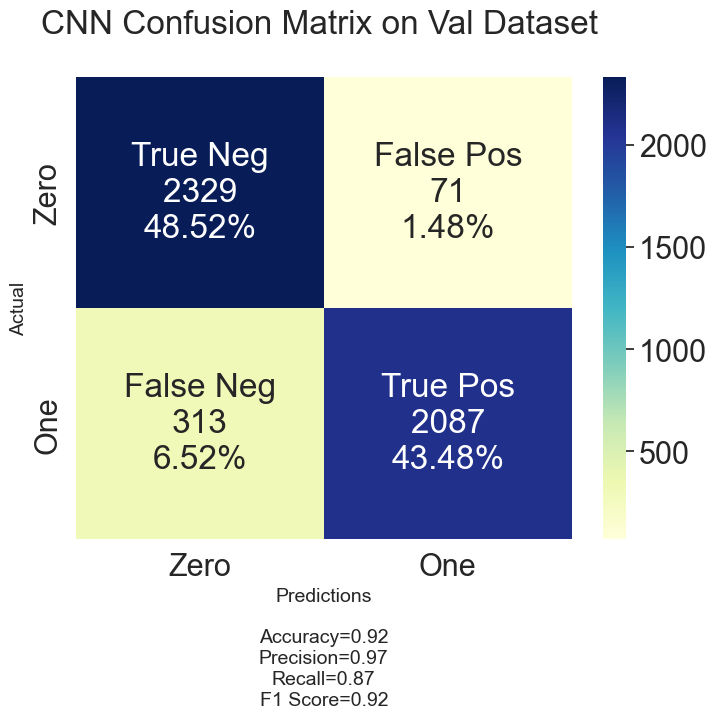

In [ ]:

#@title ●  Visualizing CNN/Val Data (YlGnBu map).
cnn_matrix_val = confusion_matrix(y_val, pred_cnn)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Val Dataset \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=14)
        plt.xlabel('Predictions' + stats_text,  fontsize=14)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
        

#visualize

labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_val, 
                      group_names=labels,
                      categories=categories)


### Confusion Matrix - summary of prediction results on a classification problem
### The number of correct and incorrect predictions summarized with count values and broken down by each class




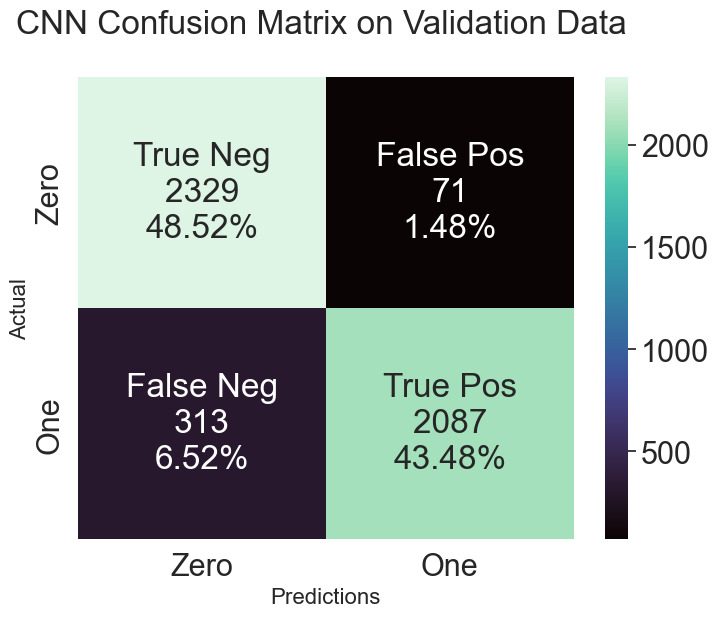

In [ ]:
## For Documentation
#@title ●  Visualizing CNN/Val Data (mako map).
##Get the confusion matrix
cnn_matrix_val = confusion_matrix(y_val, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='CNN Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Datasets/Dataset3/Graph-Visuals/cm-cnn-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
#@title ●  Evaluate the Model on the Training Data

train_cnn = proposed.predict(X_train_reshape) #predict function using validation data
train_cnn = np.argmax(np.round(train_cnn), axis = 1)


train_cnn_sample = train_cnn[:10]  #first 10 predictions
label = y_train[:10] #gets the first 10 labels of the test data

print('predictions:', pred_cnn_sample)  #prints prediction
print('actual:     ', label) #prints actual label

print('\n\n')
print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, y_train, verbose=0)
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

predictions: [0 1 1 0 1 1 0 0 0 0]
actual:      [0 0 0 1 0 1 1 0 1 1]



Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 92.08%

CNN Confusion Matrix:
[[3511   89]
 [ 481 3119]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3600
           1       0.97      0.87      0.92      3600

    accuracy                           0.92      7200
   macro avg       0.93      0.92      0.92      7200
weighted avg       0.93      0.92      0.92      7200


Train loss: 0.2799502517448531
Train accuracy: 0.92083335



### **8.3.6.Predicted vs Expected Results**

In [ ]:
#@title ● Predict on the first 5 test images.
predictions = proposed.predict(X_val_reshape[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(X_val_reshape[:5]) # [7, 2, 1, 0, 4]

[0 1 1 0 1]
[[[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 0.1659441 ]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.24285646]
  [ 0.46145206]
  [ 0.97124654]
  [ 0.46741875]
  [-0.55959783]
  [-0.36621135]
  [-0.6386704 ]]

 [[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 1.11457256]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.24285646]
  [ 0.46145206]
  [-1.0296047 ]
  [ 0.46741875]
  [-0.55959783]
  [ 0.55539708]
  [ 1.56575285]]

 [[ 0.        ]
  [-0.15409478]
  [-1.64603406]
  [-1.25699859]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.24285646]
  [ 0.46145206]
  [ 0.97124654]
  [ 0.46741875]
  [ 1.78699763]
  [-0.73485473]
  [ 1.56575285]]

 [[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 0.1659441 ]
  [-0.11624764]
  [ 0.        ]
  [ 3.03525385]
  [-0.42259788]
  [-0.24285646]
  [ 0.46145206]
  [ 0.97124654]
  [ 0.46741875]
  [-0.55959783]
  [-0.18188966]
  [-0.6386704 ]]

 [[ 0.        ]
  [-

In [ ]:
#@title ● Predict and compare actual vs predicted.
pred = proposed.predict(X_val_reshape)
pred = np.argmax(np.round(pred),axis=1)

print('Predictions: ', pred[:15])

print( 'Actual:      ', y_val[:15])

Predictions:  [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
Actual:       [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]


In [ ]:
#@title ● Compare Actual and Predicted Values on Training Data

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases
m=0
for i in range(len(X_val)):
    if train_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (train_cnn[i], y_train[i]))
    
## on training data
    

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

In [ ]:

#@title ● Save Proposed CNN Model as hd5 file

"""# Save Model"""

 
from keras.models import load_model
proposed.save('/Datasets/Dataset3/Final-CNN-Val.hdf5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
proposed_load_model = load_model('/Datasets/Dataset3/Final-CNN-Val.hdf5')
 
y_pred_sample = proposed_load_model.predict(np.expand_dims(X_val_reshape[0], axis=0)).round(2)
y_pred_sample

np.argmax(y_pred_sample[0])
 
# predicted values after loading the model
y_val[:10]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)


### **8.3.7.Training with Early Stopping Back**

#### to see difference with training the model with epoch setting

In [ ]:
#@title ● Define, compile and fit CNN model.
from keras.callbacks import ModelCheckpoint, EarlyStopping, History


tf.random.set_random_seed(2)

# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape
                                # Define the model architecture
#--Layer Name
model = Sequential(name="Proposed_Model")
    
#--Input Layer
model.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#--Convo Layer 1
model.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
model.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
model.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
model.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
model.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
model.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
model.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
model.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
model.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
model.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
model.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
model.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
model.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

model.add(Dense(64, activation='relu', name='DENSE_2'))
model.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
model.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])



## Save model with best Val
filepath = "/Datasets/Dataset3/Best-Weights-Final.hdf5" 


## Model Checkpoint and Early Stopping
me_callbacks   = [
      EarlyStopping(monitor='val_acc', patience=5, mode='max', min_delta=0.0001),
      ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]


## Fit the model
history_callback = model.fit(X_train_reshape, y_train,
          batch_size=128,
          epochs=200,
          validation_data = (X_val_reshape, y_val), 
          callbacks=me_callbacks)




Train on 7200 samples, validate on 4800 samples
Epoch 1/200
6784/7200 [===========================>..] - ETA: 0s - loss: 0.9757 - acc: 0.5223

c:\users\osama-pc\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_acc improved from -inf to 0.81687, saving model to /Datasets/Dataset3\Best-Weights-Final.hdf5
7200/7200 [==============================] - 3s 438us/sample - loss: 0.9715 - acc: 0.5301 - val_loss: 0.9716 - val_acc: 0.8169
Epoch 2/200
6784/7200 [===========================>..] - ETA: 0s - loss: 0.7983 - acc: 0.7939
Epoch 2: val_acc improved from 0.81687 to 0.84396, saving model to /Datasets/Dataset3\Best-Weights-Final.hdf5
7200/7200 [==============================] - 1s 158us/sample - loss: 0.7929 - acc: 0.7964 - val_loss: 0.7823 - val_acc: 0.8440
Epoch 3/200
7168/7200 [============================>.] - ETA: 0s - loss: 0.6633 - acc: 0.8458
Epoch 3: val_acc did not improve from 0.84396
7200/7200 [==============================] - 1s 121us/sample - loss: 0.6640 - acc: 0.8454 - val_loss: 0.7175 - val_acc: 0.8383
Epoch 4/200
7040/7200 [============================>.] - ETA: 0s - loss: 0.6287 - acc: 0.8605
Epoch 4: val_acc improved from 0.84396 to 0.86333, saving model to /Datas

Train: 0.8996, Val: 0.8988


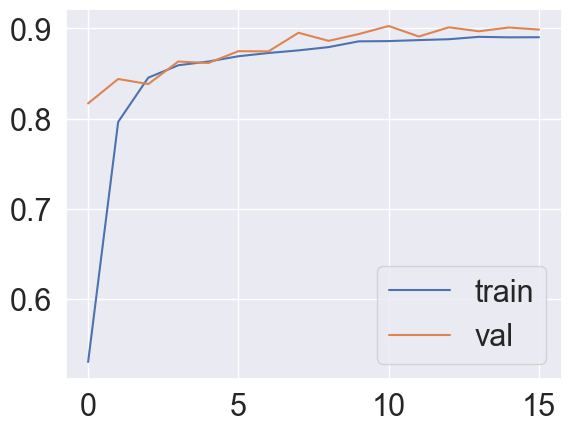

In [ ]:
#@title ● evaluate the model
_, train_acc = model.evaluate(X_train_reshape, y_train, verbose=0)
_, val_acc = model.evaluate(X_val_reshape, y_val, verbose=0)
print('Train: %.4f, Val: %.4f' % (train_acc, val_acc))
# plot training history
plt.plot(history_callback.history['acc'], label='train')
plt.plot(history_callback.history['val_acc'], label='val')
plt.legend()
plt.show()

In [ ]:
#@title ● Evaluate model scores - Early Stopping

acc_train_es = (model.evaluate(X_train_reshape, y_train)[1]*100)
acc_val_es = (model.evaluate(X_val_reshape, y_val)[1]*100)

print("With Early Stopping")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_es))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_es))


With Early Stopping

CNN: Accuracy on training Data: 89.96%
CNN: Accuracy on validation Data: 89.88%


In [ ]:
#@title ● print results 
history_callback.history

{'loss': [0.9714849249521891,
  0.7929263636800978,
  0.6639916065004137,
  0.6300430591901144,
  0.6114660951826307,
  0.5868059195412529,
  0.5669976602660285,
  0.5533839289347331,
  0.5422877973980373,
  0.524123379919264,
  0.5139407179090711,
  0.5039934934510125,
  0.4930230204264323,
  0.4884517248471578,
  0.48180429246690537,
  0.478223356405894],
 'acc': [0.5301389098167419,
  0.7963888645172119,
  0.8454166650772095,
  0.85916668176651,
  0.8633333444595337,
  0.8691666722297668,
  0.8727777600288391,
  0.8756944537162781,
  0.8793055415153503,
  0.8856944441795349,
  0.8859722018241882,
  0.8870833516120911,
  0.8880555629730225,
  0.8906944394111633,
  0.8901388645172119,
  0.8902778029441833],
 'val_loss': [0.9716188359260559,
  0.7822664523124695,
  0.7175386412938436,
  0.6314982501665751,
  0.6108695824941,
  0.5663392996788025,
  0.5442344144980112,
  0.5147350470225016,
  0.507605717976888,
  0.4947764778137207,
  0.47509307543436685,
  0.4745531924565633,
  0.45618

In [ ]:
history_callback.history??

In [ ]:
#@title ● storing
#the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.

storeResults('CNN (with early stopping)', acc_train_es, acc_val_es)


In [ ]:
#@title ● Load and evaluate saved model on validation data.

from tensorflow.keras.models import load_model


model = load_model(filepath)
scores = proposed.evaluate(X_val_reshape, y_val, verbose=2)
print(f'Score: {proposed.metrics_names[0]} of {scores[0]}; {proposed.metrics_names[1]} of {scores[1]*100}%')

Score: loss of 0.2819797459741433; acc of 92.00000166893005%


In [ ]:
#@title ● creating dataframe
results = pd.DataFrame({'CNN Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Val Accuracy': acc_val})
results

CNN Model Train Accuracy Val Accuracy
0              Decision Tree         89.54%       89.17%
1              Random Forest         90.31%       90.21%
2            CNN (80 epochs)         92.08%       92.00%
3  CNN (with early stopping)         89.96%       89.88%

In [ ]:

#@title ● Learning Curve - Plot - Early Stopping

history_callback.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

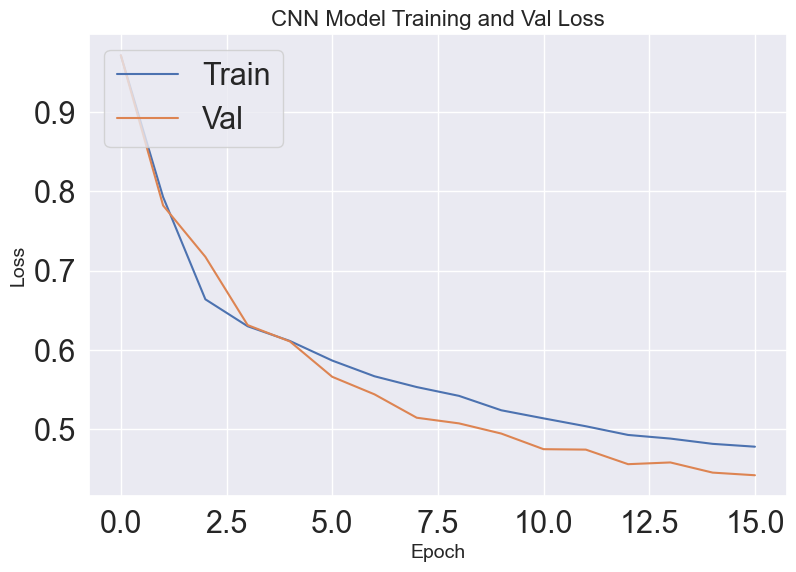

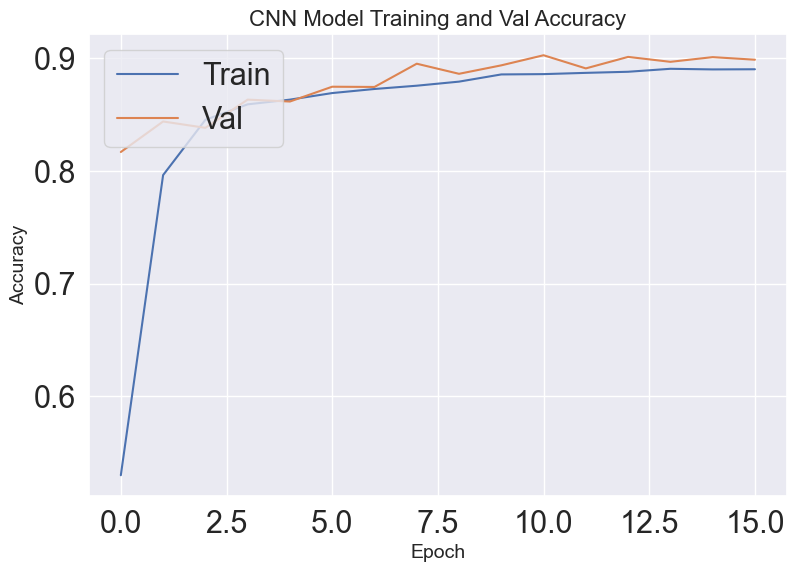

In [ ]:
#@title ● Plot training & Val loss/accuracy values
## Computing Loss Result on Training And Val Results
plt.figure(figsize=(9,6))
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('CNN Model Training and Val Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
#plt.savefig('/Datasets/Dataset3/Graph-Visuals/ES-train-loss.png')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history_callback.history['acc'])
plt.plot(history_callback.history['val_acc'])
plt.title('CNN Model Training and Val Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
#plt.savefig('/Datasets/Dataset3/Graph-Visuals/ES-acc-loss.png')
plt.show()


##### End of Validation Evaluation - Completed
